# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec


from IPython.display import Image
from IPython.core.display import HTML

import random

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [30, 15]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

#funcao diferenca das medias apos permutação
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
#Retirar notação cientifica
#pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [3]:
jupyter_settings()

In [4]:
#altera textos dos eixos nomes
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes',  labelsize=20) 

# 1.0 Seaborn - Histogramas - Documentation

Documentation seaborn.histplot() 
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [5]:
#versão do Seaborn instalada
sns.__version__

'0.11.2'

# 1.1 Fundamentos da Matemática Gabriel

## Lançamento de moedas

In [6]:
# result of flipping a coin 10 times, tested 1000 times.
# n --> numero de tentativas/vezes que vai fazer o experimento
# p --> probabilidade do evento binomial acontecer para cada tentativa
# s --> Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
n = 10
p = 0.5
s = np.random.binomial(n, p, 1000)

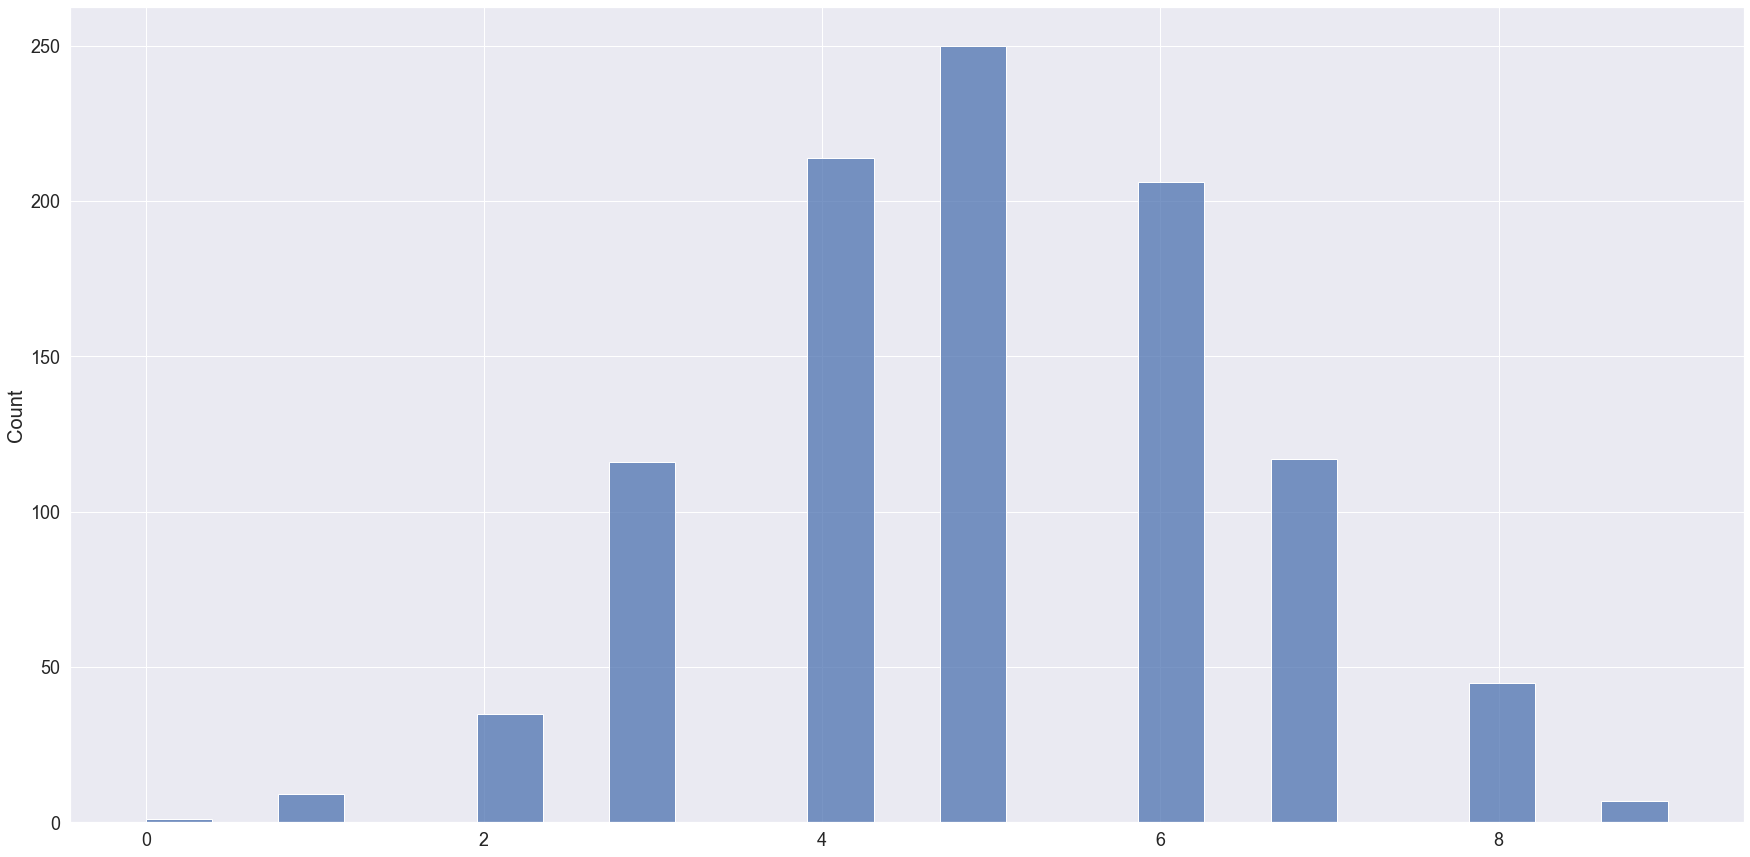

In [7]:
sns.histplot(s);

In [8]:
s.mean()

5.011

In [9]:
s.std()

1.5339097105110195

## Exemplo Montadora de veículos x Número de rodas - Dados Discretos

### Tabela e descrição

In [10]:
#veiculos observados e numero de rodas
lista = [2,2,4,4,4,4,3,2,8,4,4,4,2,2,4,8]
tabela = pd.DataFrame(lista)
tabela.columns = ['rodas']
tabela

,rodas
0,2
1,2
2,4
3,4
4,4
5,4
6,3
7,2
8,8
9,4


In [11]:
#numero de categorias
tabela['rodas'].unique()

array([2, 4, 3, 8])

In [12]:
#contagens de eventos por categoria
tabela['rodas'].value_counts()

4    8
2    5
8    2
3    1
Name: rodas, dtype: int64

In [13]:
#frequencia das observações
tabela['rodas'].value_counts(normalize=True)

4    0.5000
2    0.3125
8    0.1250
3    0.0625
Name: rodas, dtype: float64

### Histograma padrão (sem configurar parâmetros seaborn)

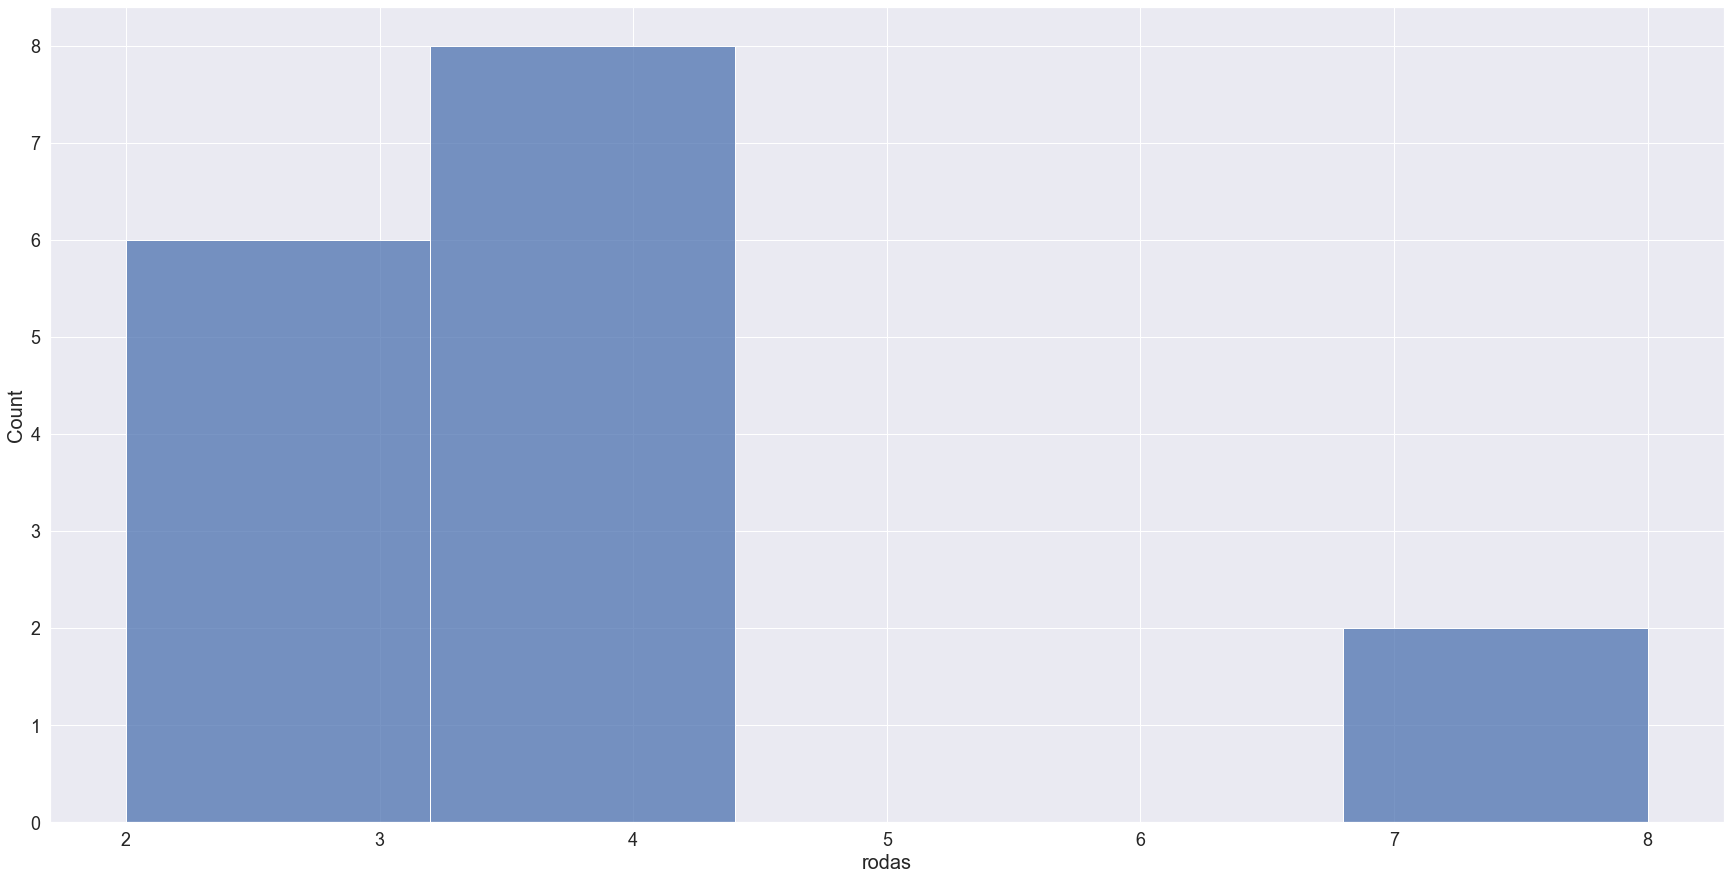

In [14]:
#histograma padrão sem configurar parametros
sns.histplot(x = 'rodas',data = tabela);

### Histrograma largura do bin = 1 

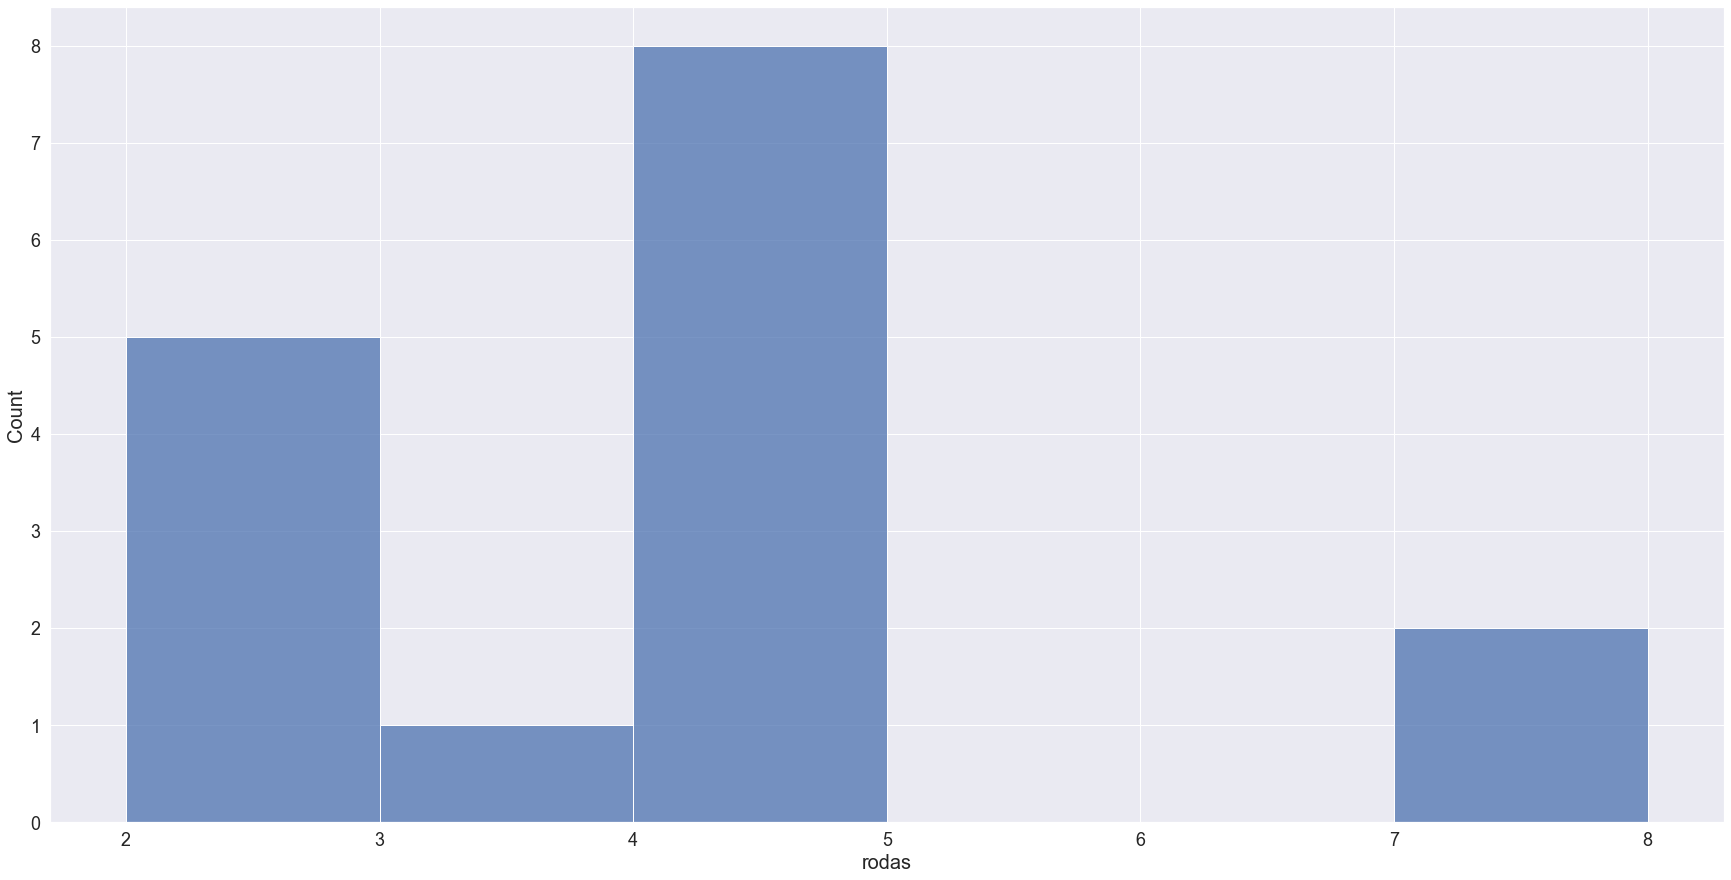

In [15]:
#largura do bin --> binwidth = 1
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1);

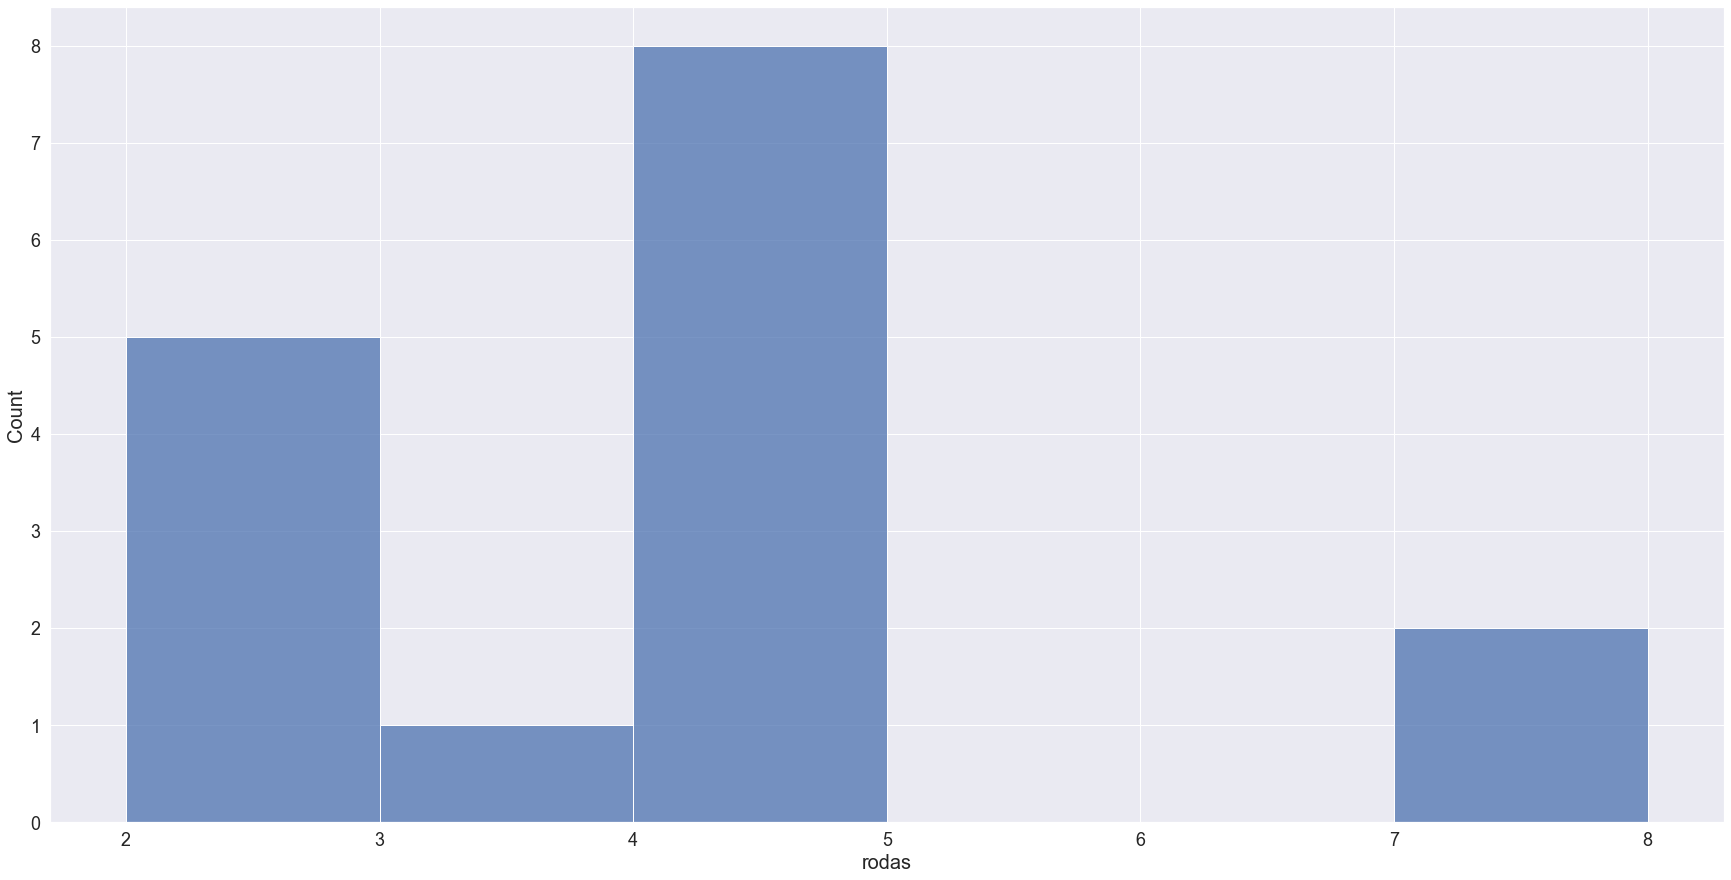

In [16]:
#largura do bin --> binwidth = 1
#count no eixo y --> mostre o número de observações em cada bin  
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1, stat = 'count');

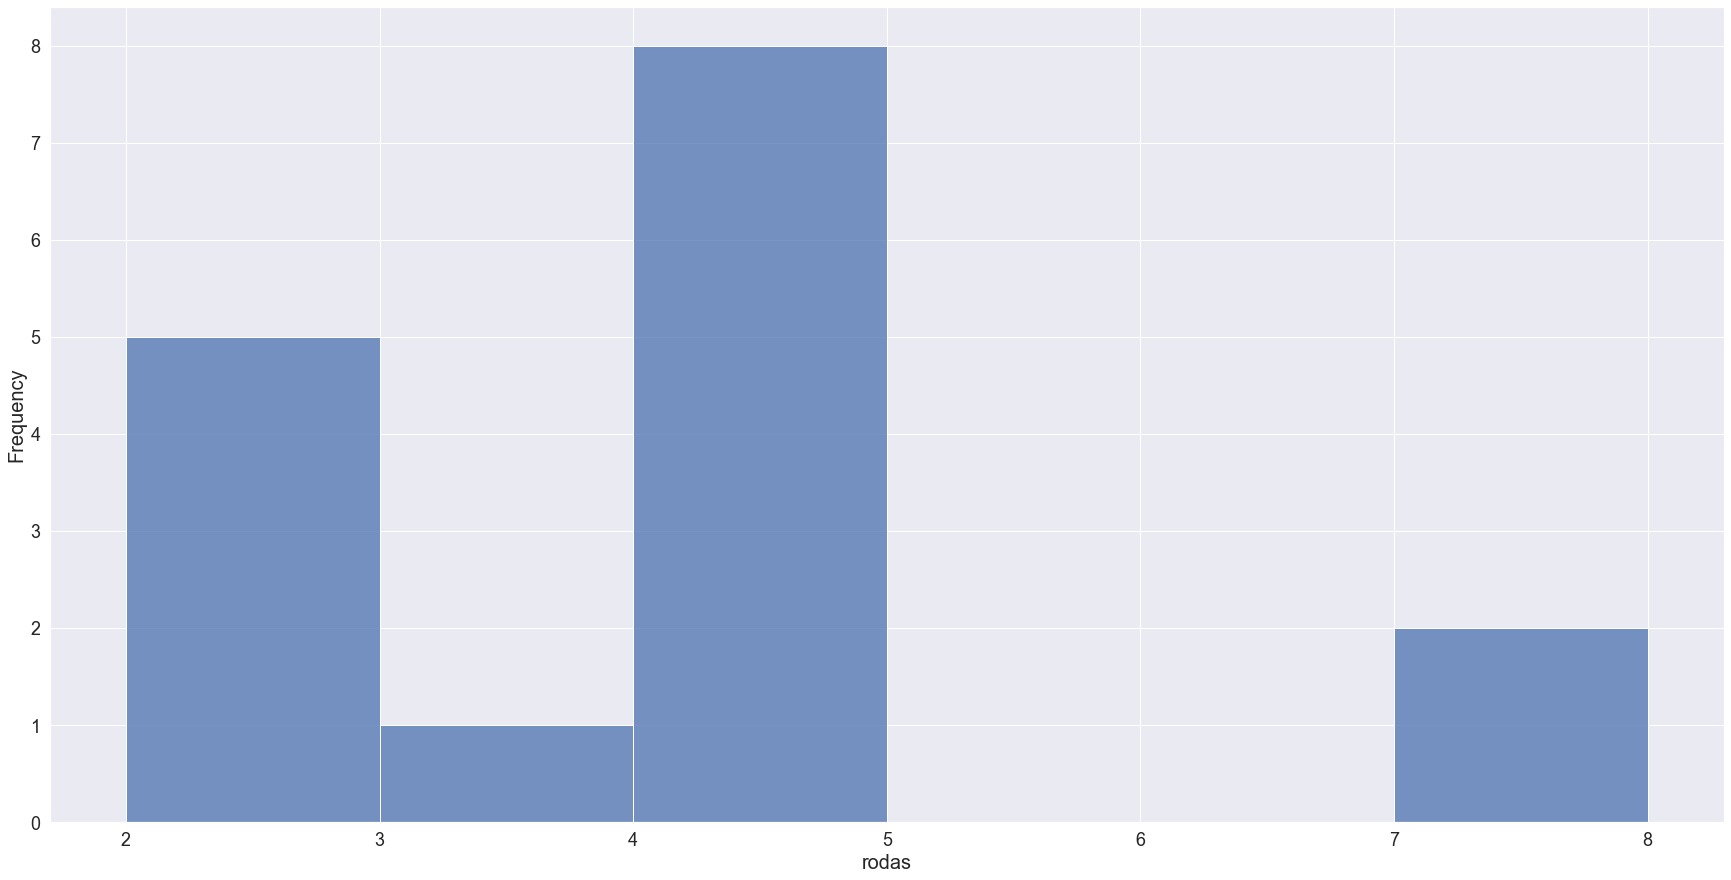

In [17]:
#largura do bin --> binwidth = 1
#frequency no eixo y --> mostrar o número de observações dividido pela largura do bin  
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1, stat = 'frequency');

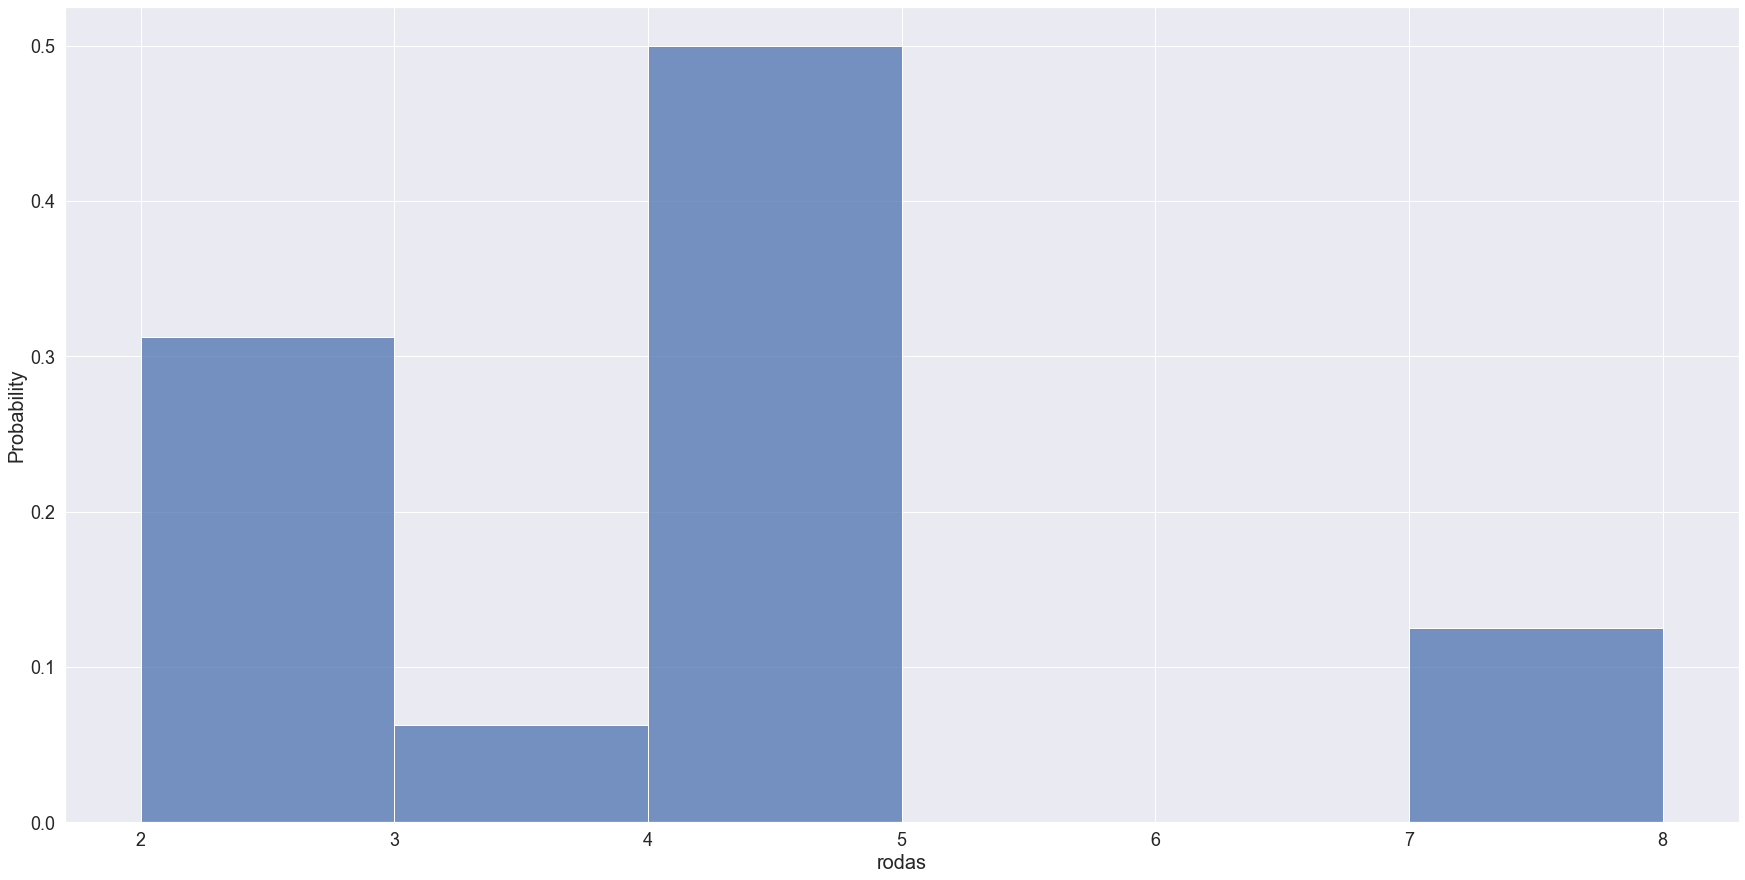

In [18]:
#largura do bin --> binwidth = 1
#probability no eixo y --> normalizar de tal forma que as alturas das barras somam 1 
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1, stat = 'probability');

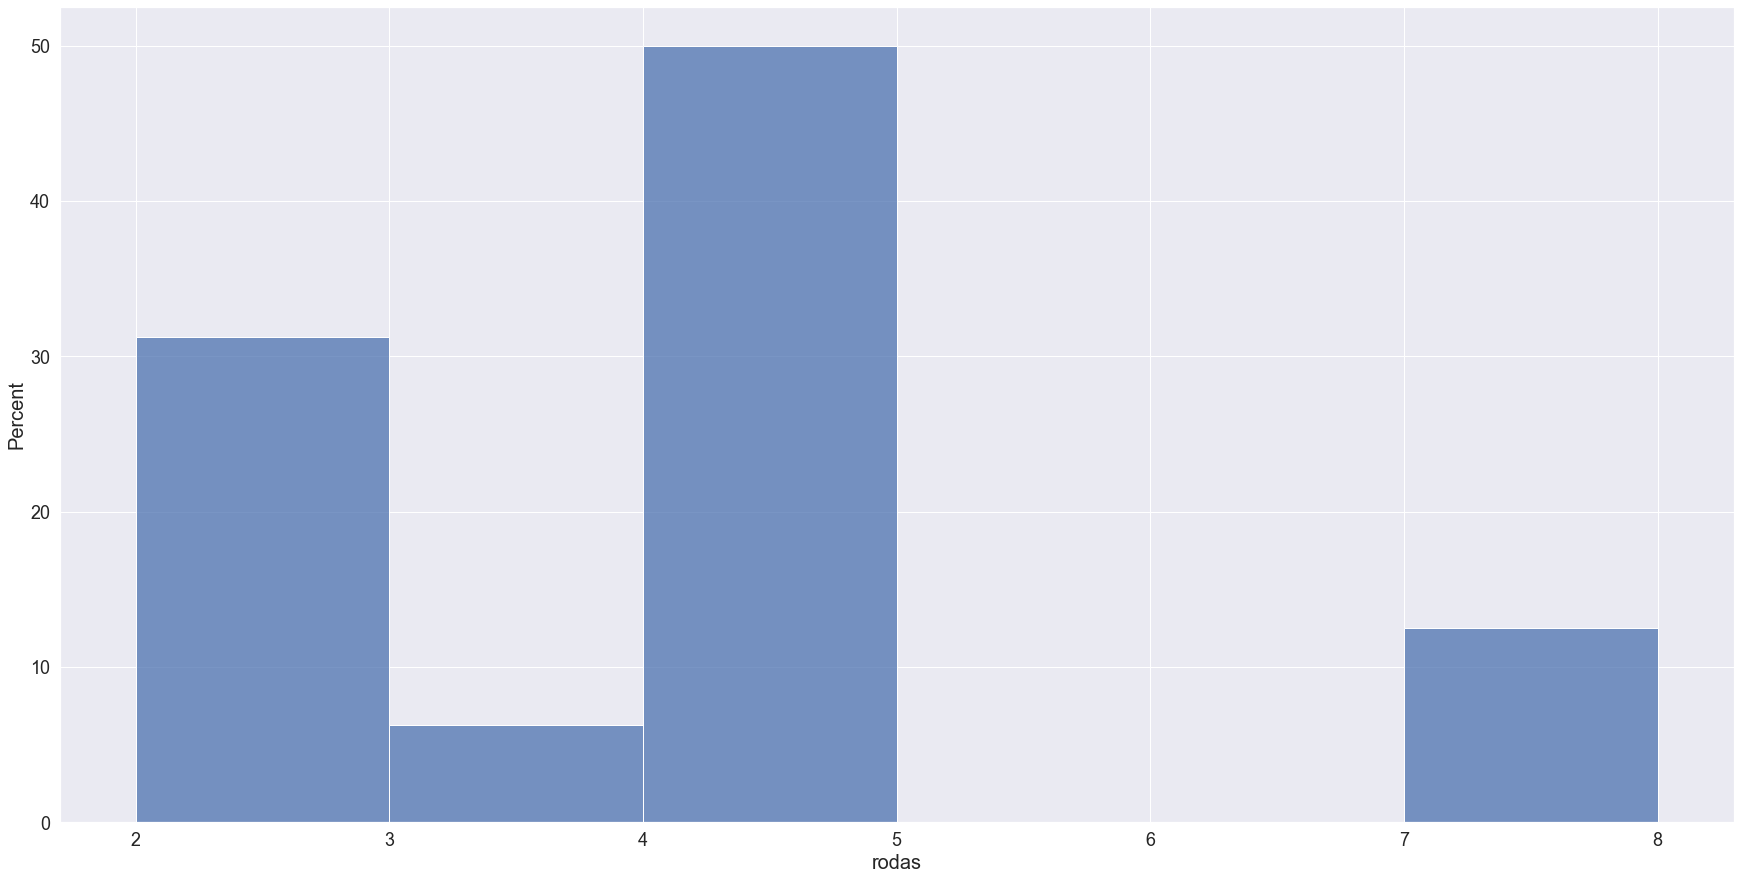

In [19]:
#largura do bin --> binwidth = 1
#percent no eixo y --> normalize de tal forma que as alturas das barras somam 100 
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1, stat = 'percent');

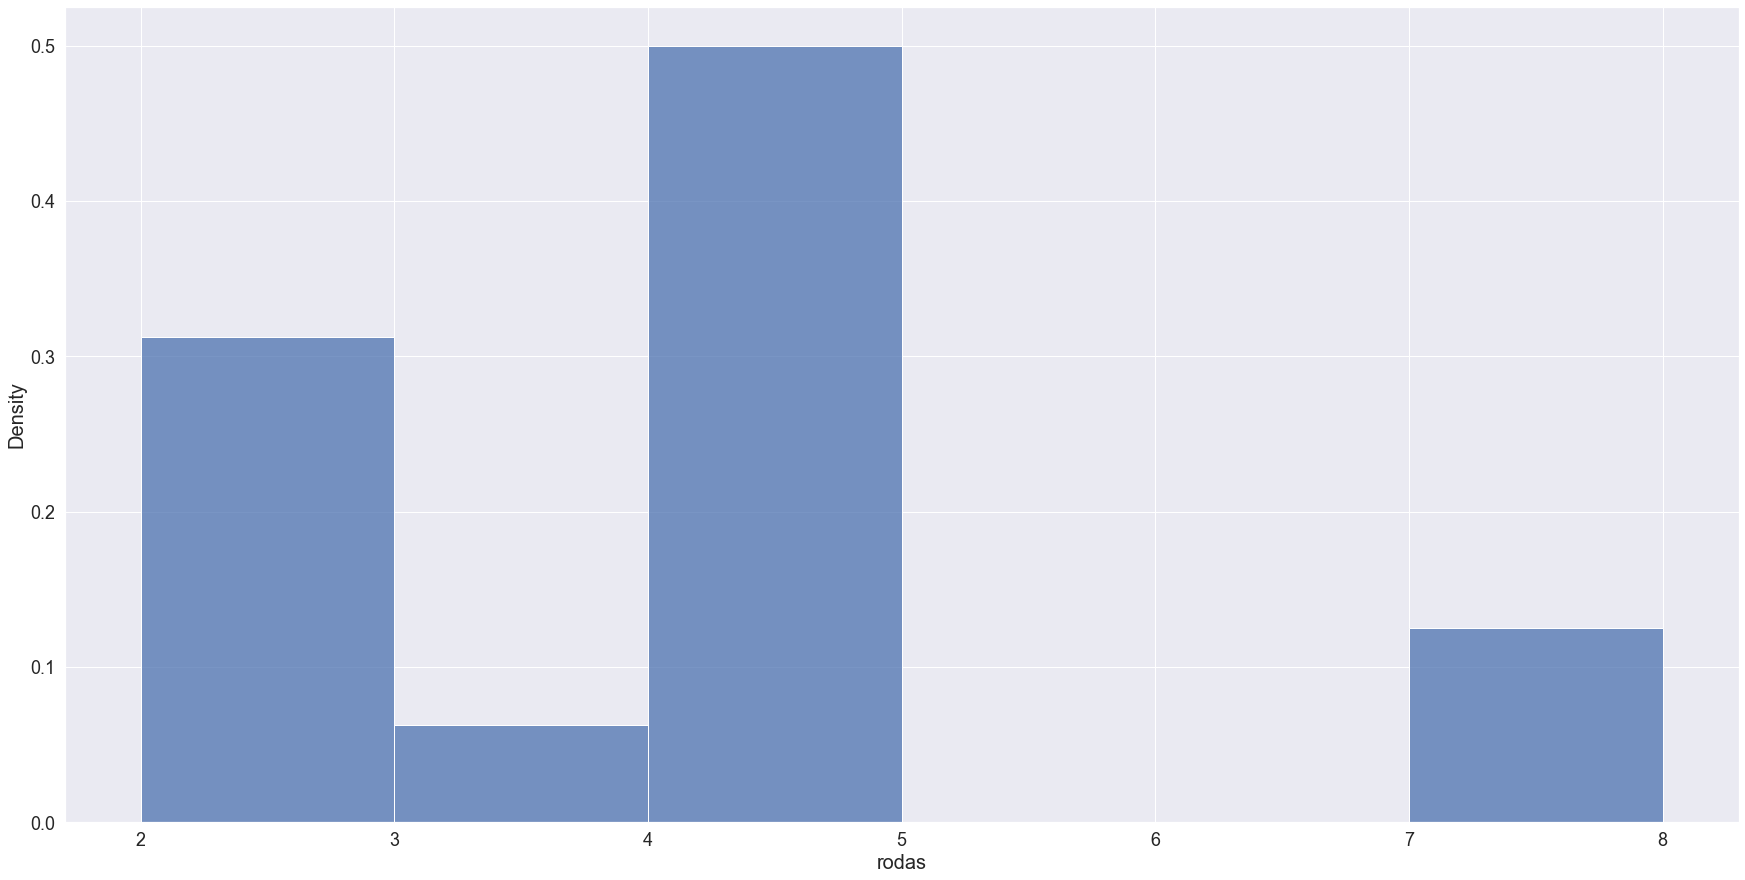

In [20]:
#largura do bin --> binwidth = 1
#Density no eixo y --> normalize de tal forma que a área total do histograma seja igual a 1  
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 1, stat = 'density');

### Histograma largura do bin = 2

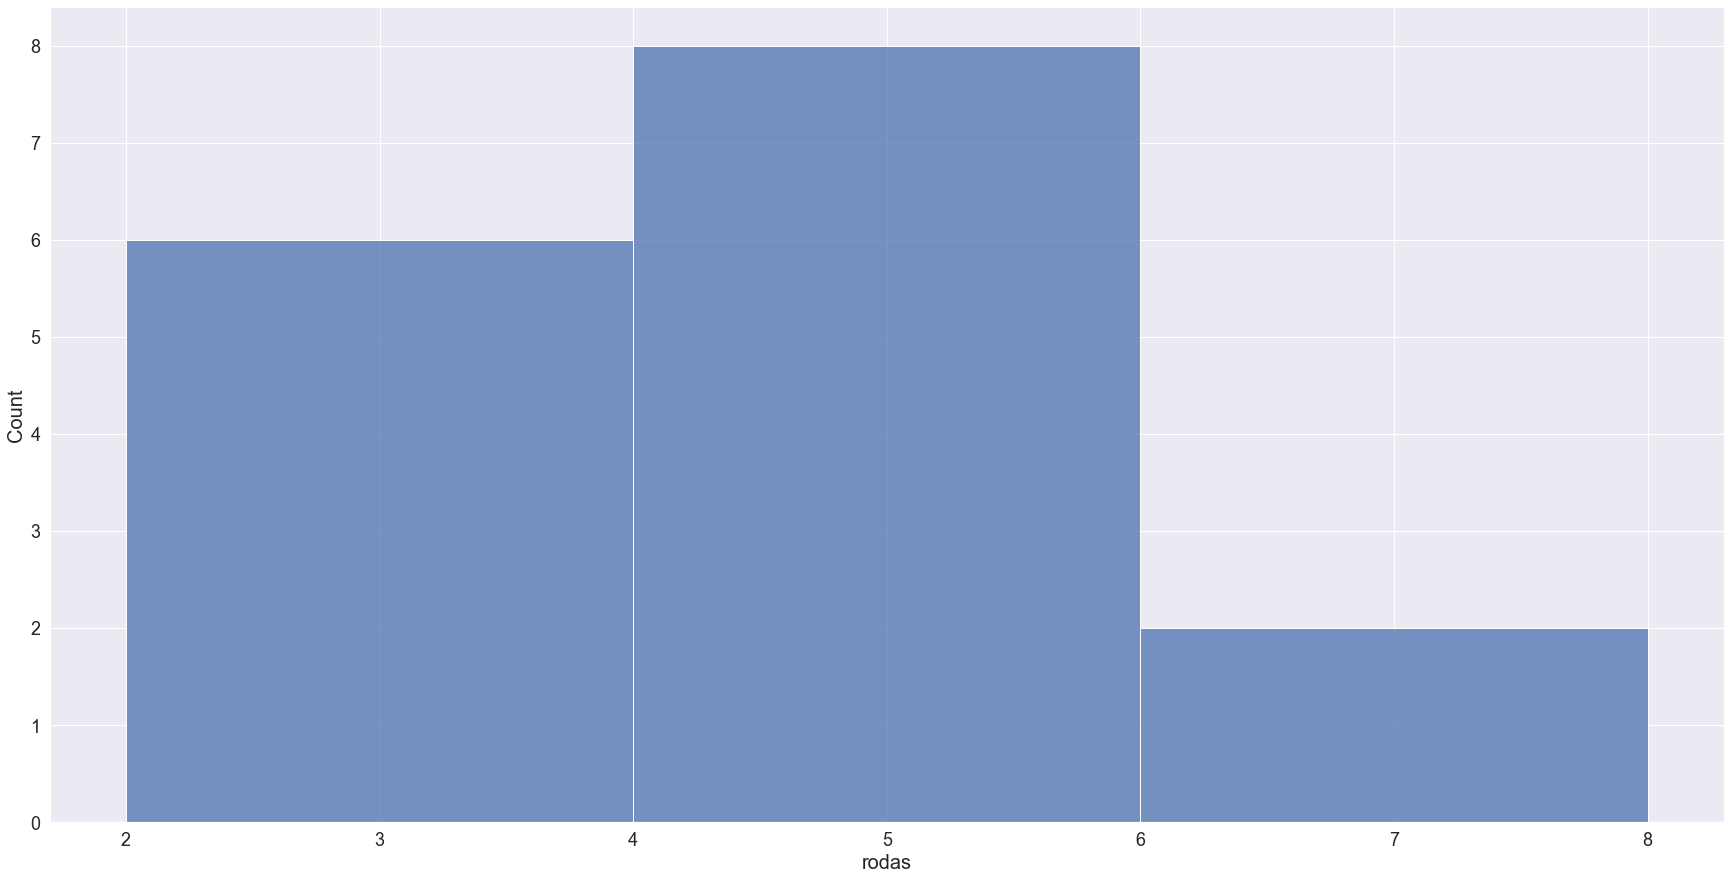

In [21]:
#largura do bin = 2
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 2);

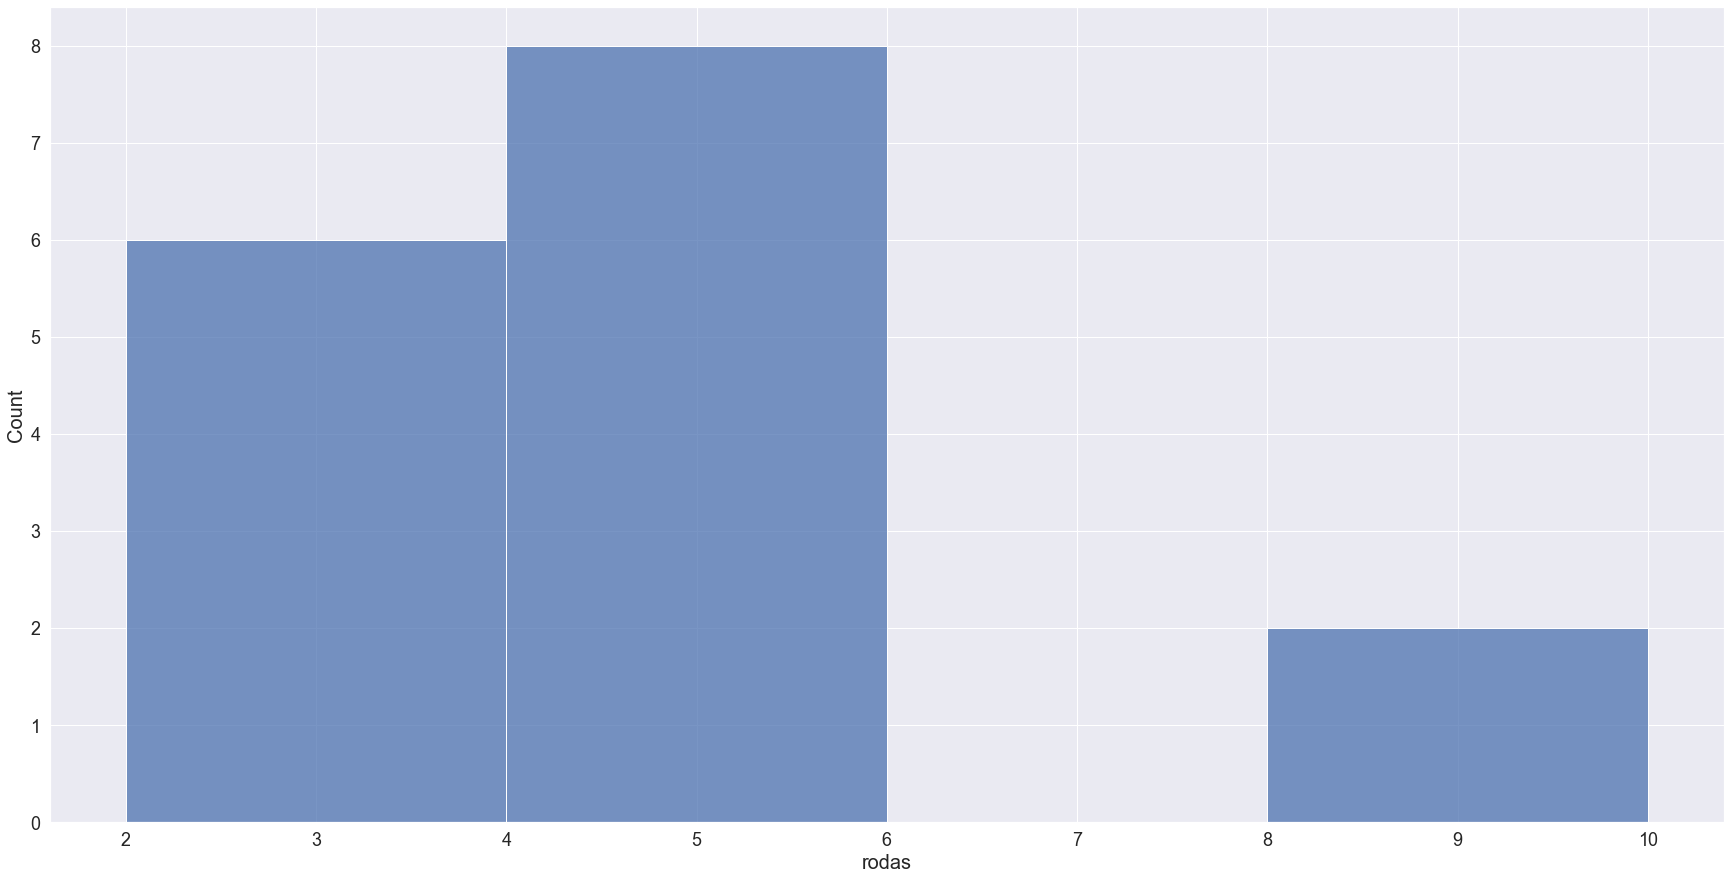

In [22]:
#lagura do bin --> binwidth = 2 
#Intervalo de inicio ao fim do range --> binrange = (2,10)
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 2, binrange = (2,10));

### Histograma largura do bin = 10

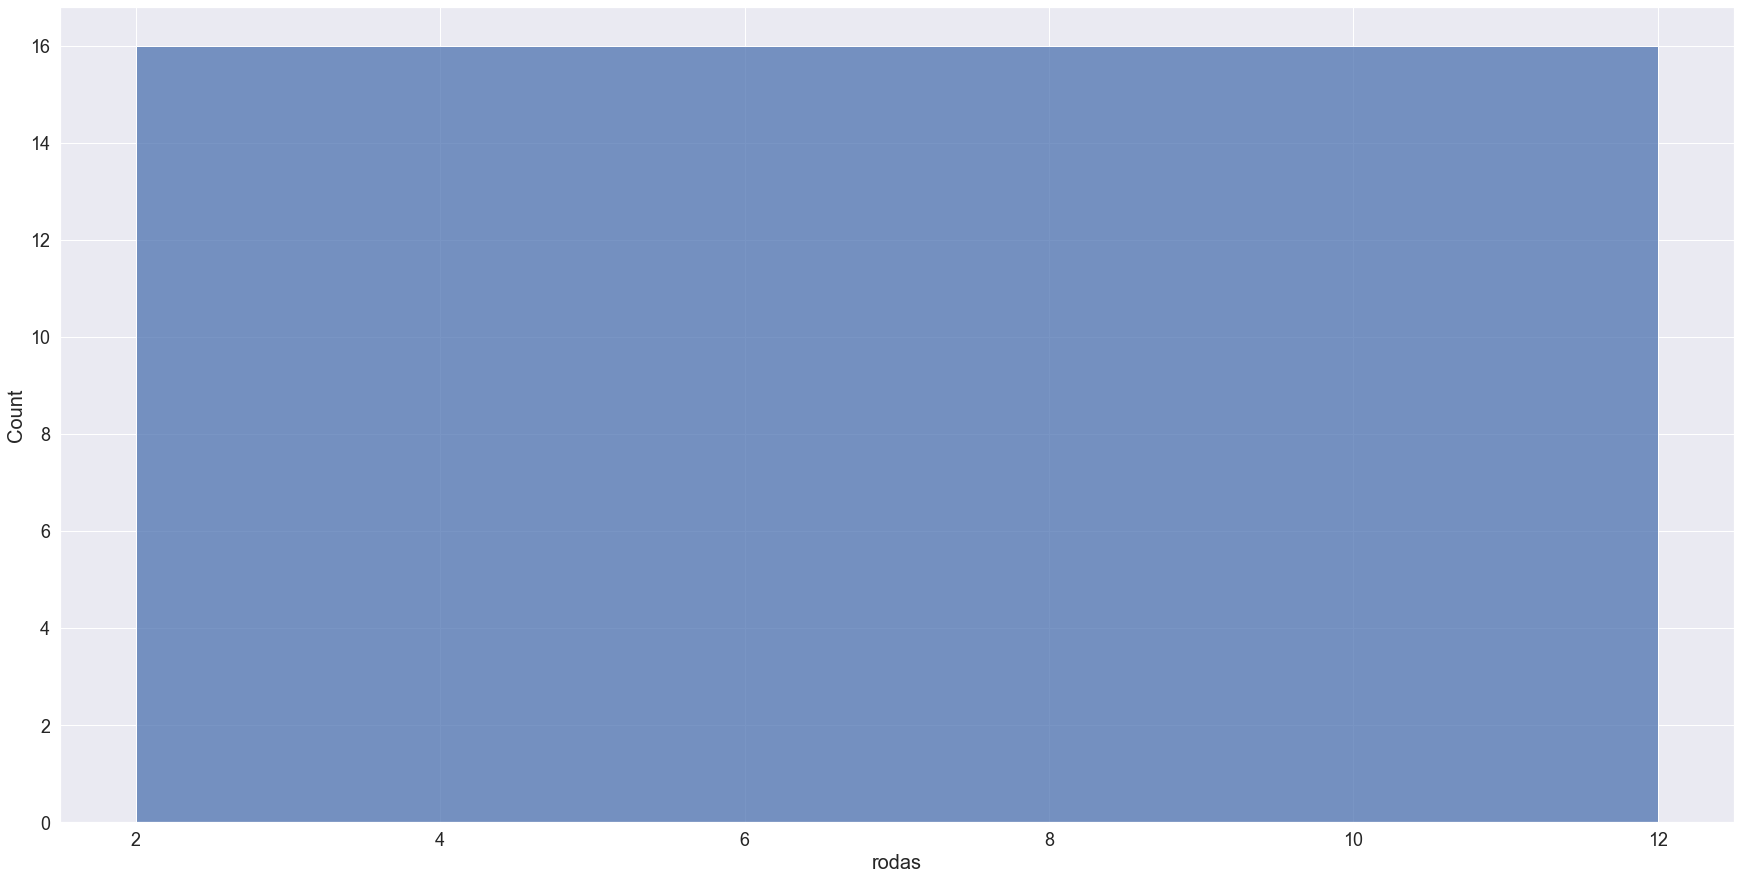

In [23]:
#largura do bin --> binwidth = 10
sns.histplot(x = 'rodas',data = tabela, bins = 'auto', binwidth = 10, binrange = (2,10) );

## Exemplo Temperatura - Dados Contínuos 

#### Tabela e descrição

In [24]:
info = {'observacao':[1,2,3,4,5,6], 'temperatura': [36.2, 36.8, 36.7, 39.0, 40.00, 36.8] }
tab_temperatura = pd.DataFrame(info)
tab_temperatura

,observacao,temperatura
0,1,36.2
1,2,36.8
2,3,36.7
3,4,39.0
4,5,40.0
5,6,36.8


#### Histograma largura do bin = 0.1

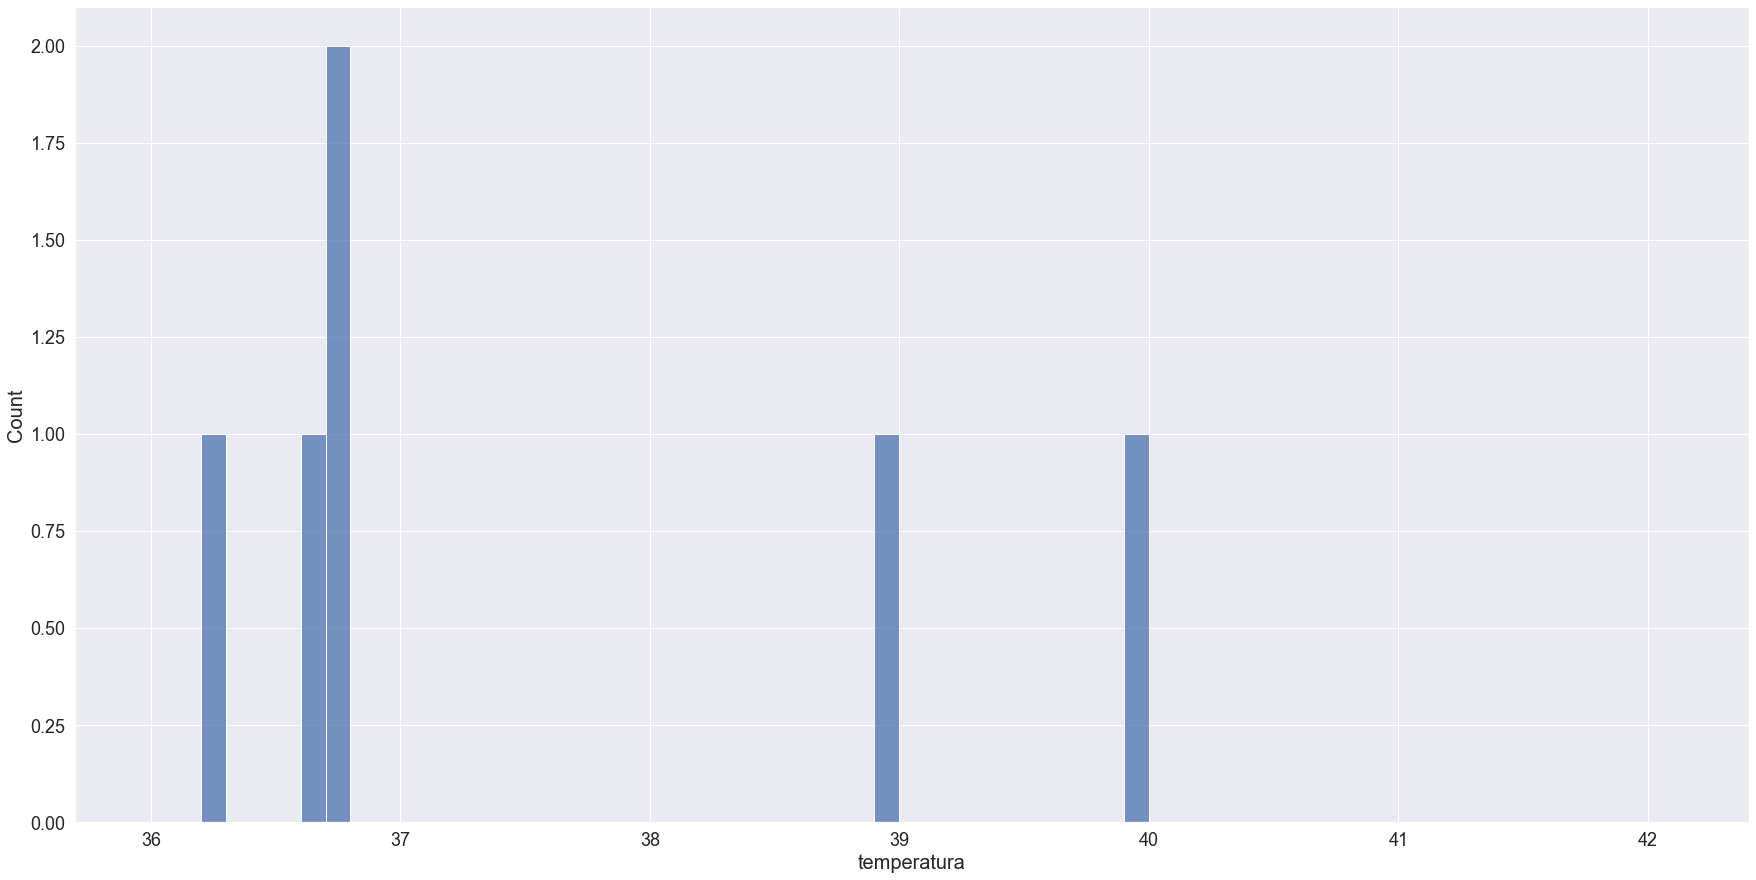

In [25]:
sns.histplot( x = 'temperatura', data = tab_temperatura, binwidth = 0.1, binrange = (36,42));

#### Histrograma largura do bin = 0.5

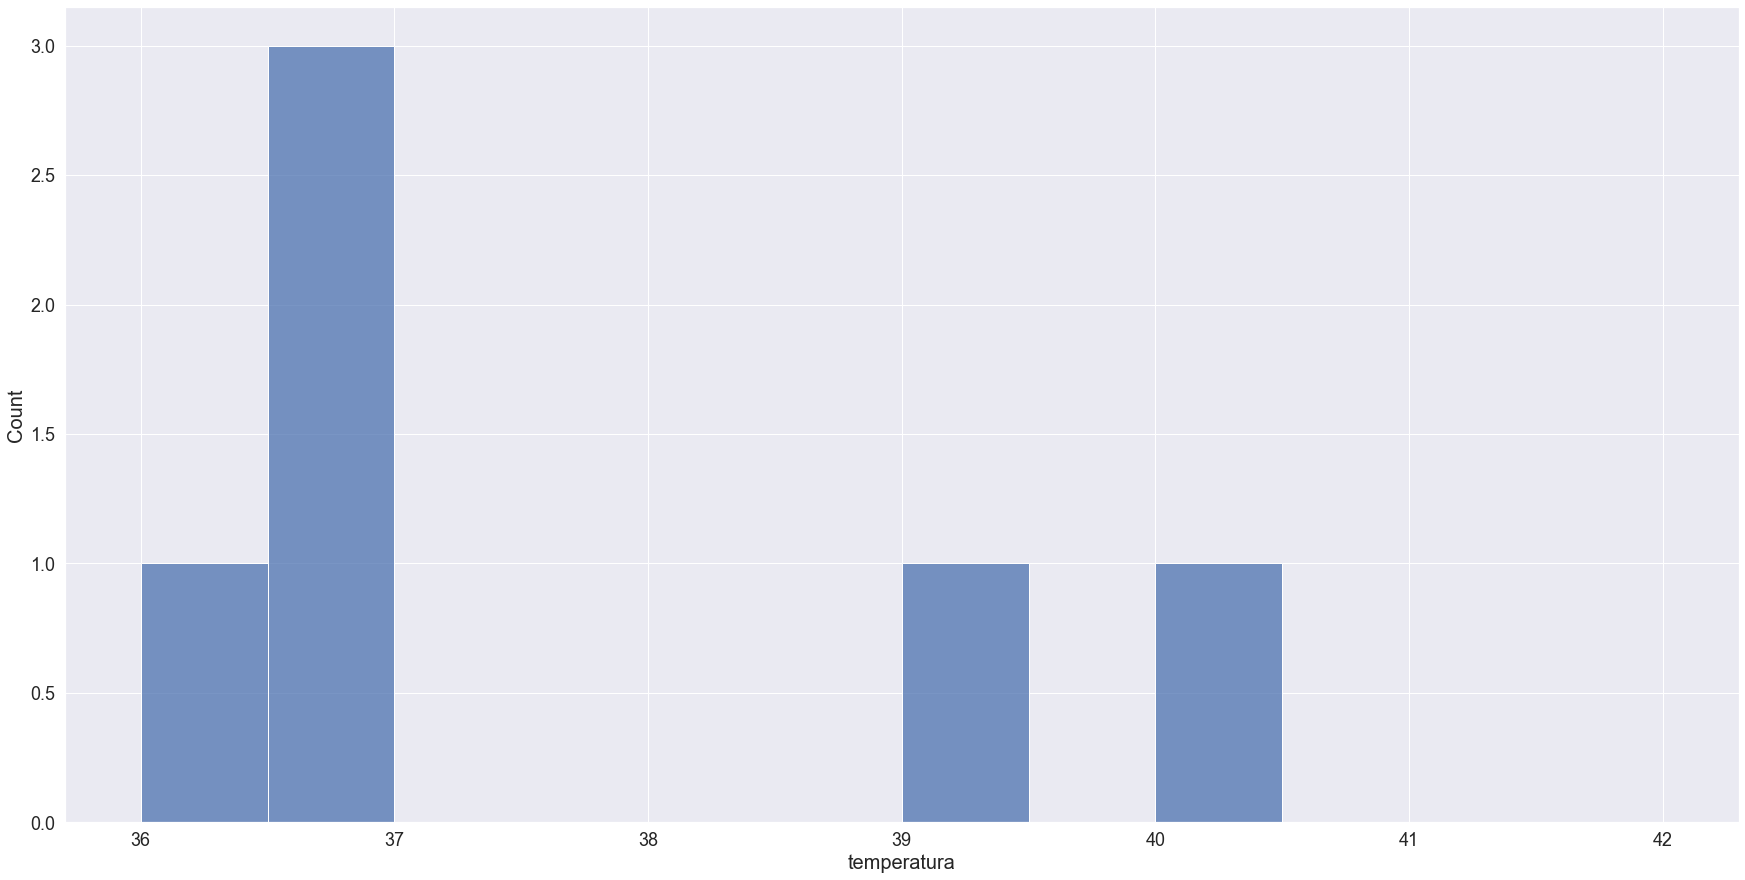

In [26]:
sns.histplot( x = 'temperatura', data = tab_temperatura, binwidth = 0.5, binrange = (36,42));

#### Histrograma largura do bin = 1

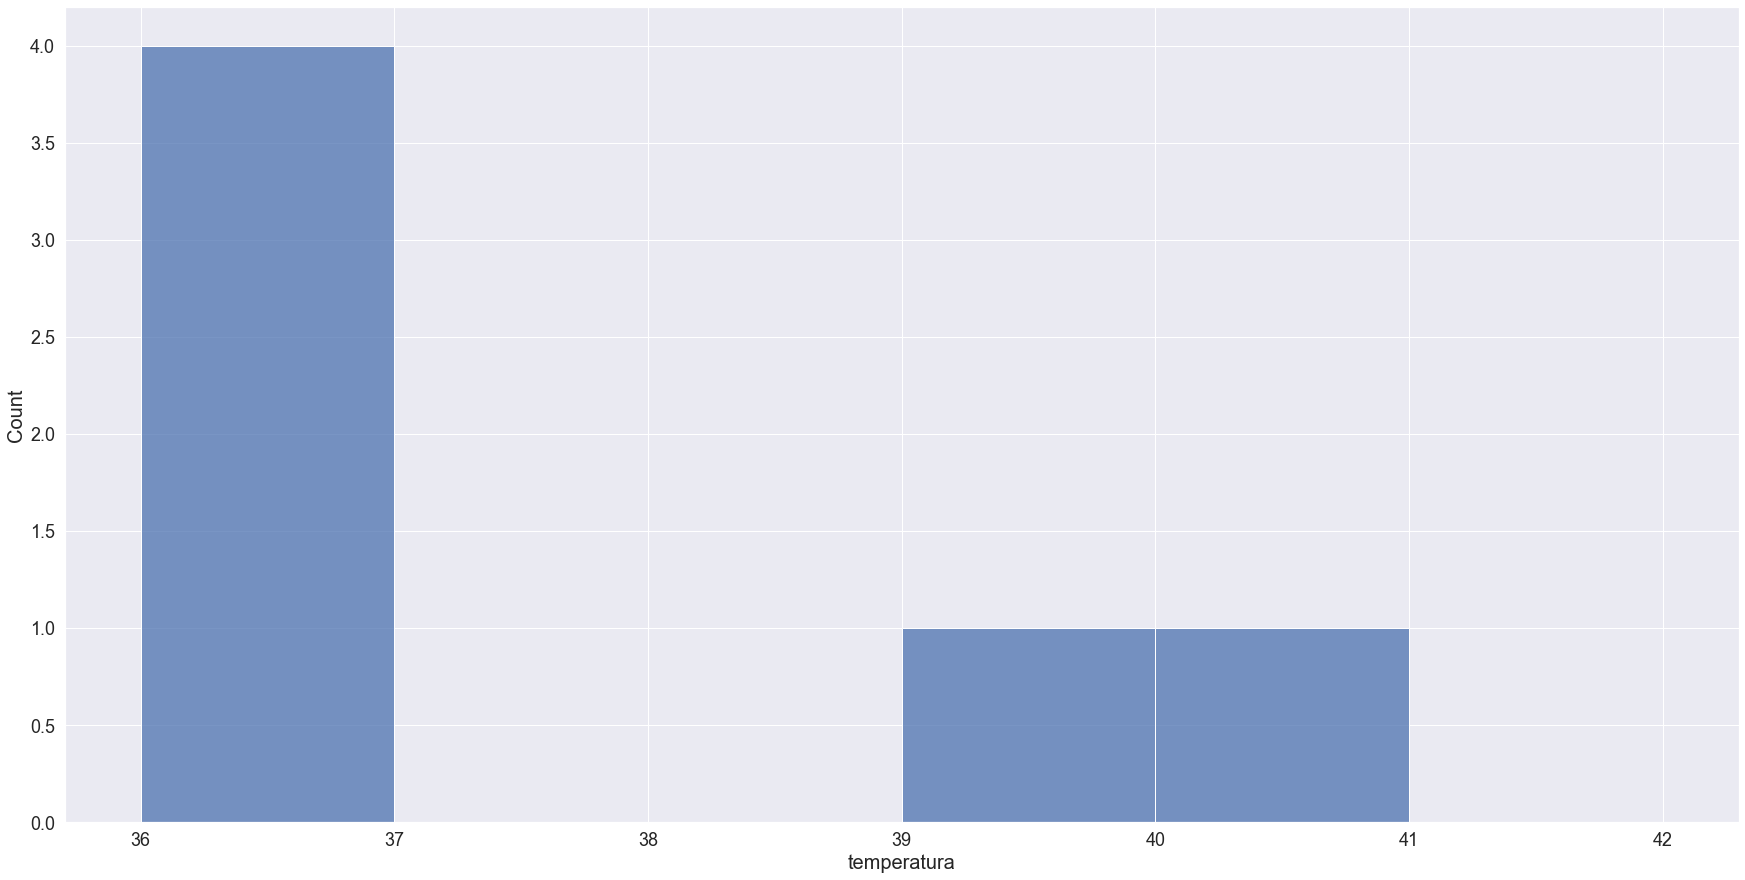

In [27]:
sns.histplot( x = 'temperatura', data = tab_temperatura, binwidth = 1, binrange = (36,42));

#### Histrograma largura do bin = 5

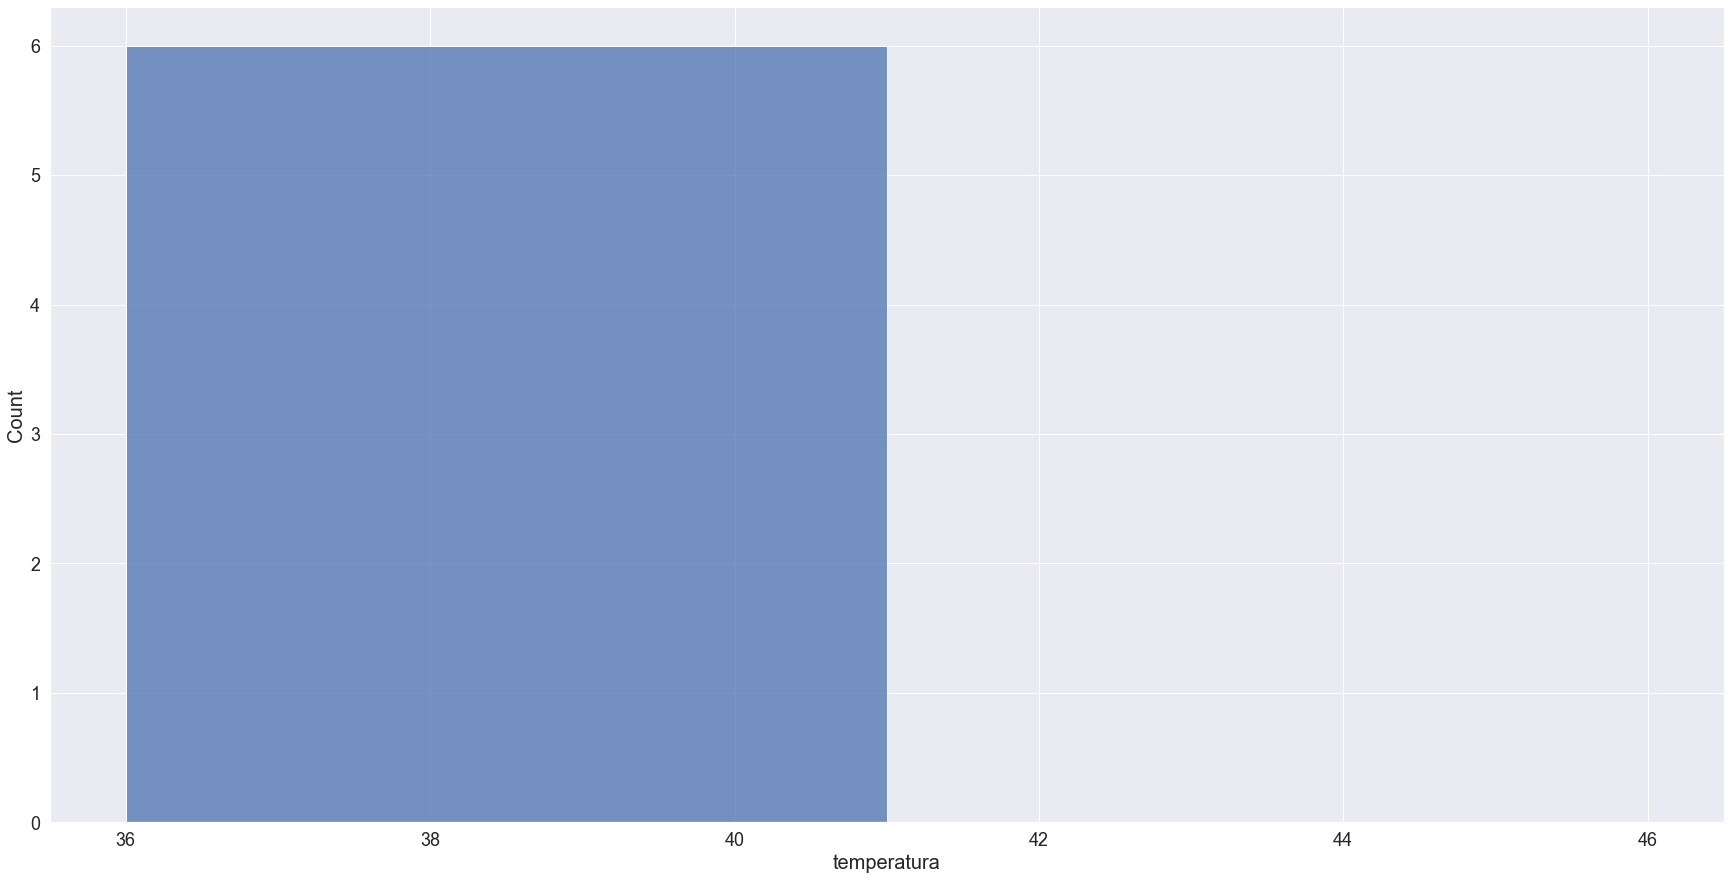

In [28]:
sns.histplot( x = 'temperatura', data = tab_temperatura, binwidth = 5, binrange = (36,42));

# 1.2 Histplot

## Dataset penguins da biblioteca seaborn

In [29]:
import seaborn as sns

In [30]:
sns.__version__

'0.11.2'

Carregando dados da biblioteca seaborn.

Esses dados são sobre pinguins, então temos várias medidas diferentes para diferentes espécies de pinguins.

In [31]:
#carregando dataset da biblioteca seaborn
penguins = sns.load_dataset('penguins')

In [32]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Temos 344 observações, mas vou descartar quaisquer valores nulos.

Que eu tenho 344 e isso me deixará com 333 observações e estou fazendo isso apenas para fins de plotagem.

In [33]:
penguins.shape

(344, 7)

In [34]:
penguins.dropna(inplace=True)

In [35]:
penguins.shape

(333, 7)

## Intro Visuals

`distplot` has now been deprecated.  Switch to `histplot` for histogram plots.

/home/deivison/Documentos/projetos/stats/venv_stats/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


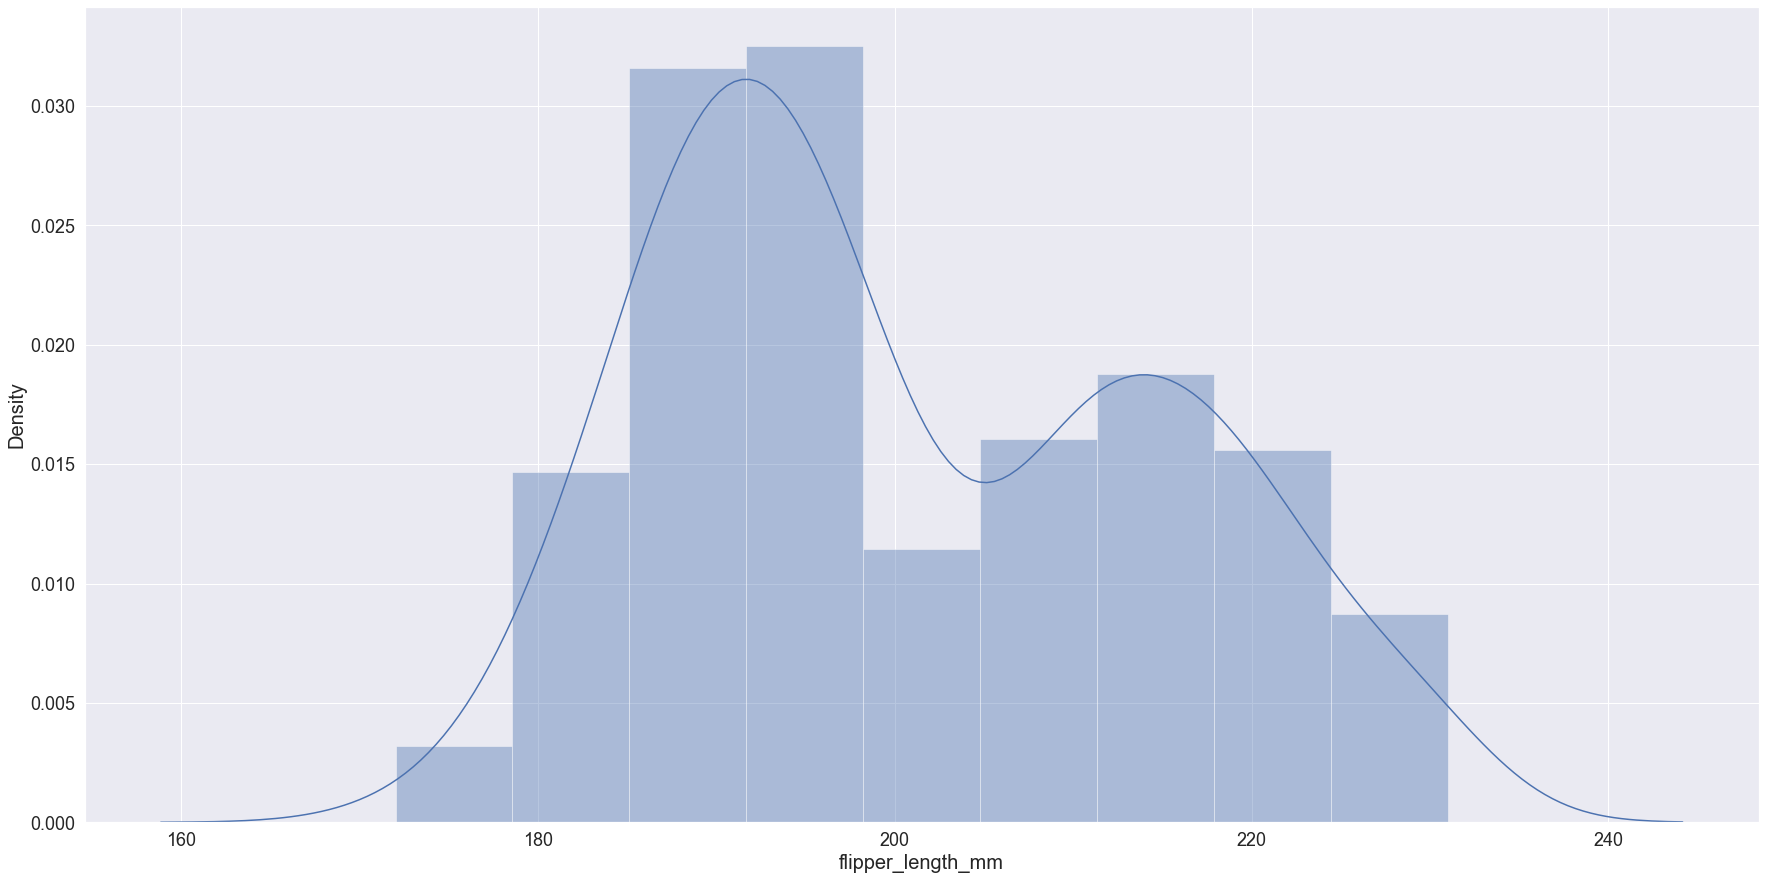

In [36]:
sns.distplot(penguins.flipper_length_mm);

In [37]:
from matplotlib import pyplot as plt

In [38]:
#altera textos dos eixos nomes
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes',  labelsize=20)    

In [39]:
sns.set_style('white') 

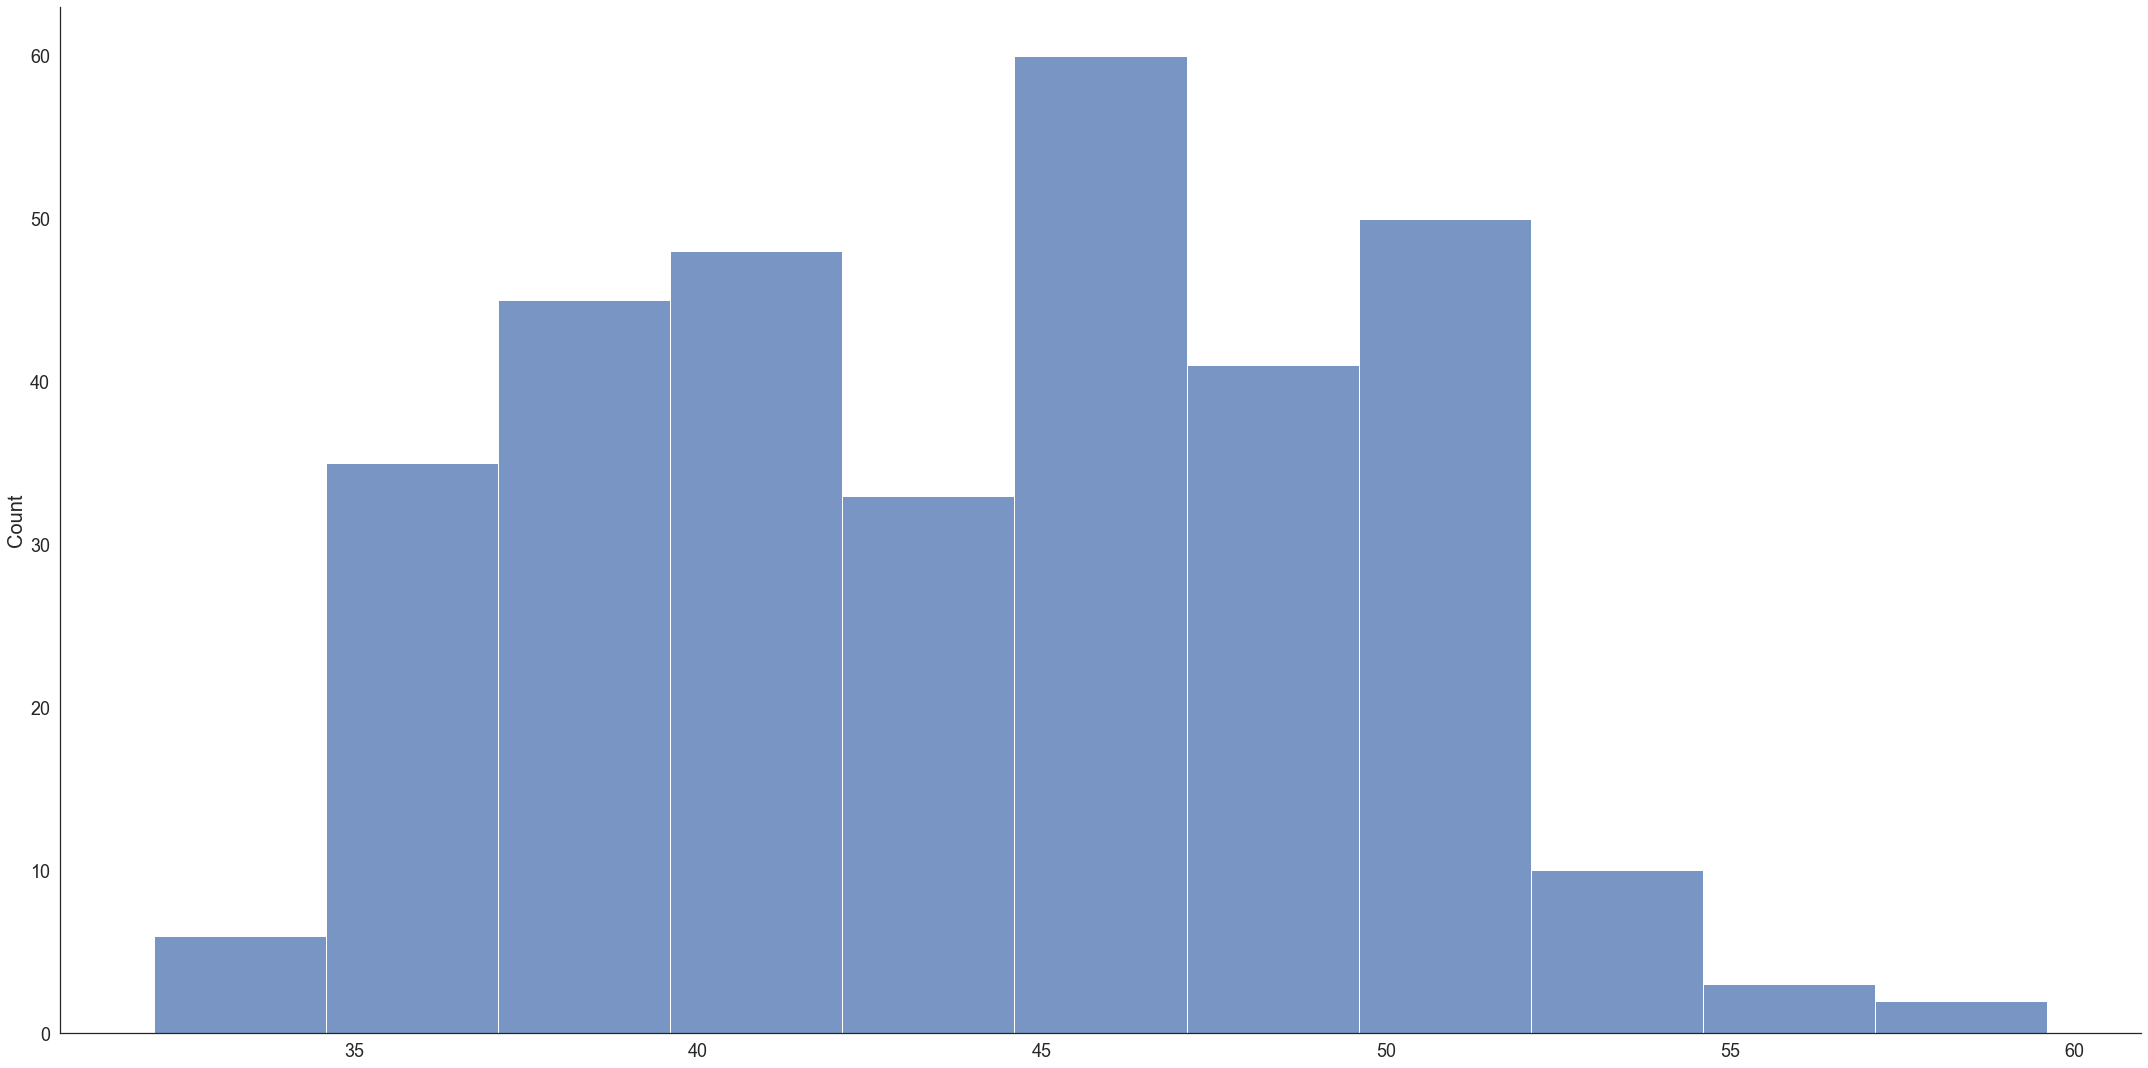

In [40]:
sns.histplot(penguins.bill_length_mm)
sns.despine()
plt.xlabel('')
plt.tight_layout();

In [41]:
#altera textos dos eixos nomes
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)  

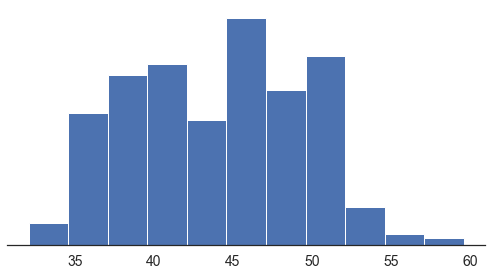

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(penguins.bill_length_mm, alpha=1)
sns.despine(left=True)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [43]:
#altera textos dos eixos nomes
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes',  labelsize=20) 

## Basics

Então vamos em frente e construir o nosso primeiro histplot no seaborn

Acabei de referenciar a biblioteca seaborn e chamar o método histplot.

Agora o que posso fazer é passar em uma série de pandas

Então eu vou passar o comprimento do bico dos pinguins, então esta é apenas uma das colunas do dataset.

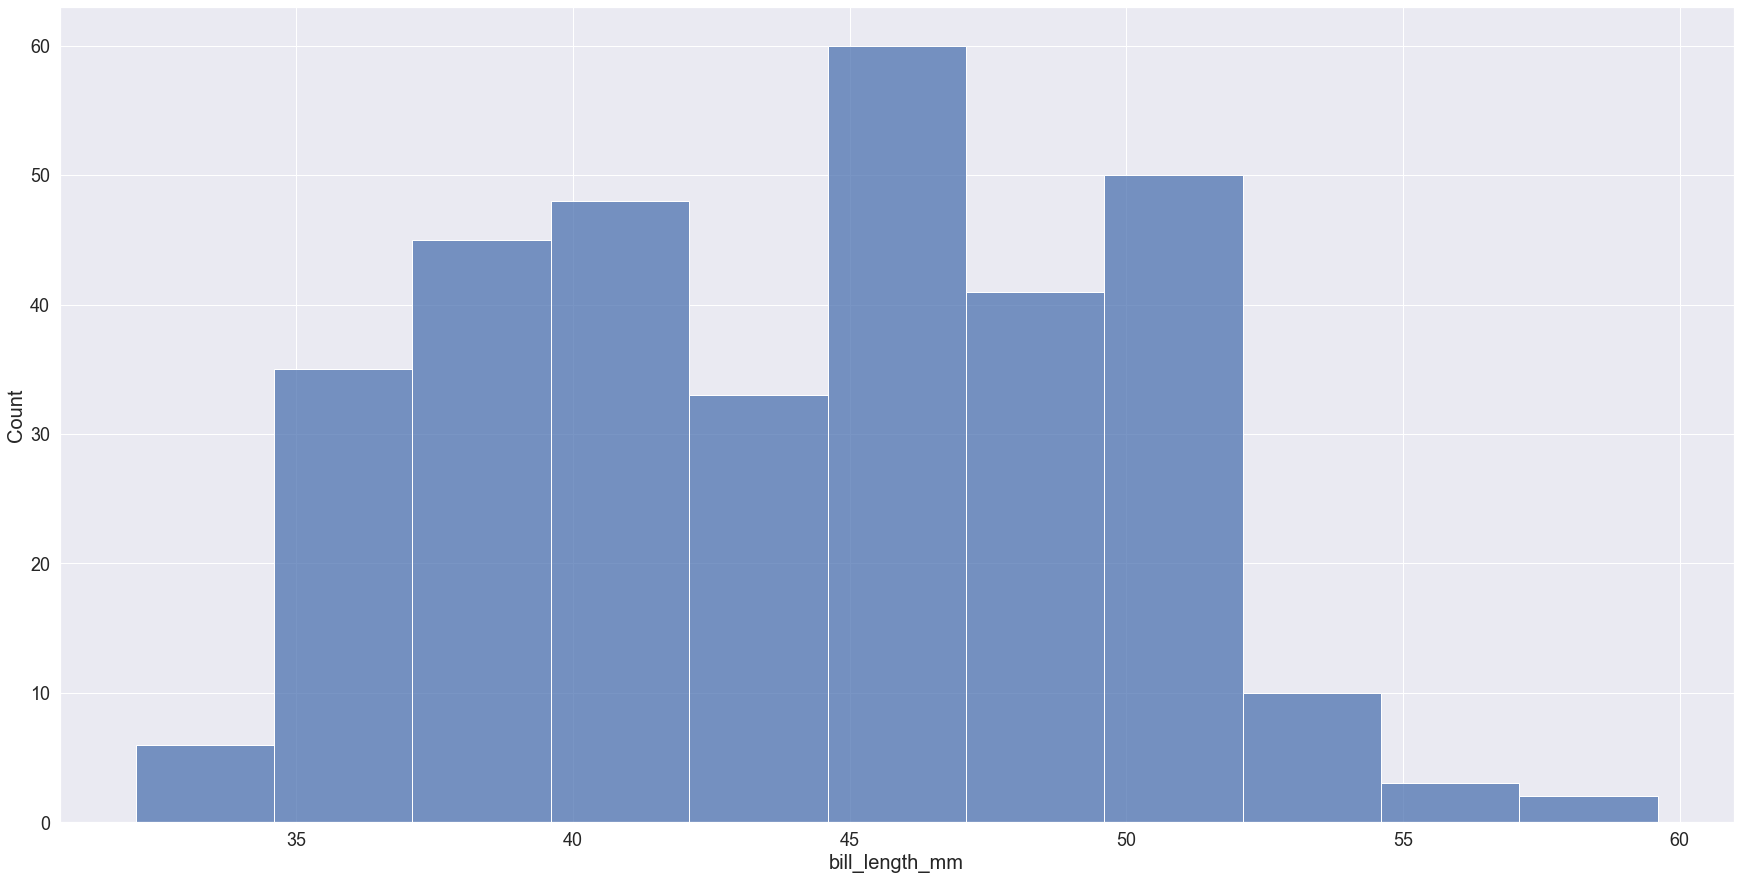

In [44]:
sns.set_style('darkgrid')

sns.histplot(penguins.bill_length_mm);

Outra forma de apresentar um histograma é com as barras variando na horizontal.

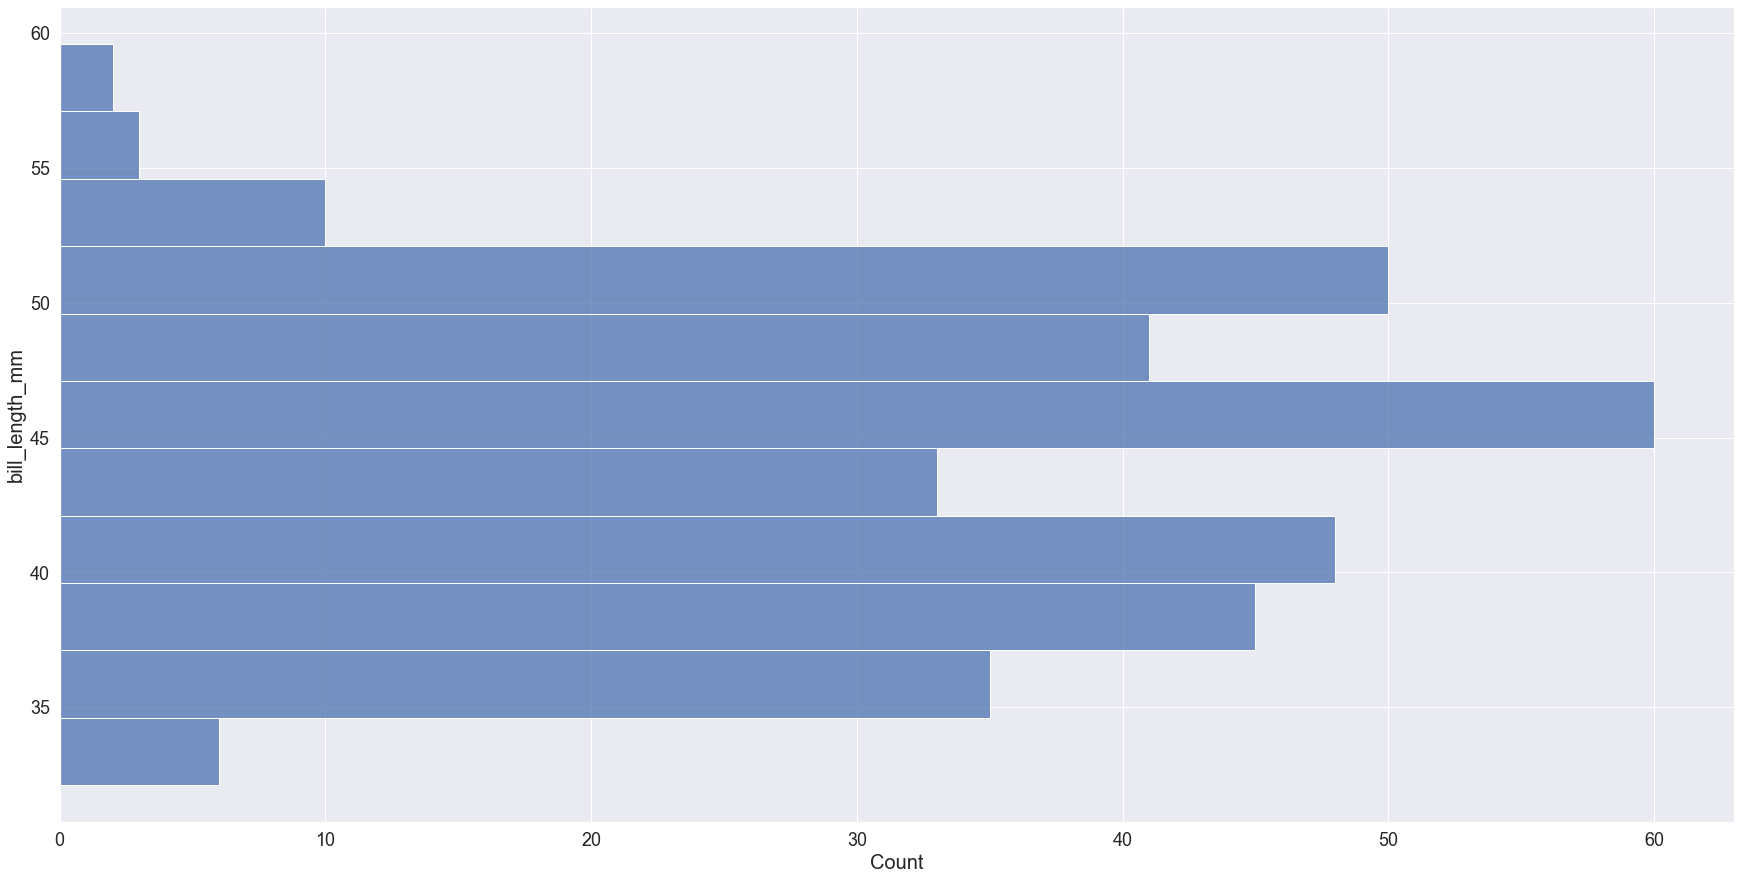

In [45]:
sns.histplot(y = 'bill_length_mm', data=penguins);

### KDE

Se você estiver familiarizado com o antigo distplot do seaborn, você sabe que ele costumava vir com um gráfico kde sobre o histograma. 

Podemos ativá-lo novamente.

Vamos referenciar este argumento **"kde"** e definir isso como **True**.

O resultado será muito semelhante ao que o seaborn produziu para a versão antiga do distplot.

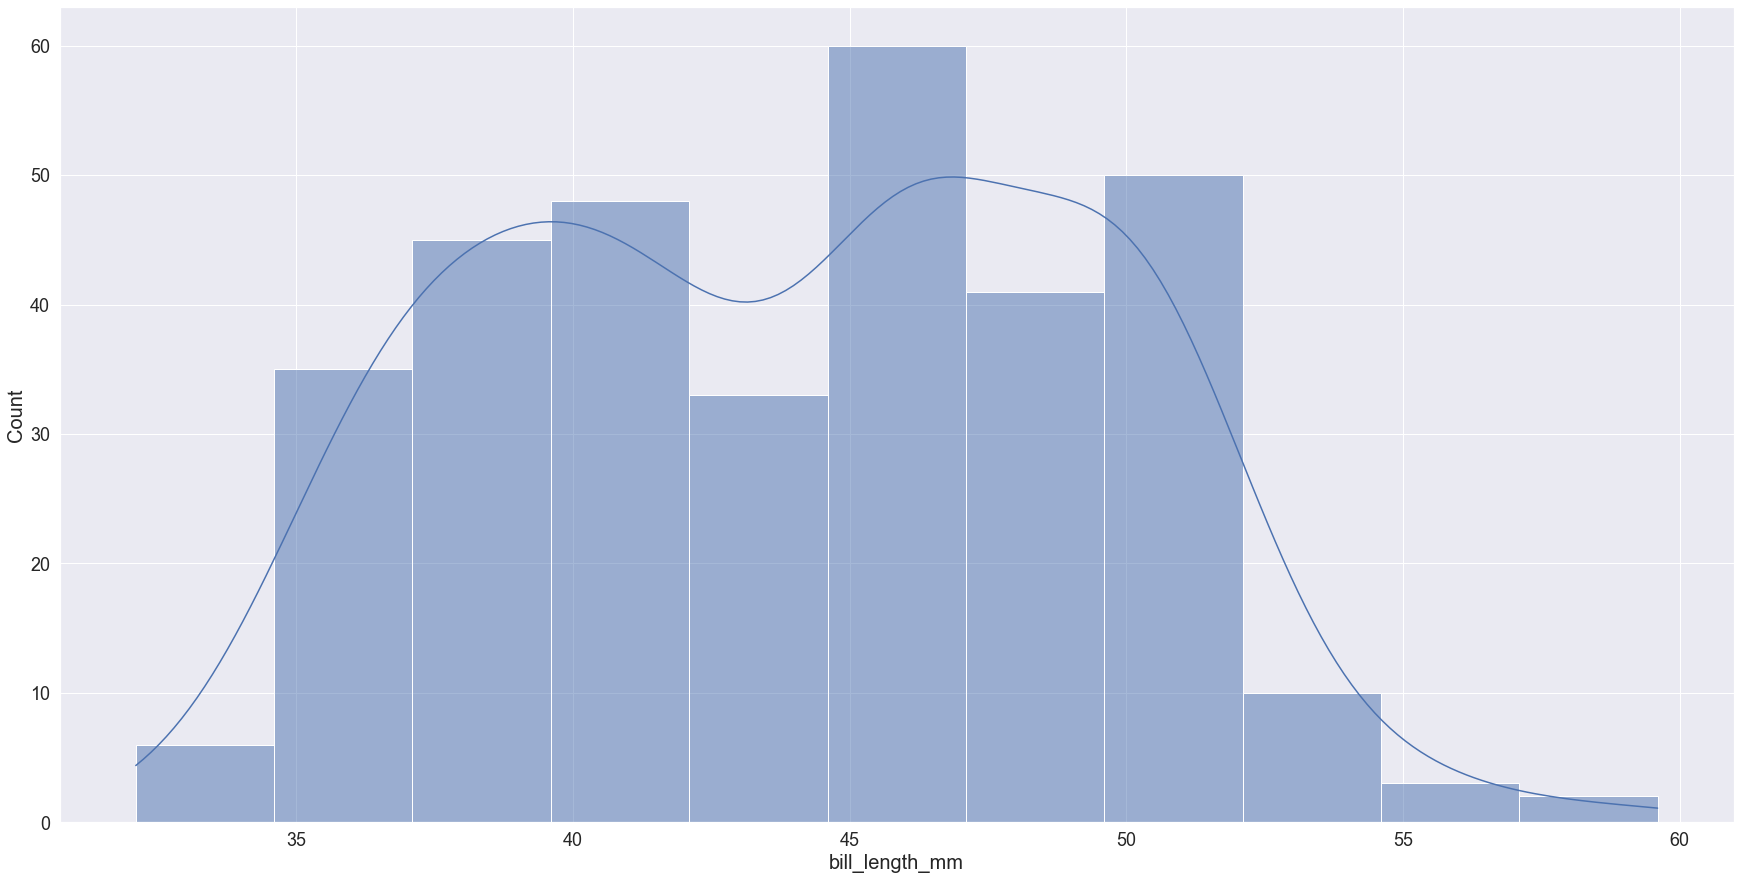

In [46]:
sns.histplot(x='bill_length_mm', data=penguins, kde=True );

### bins

Por padrão, o seaborn tentará decidir quantos compartimentos são apropriados para seus dados.

Mas se você quiser mudar isso, temos um argumento chamado **bins** e ele aceita algumas coisas diferentes.

Digamos que bins seja igual a 20.

O que isso fará é criar caixas separadas igualmente espaçadas em nosso intervalo.

Com **bins = 20** estamos vendo uma visão muito mais granular de como é essa distribuição aproximada.

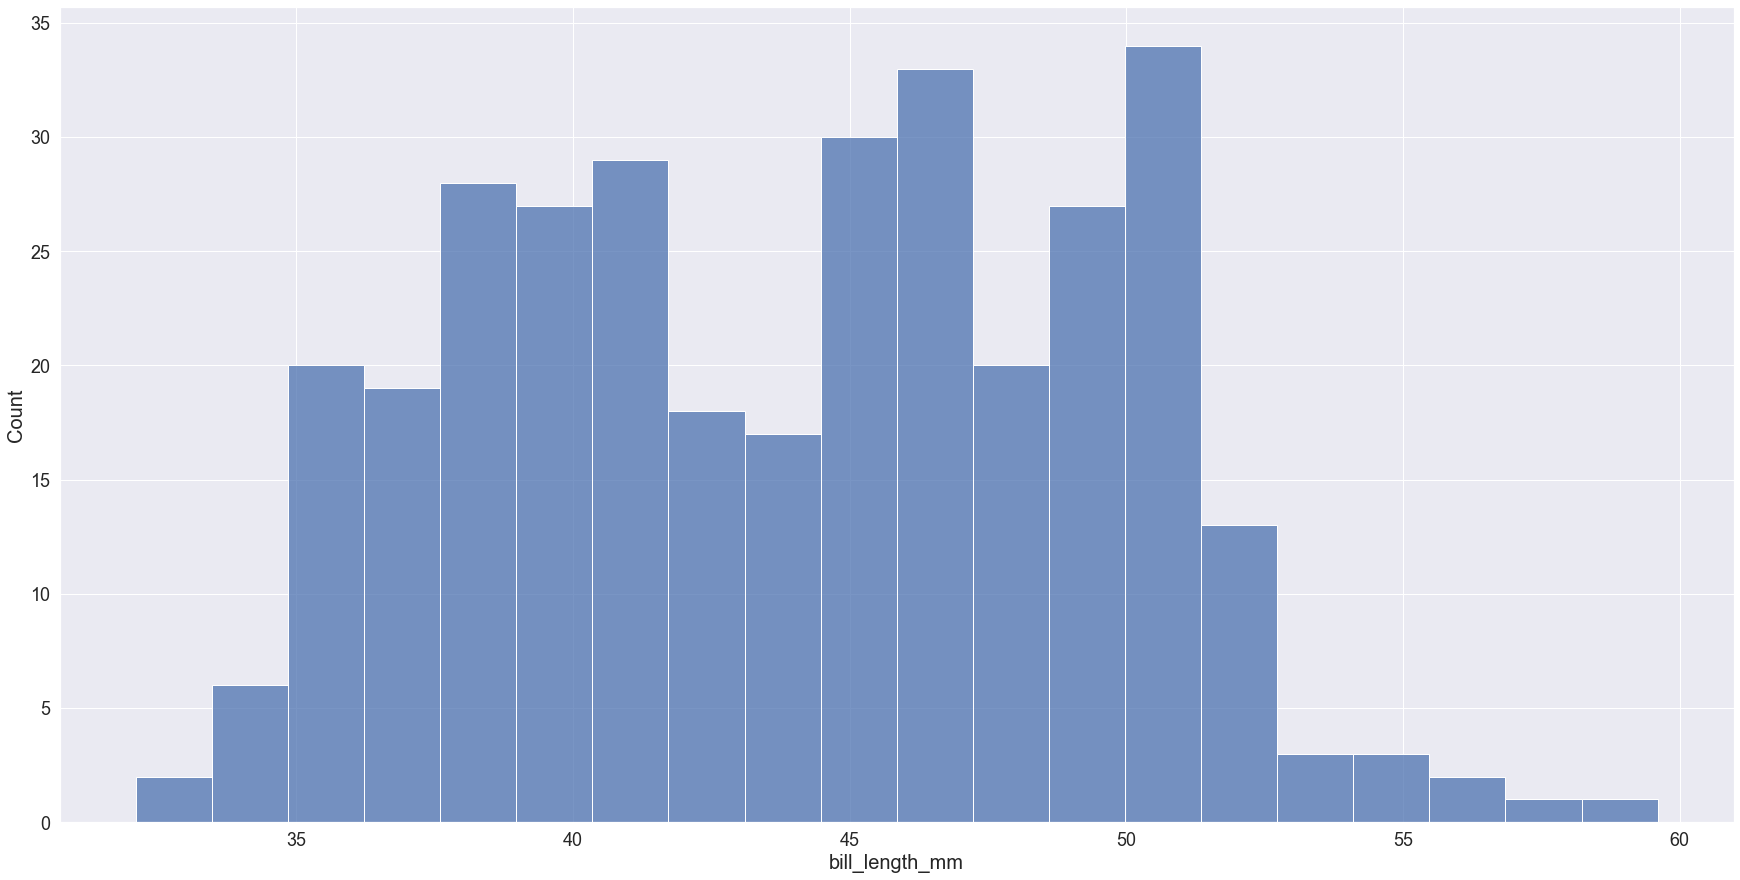

In [47]:
sns.histplot(x='bill_length_mm', data=penguins, bins=20); 

Se por algum motivo você tiver um local muito específico que gostaria que esses bins aparecessem, você também pode passar uma lista.

Onde cada um desses números que estou passando são, na verdade, os locais de início e fim das minhas caixas do histograma.

Então você pode até optar por deixar seus compartimentos irregularmente espaçados por algum motivo.

bins = [30, 40, **45**, 50, 60]

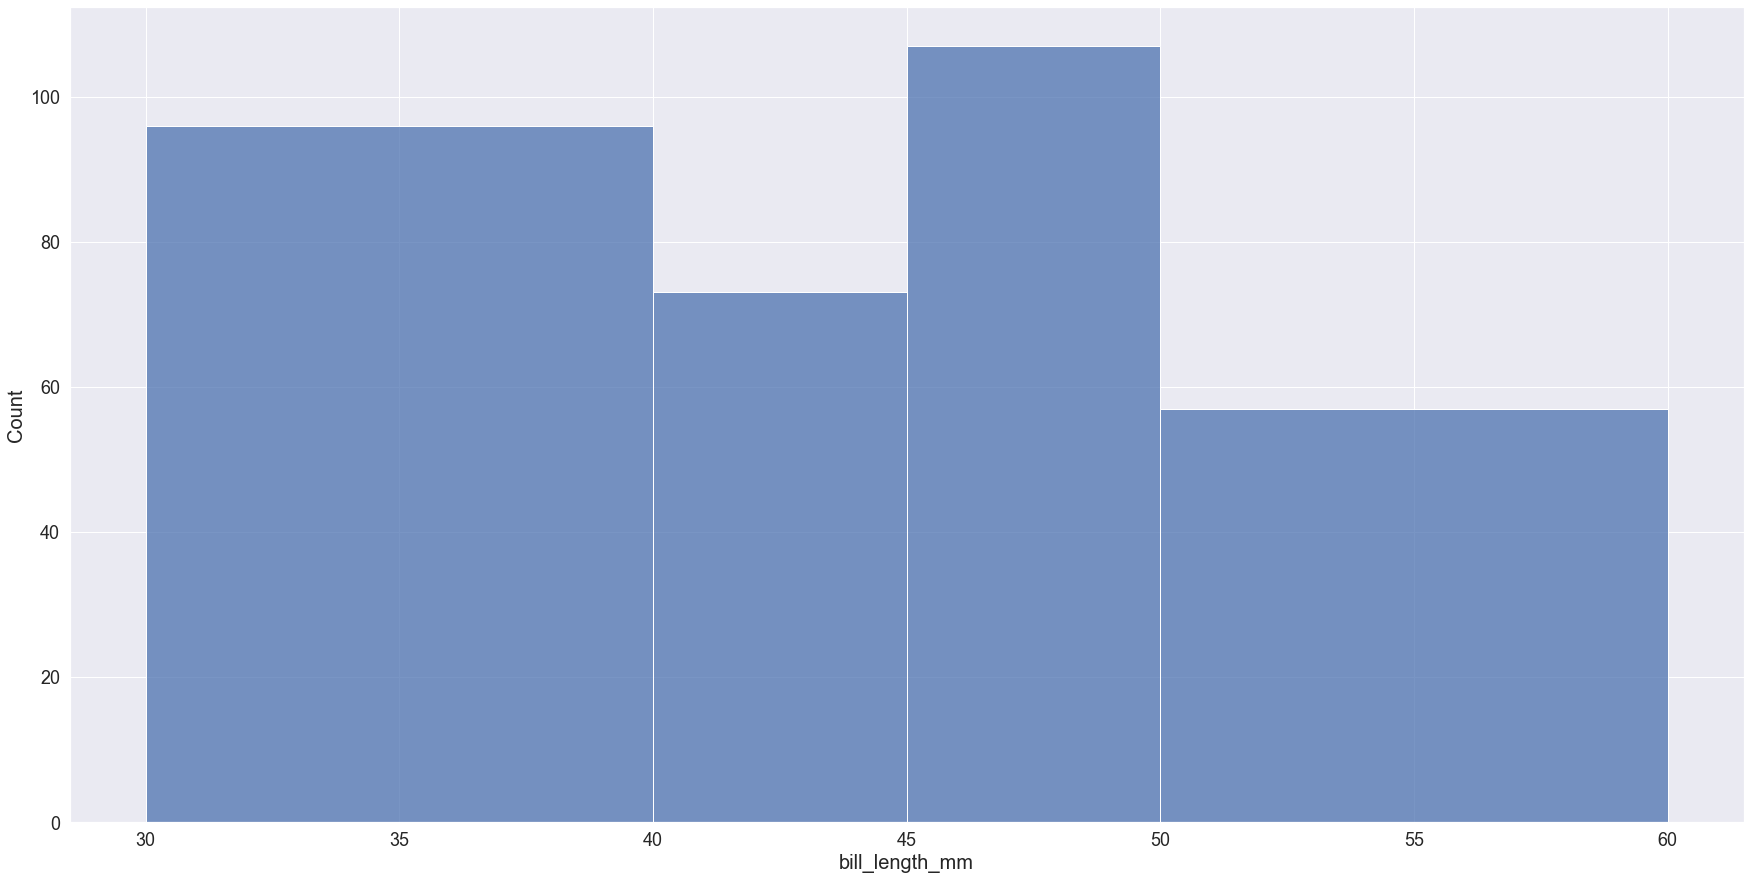

In [48]:
sns.histplot(x='bill_length_mm', data=penguins, bins=[30, 40, 45, 50, 60]);

### Binwidth - binrange

Dois argumentos que tenho achado super úteis são a largura do compartimento e o intervalo do compartimento.

Largura do compartimento, você pode definir para qualquer valor que desejar, digamos 10.

E o que isso está fazendo é que cada uma dessas caixas agora tem exatamente 10 unidades de largura.

E isso pode ser muito útil se digamos que você tem alguns valores de início e fim em mente.

Você pode passá-los para este argumento de **intervalo de bin**, digamos que talvez comecemos em 30 e vamos para 60. **binrange=(30, 60)**

As caixas estão parando a cada 10 unidades ao longo do caminho.

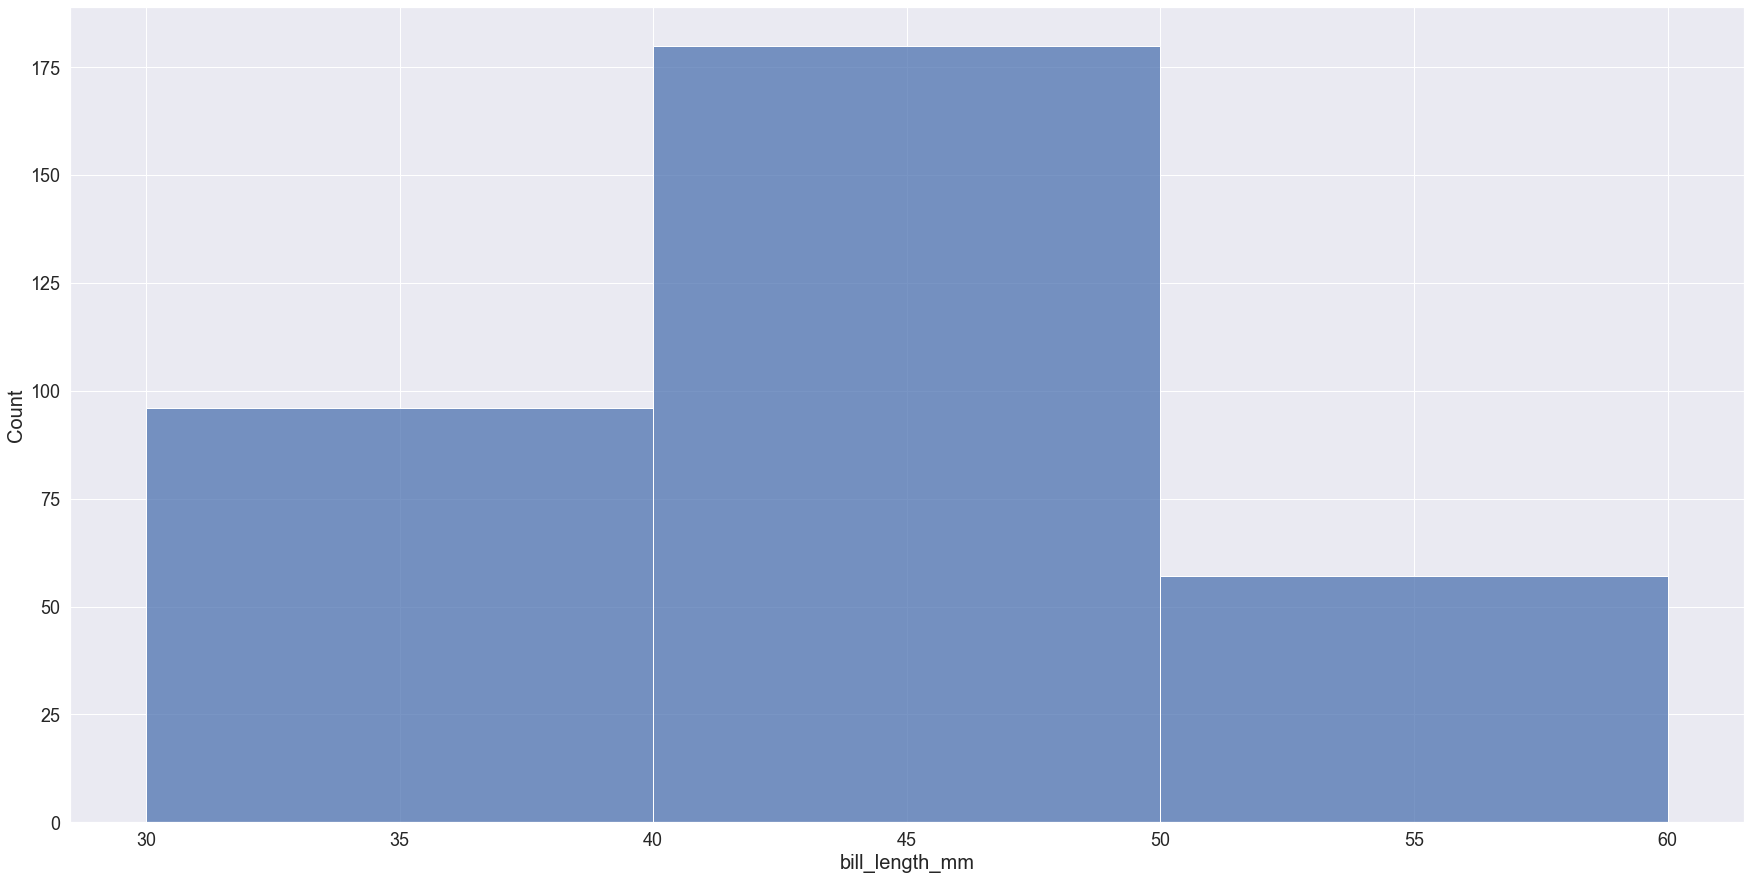

In [49]:
sns.histplot(x='bill_length_mm', data=penguins, binwidth=10, binrange=(30, 60) );  

Parâmetros permitem ter valores iniciais e finais bem definidos.

É muito fácil tornar esse histograma mais granular apenas alterando a aparência da **largura do compartimento** para 5. 

**binwidth=5**

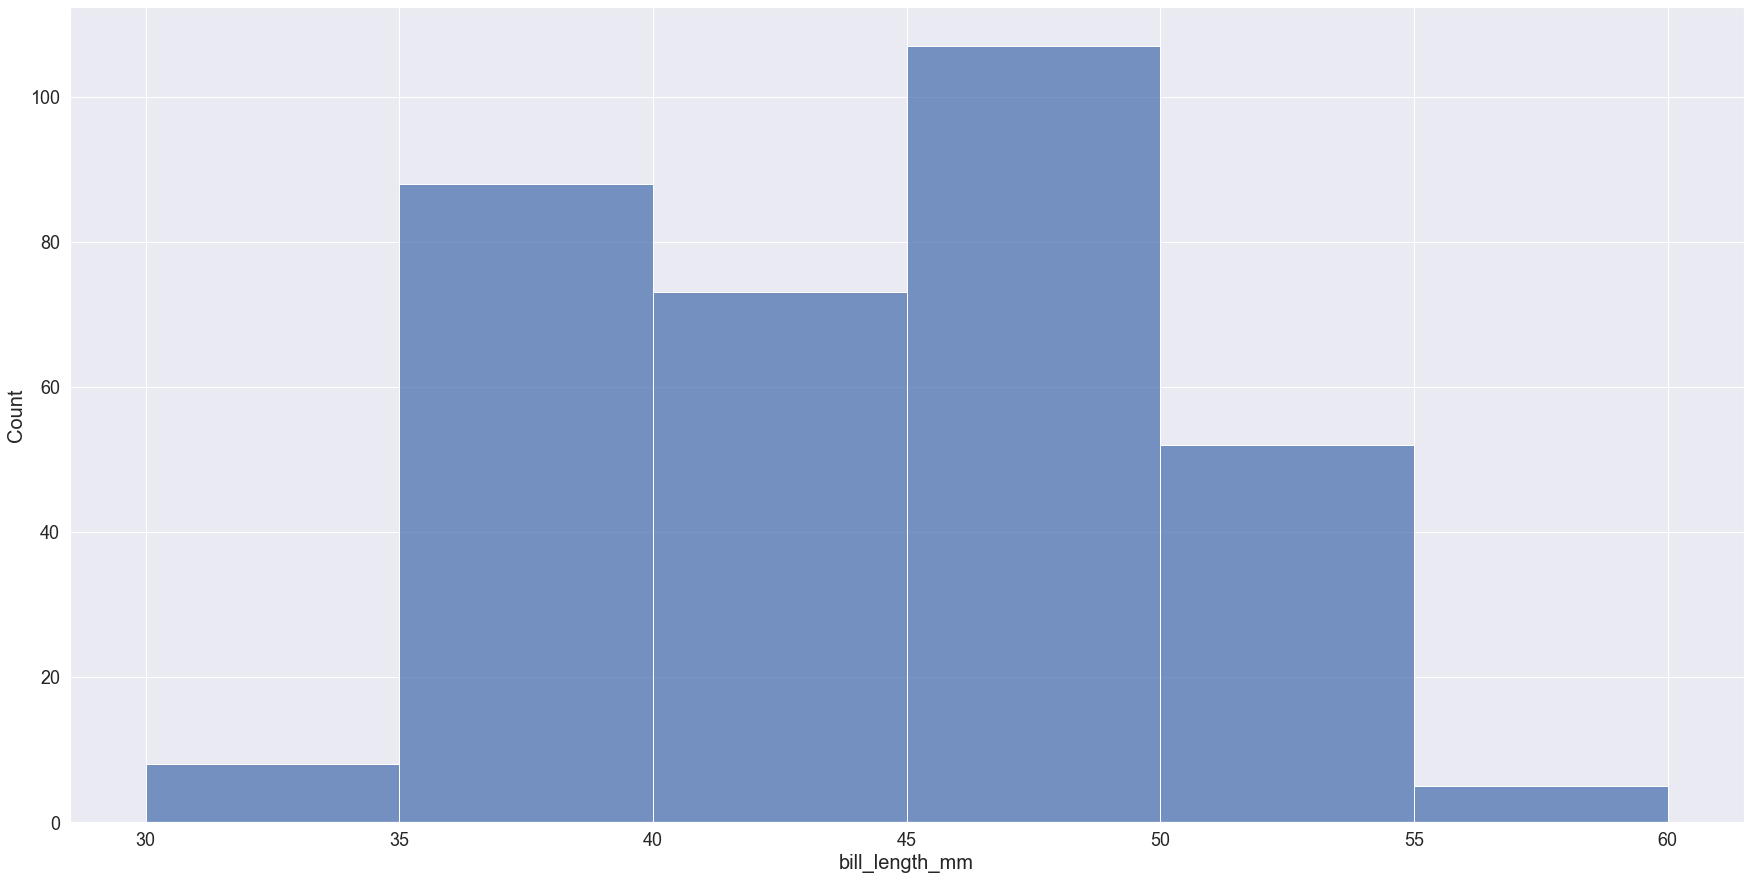

In [50]:
sns.histplot(x='bill_length_mm', data=penguins, binwidth=5, binrange=(30, 60) );  

## Statistics

### stat

Além de bins e adicionar um kde, você também tem a opção de alterar a estatística exibida em seu eixo y.

Vamos dar uma olhada no histplot também vem com este argumento **stat**.

**'count' - contar**

Então, em primeiro lugar, por padrão, a estatística que normalmente observamos é a contagem.

E então dê uma olhada no que está plotado aqui no eixo y, na verdade temos uma contagem de quantos pinguins vimos com cada tipo de comprimento de bico para cada caixa

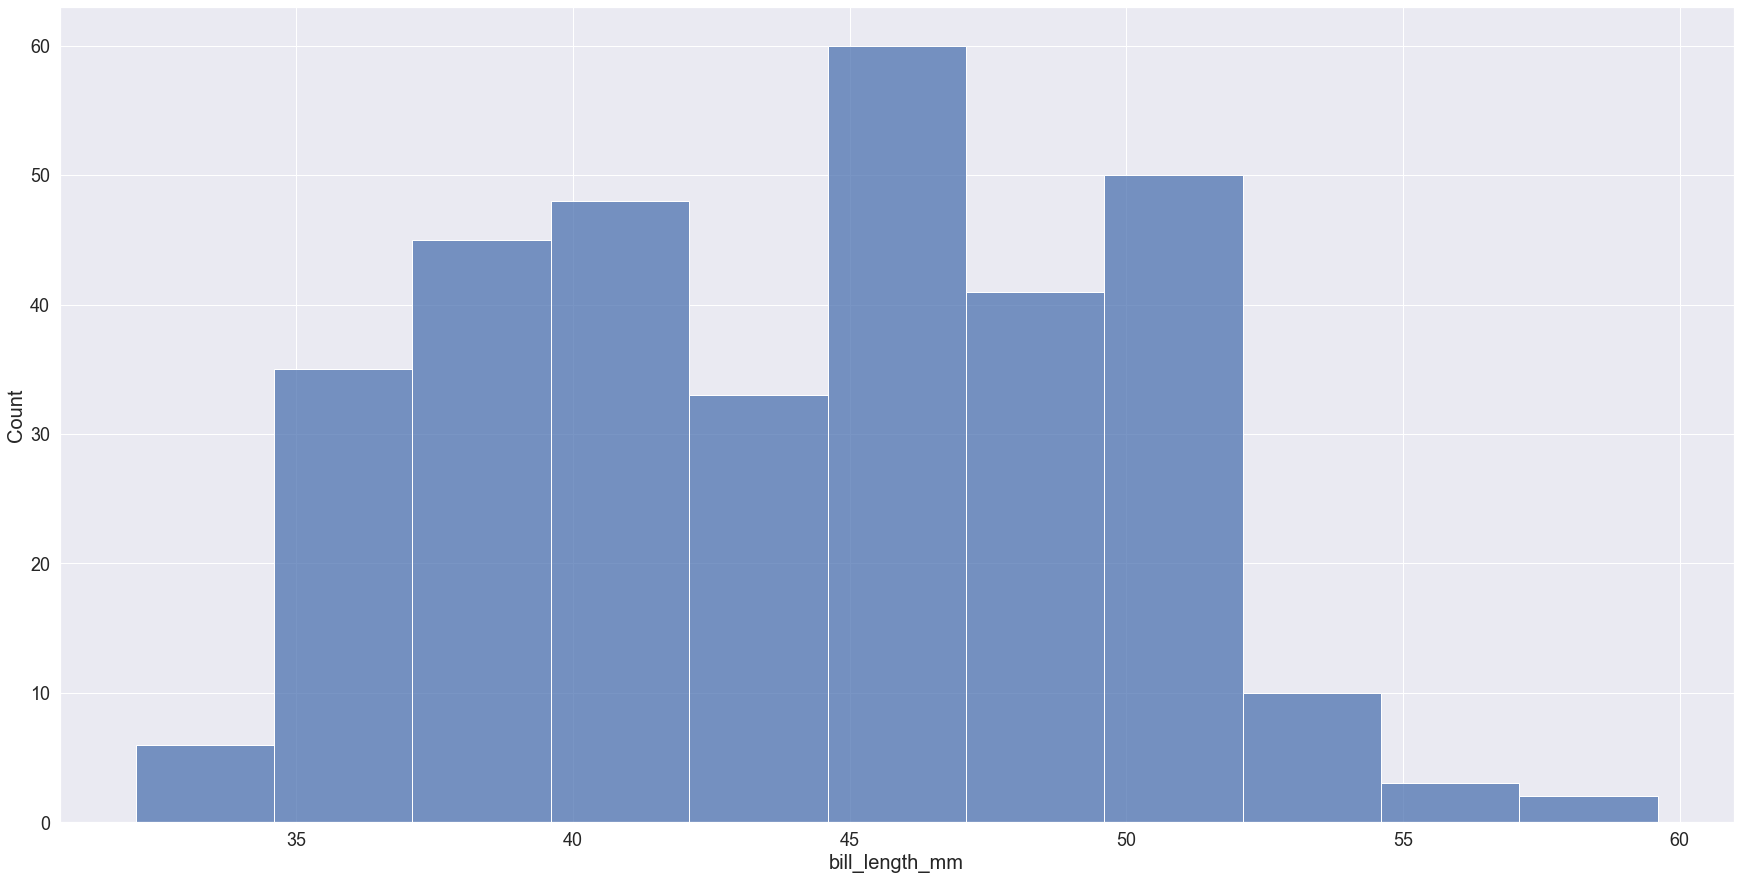

In [51]:
sns.histplot(x='bill_length_mm', data=penguins, stat='count');

**densidade** - ÁREA do histograma soma um

Podemos realmente alterar a estatística que estamos plotando no eixo y.

Você tem algumas opções diferentes, mas a primeira aqui que vou demonstrar é a densidade.

e com este novamente preste atenção ao que está acontecendo no eixo y

Agora estamos tendo uma noção de como é a densidade para essa distribuição.

Quando definimos a estatística como densidade o que estamos fazendo é que a área do histograma deve somar um.

Então, estamos tentando emular uma função de densidade de probabilidade.

**O que isso significa é que para cada uma dessas barras se nós realmente pegarmos a altura nesta escala de densidade e multiplicá-la pela largura da barra e então somar todas as barras, nós deveríamos terminar com um valor de um.**

Portanto, você pode mudar para essa densidade se estiver tentando obter uma representação da aparência da função densidade de probabilidade.

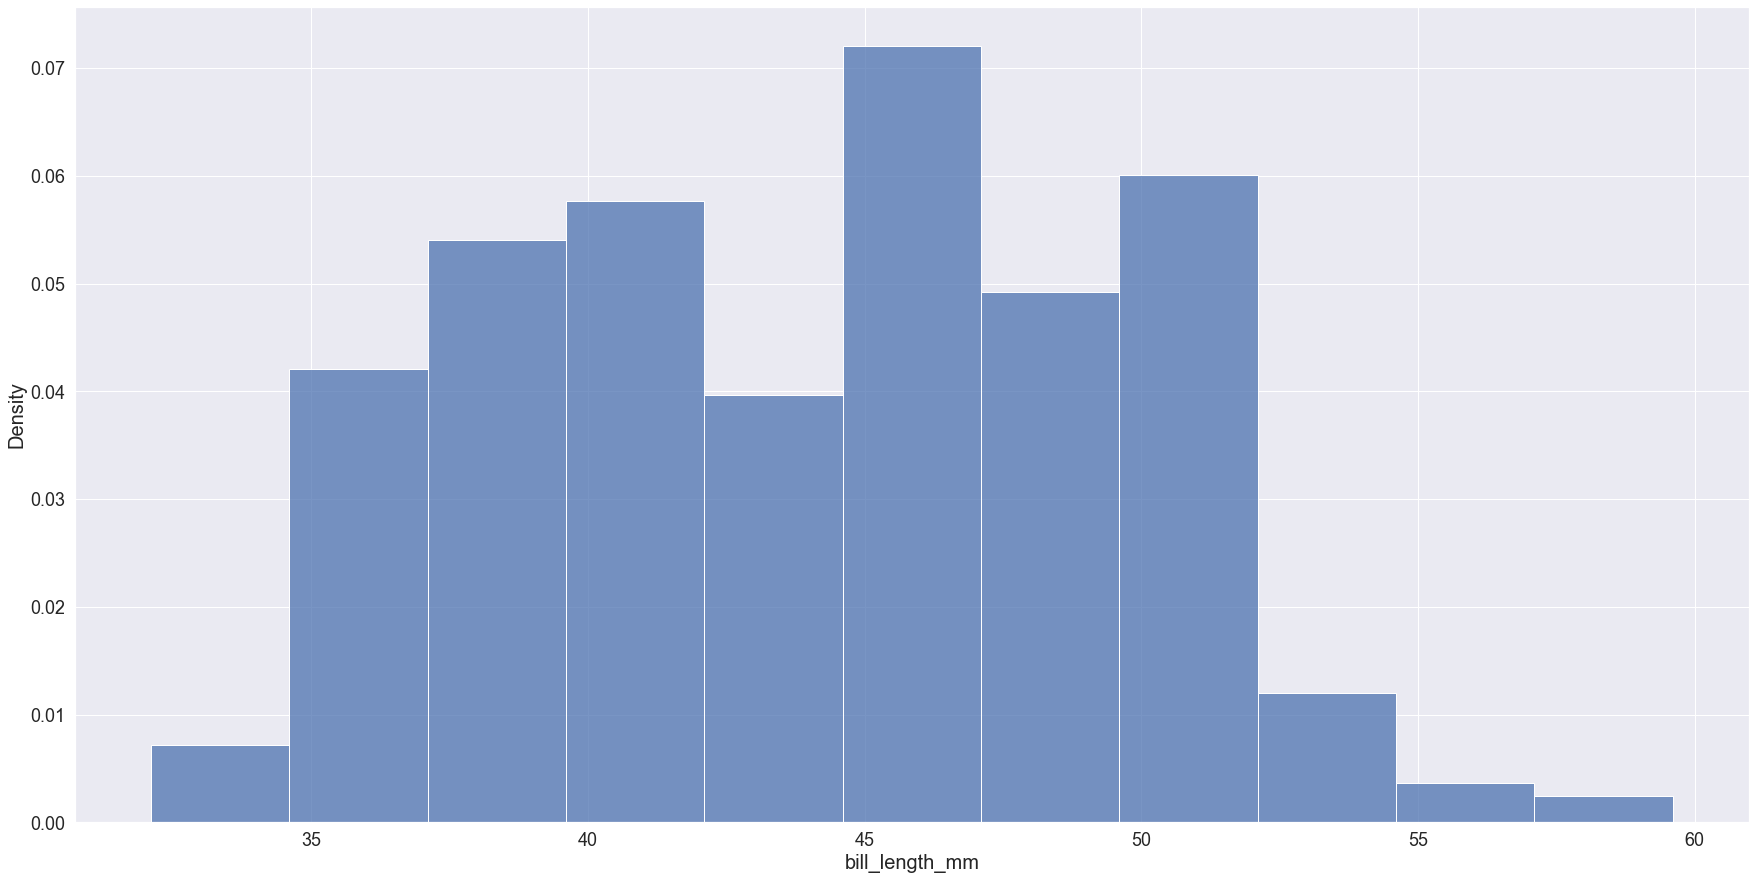

In [52]:
sns.histplot(x='bill_length_mm', data=penguins,stat='density');

**probabilidade** - HEIGHT das barras do histograma para um

Outra estatística que você pode acessar aqui é a probabilidade. 

Então, se mudarmos stat para probabilidade. **stat='probability'**

Agora veremos que cada uma dessas barras está na verdade representando a probabilidade de um pinguim acabar neste bin.

**Então agora é a altura de todas essas barras que devem somar um.**

Porque estamos lidando com o espaço de probabilidade como uma propriedade estatística final.

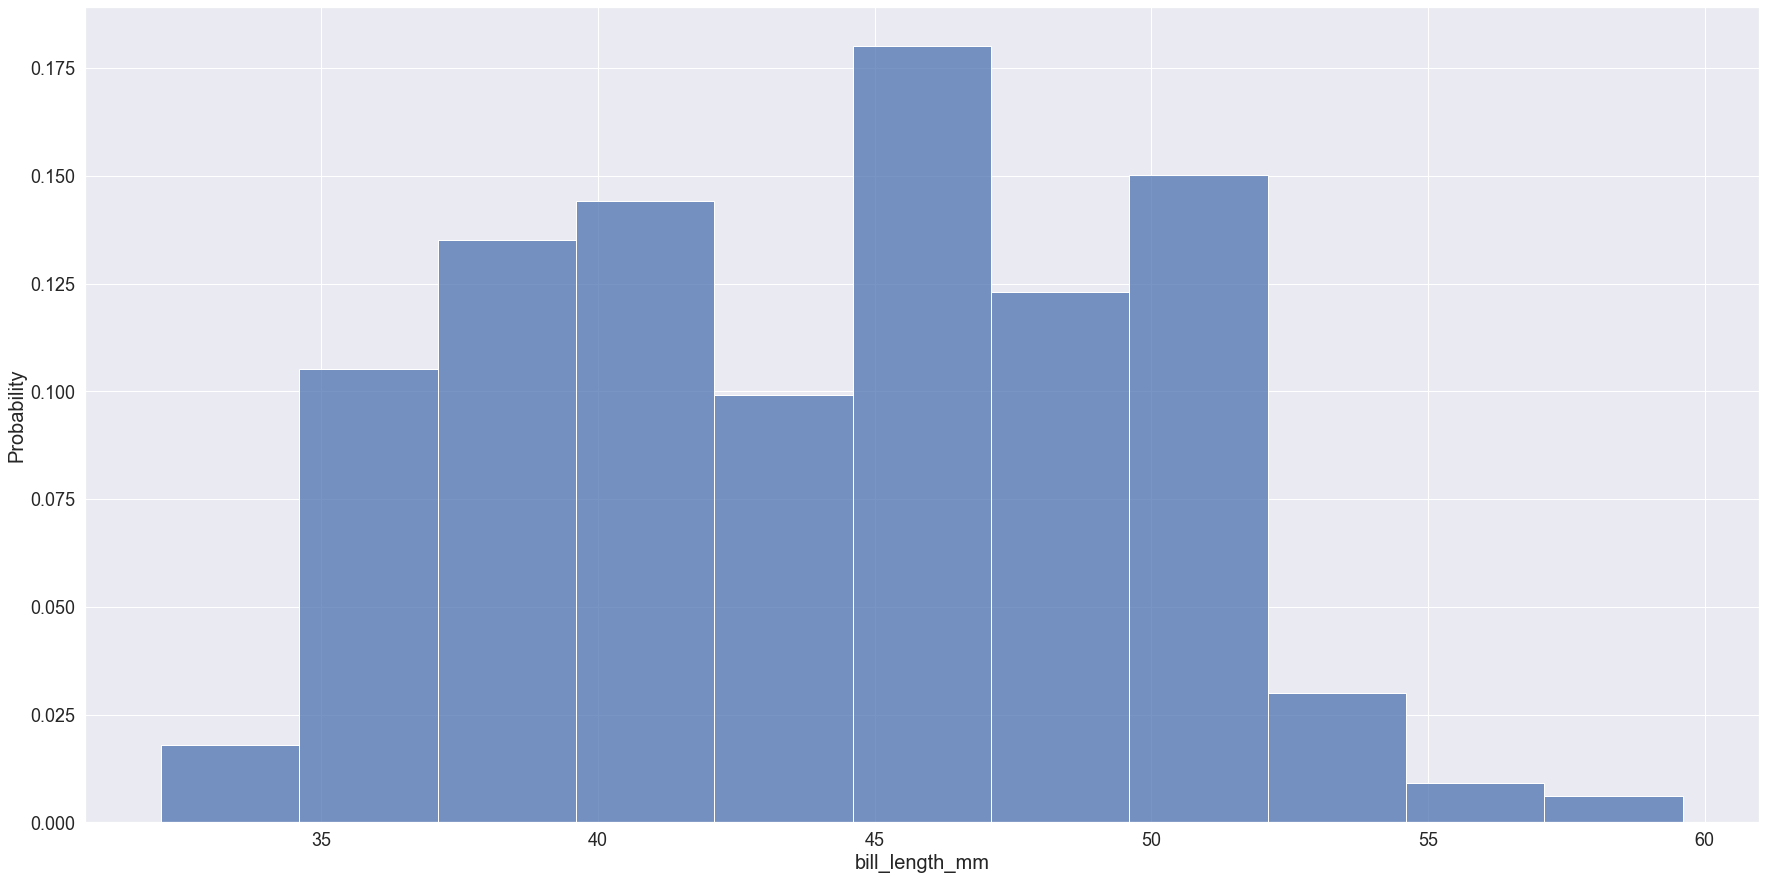

In [53]:
sns.histplot(x='bill_length_mm', data=penguins, stat='probability');

### Cumulative

**fill** - argumento cumulativo

Então, mudei minha estatística para probabilidade e alterei um pouco o estilo. **fill=False, element='step'**

Mas o que posso fazer é trocar esse argumento **cumulative=True** .

Então, isso nos dá uma noção de como essa probabilidade se acumula à medida que nos movemos no eixo x

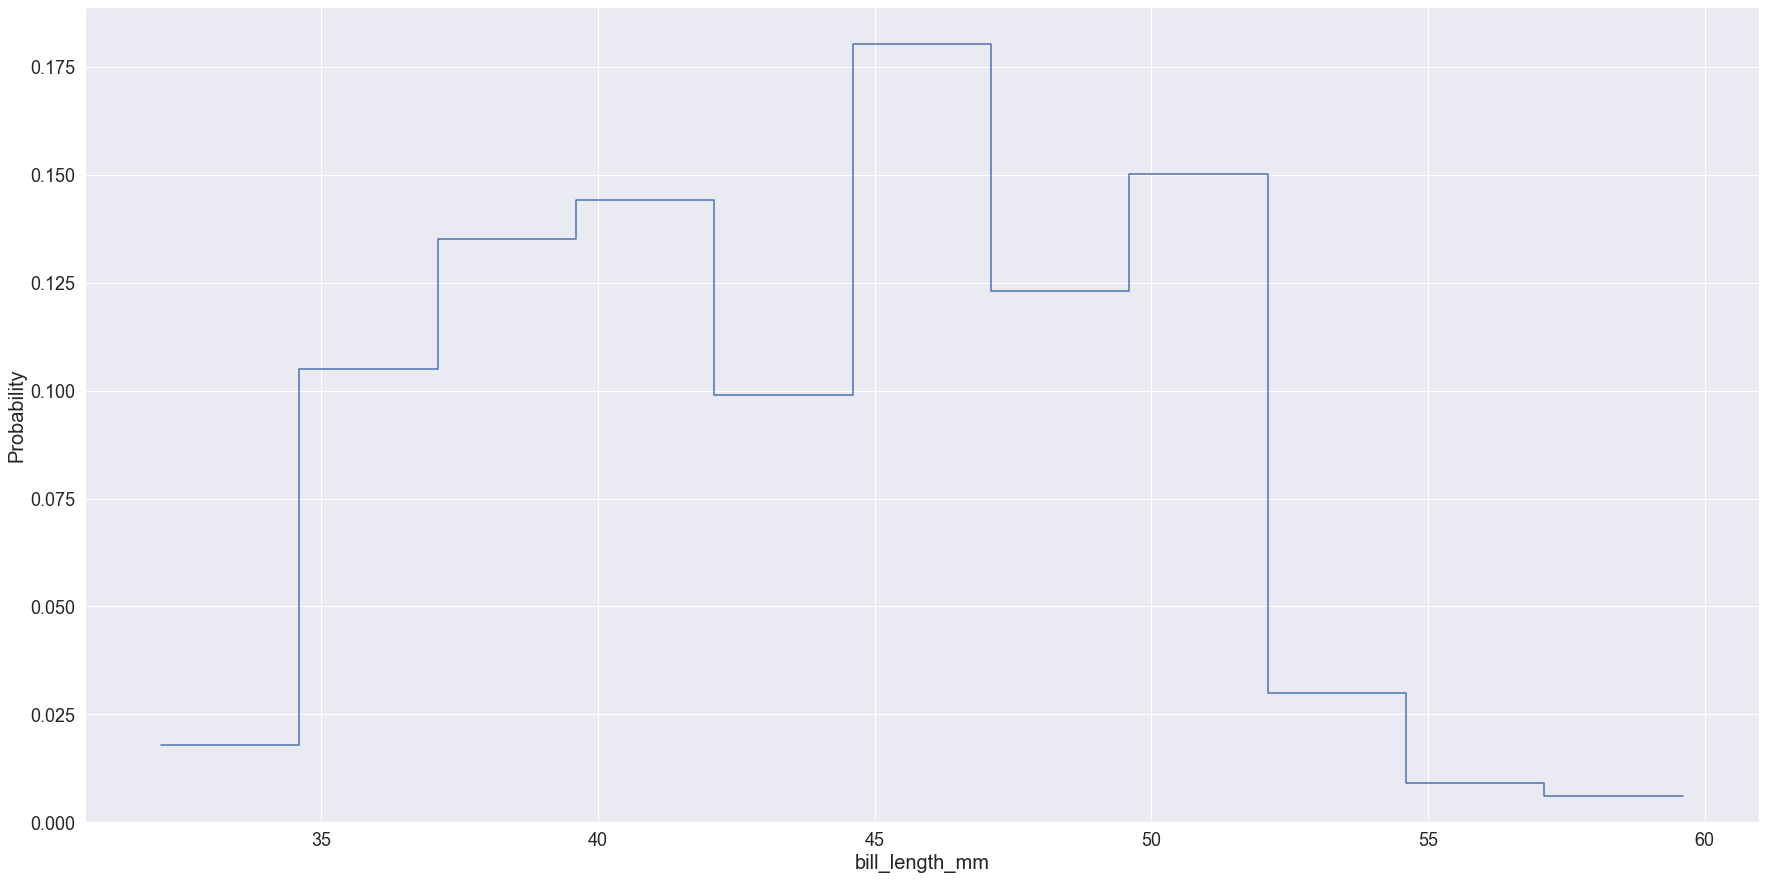

In [54]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability', fill=False, element='step' );

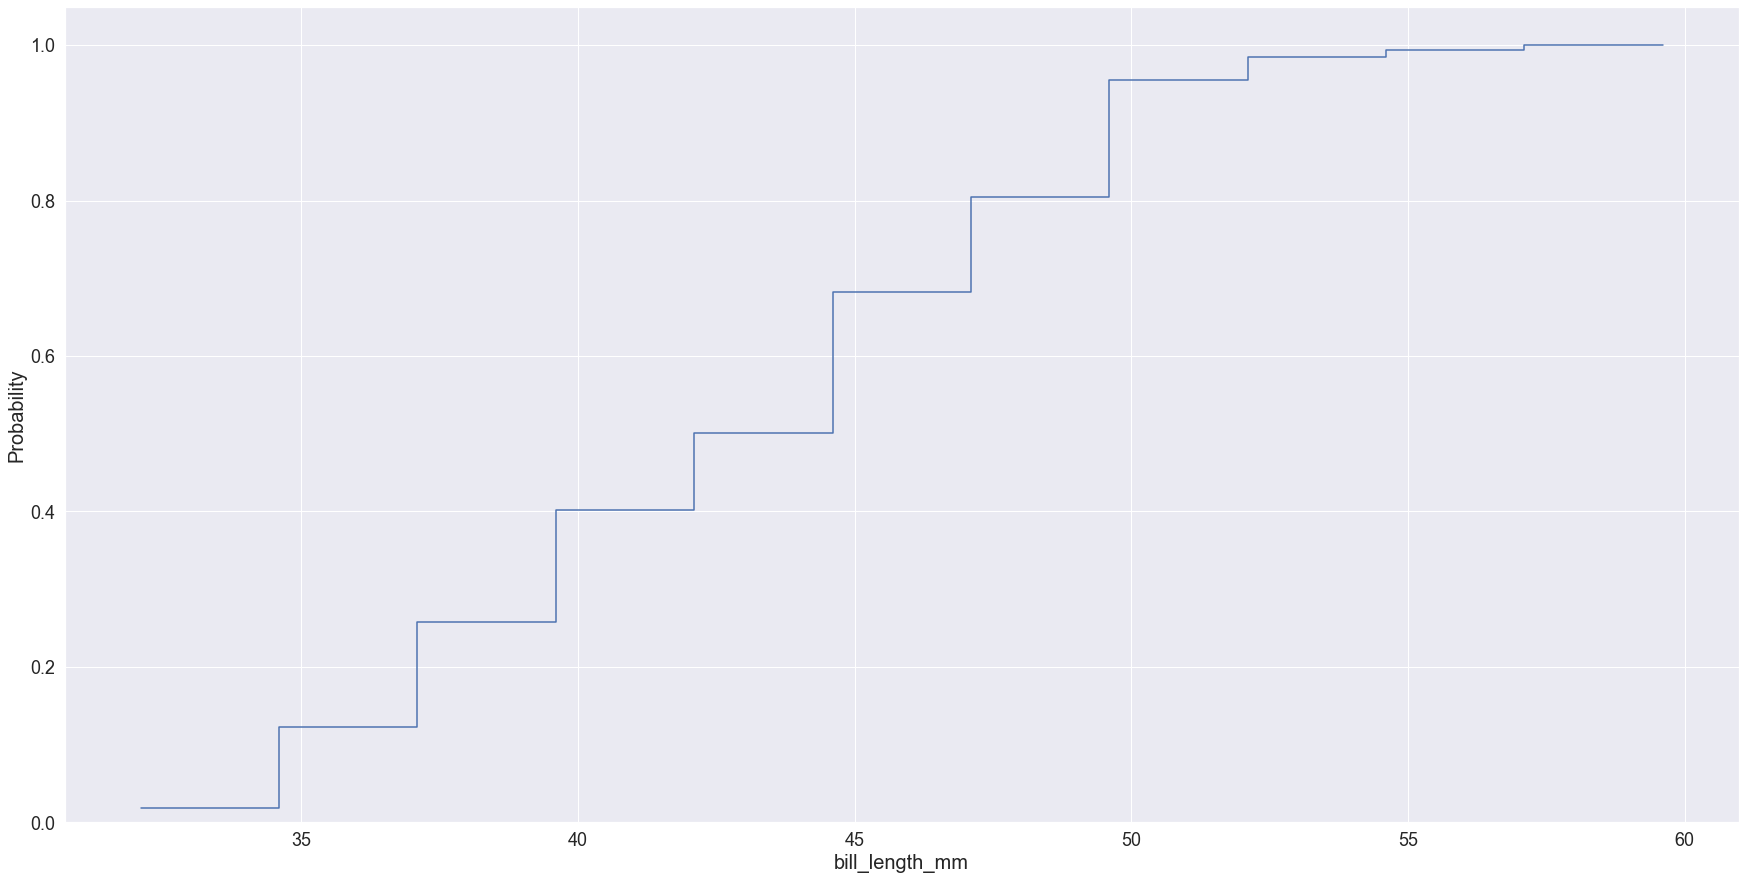

In [55]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability', fill=False, element='step', cumulative=True );

## Categorical Variables

### Hue

Até agora vimos como construir um histograma para uma variável numérica.

Mas o que acontece se seus dados tiverem categorias diferentes

Se você quiser dividir seus dados por alguma variável categórica, como outros gráficos do seaborn

O histplot também aceita este argumento chamado ***hue***

O que você deseja passar aqui é apenas o nome da coluna que contém seus dados categóricos

Isso divide seus dados por essa coluna de matiz **hue='species'**

E você verá uma cor diferente para cada espécie diferente no conjunto de dados

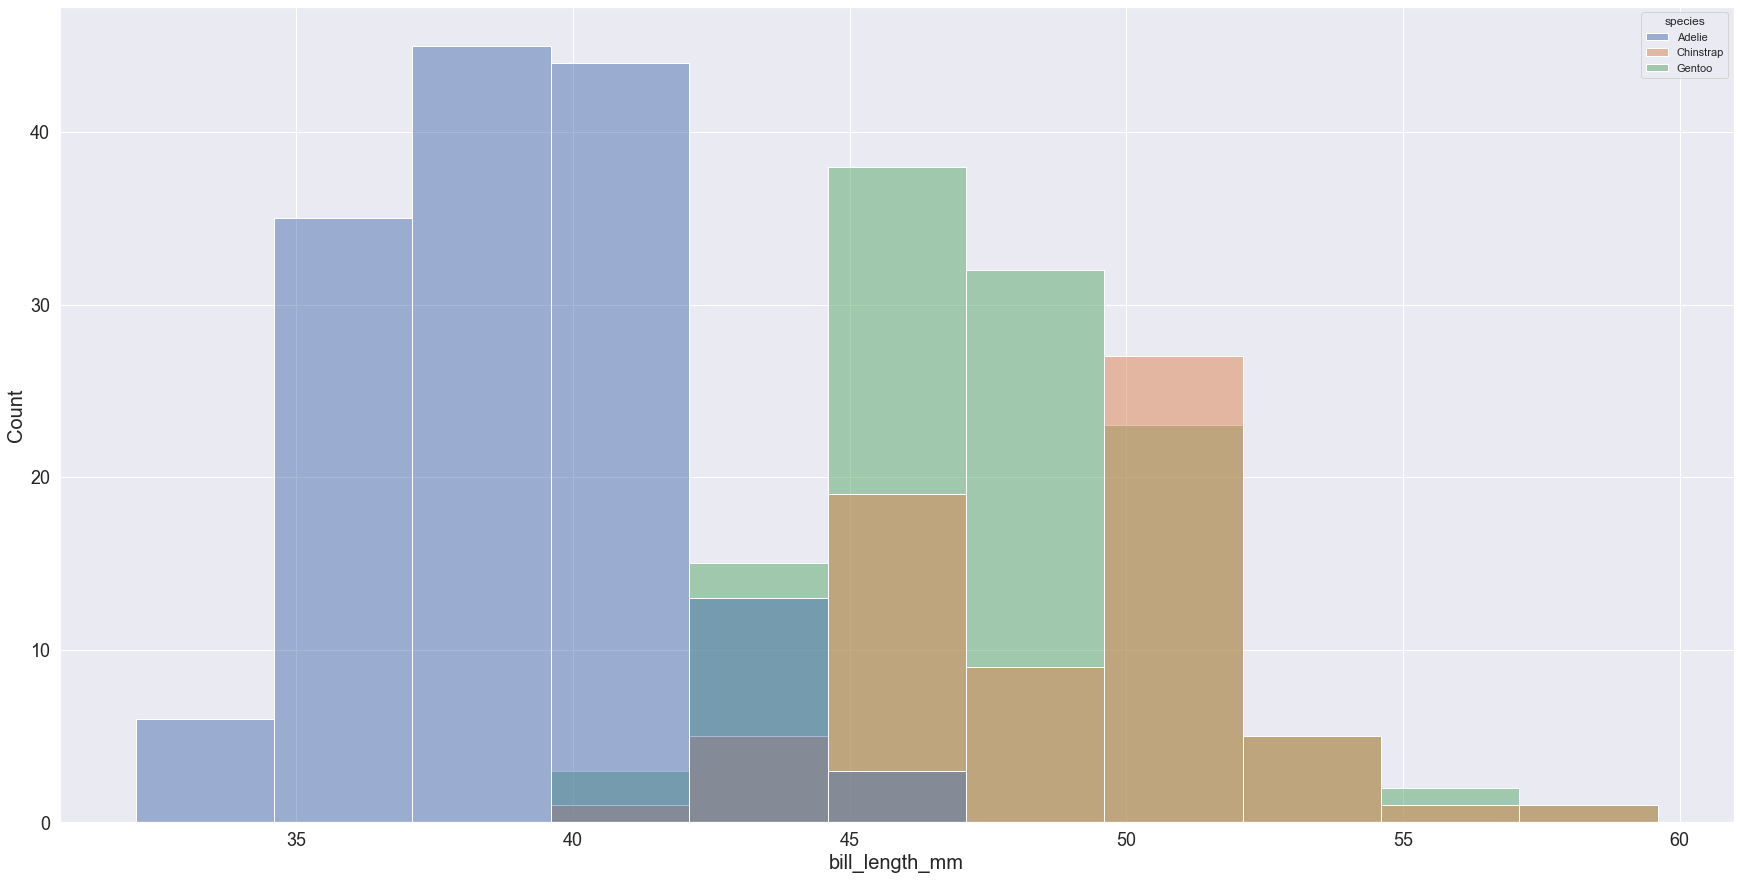

In [56]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species');

### Element

se você achar que a distribuição dos seus grupos se sobrepõe um pouco, você tem algumas opções diferentes

A primeira opção é alterar este ***argumento do elemento***

Então ao invés de usar as barras padrão

Podemos mudar este elemento para ***step***  

**element='step'**

Isso apenas nos mostrará o contorno de como o histograma se parece.

às vezes é mais fácil distinguir as diferentes camadas de suas categorias

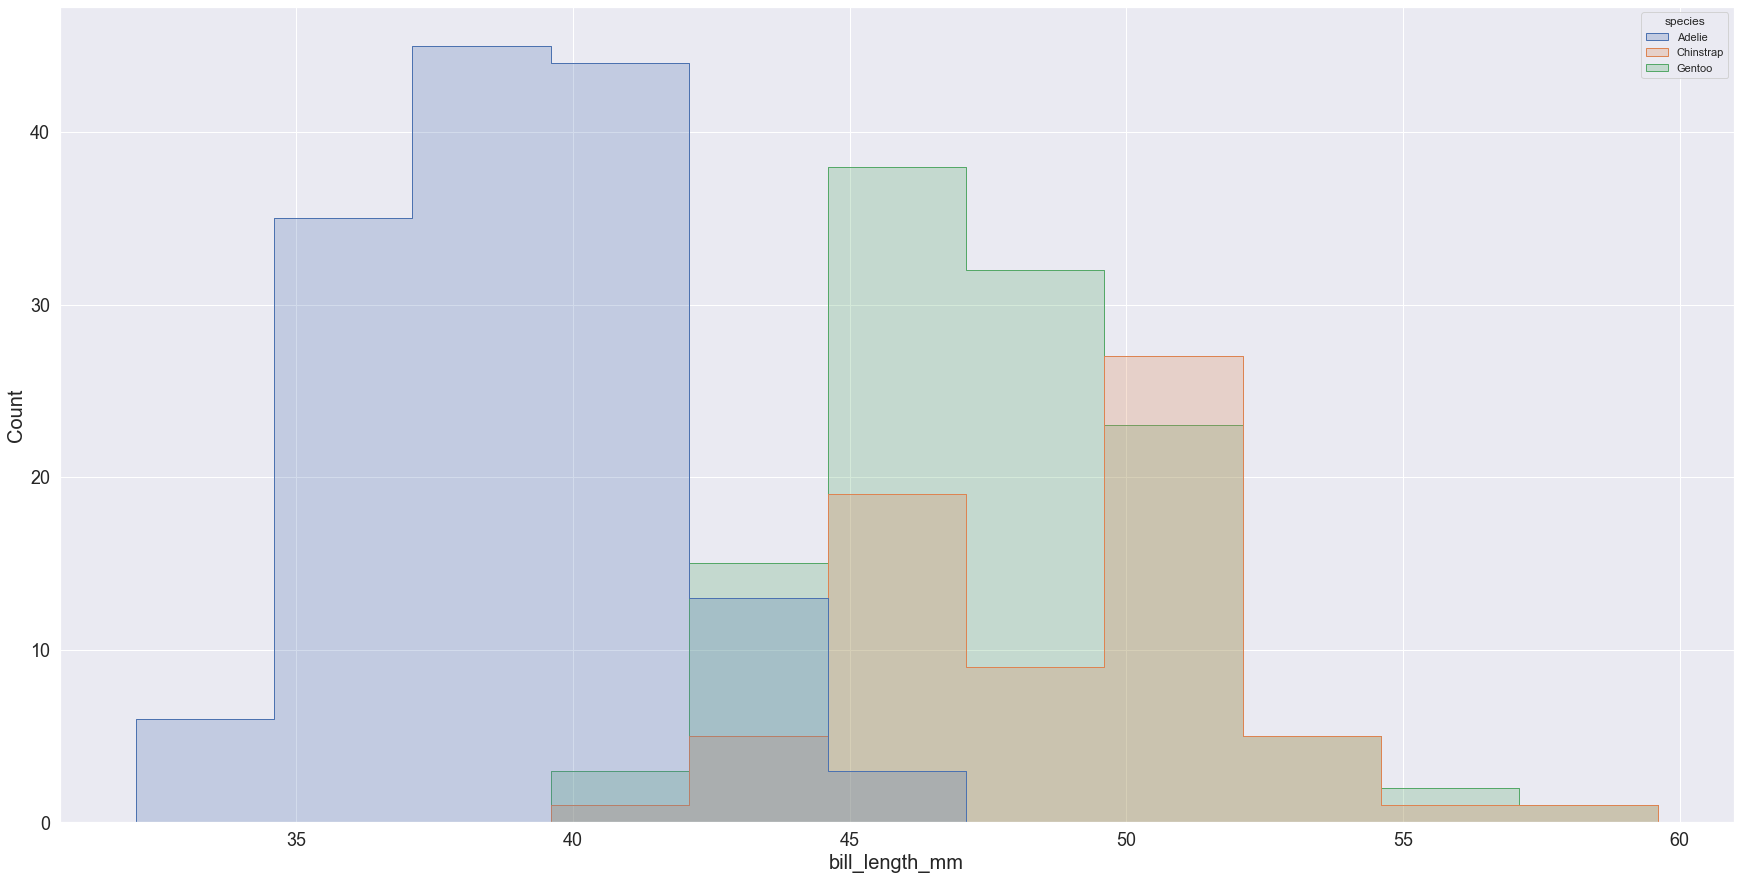

In [57]:
sns.histplot(x='bill_length_mm', data=penguins, 
             hue='species', element='step');

#### Poly

Você também tem a opção de definir o elemento para ***poly***

**element='poly'**

Produzirá polígonos suavizados

Isso ajuda a distinguir diferentes camadas para suas categorias.

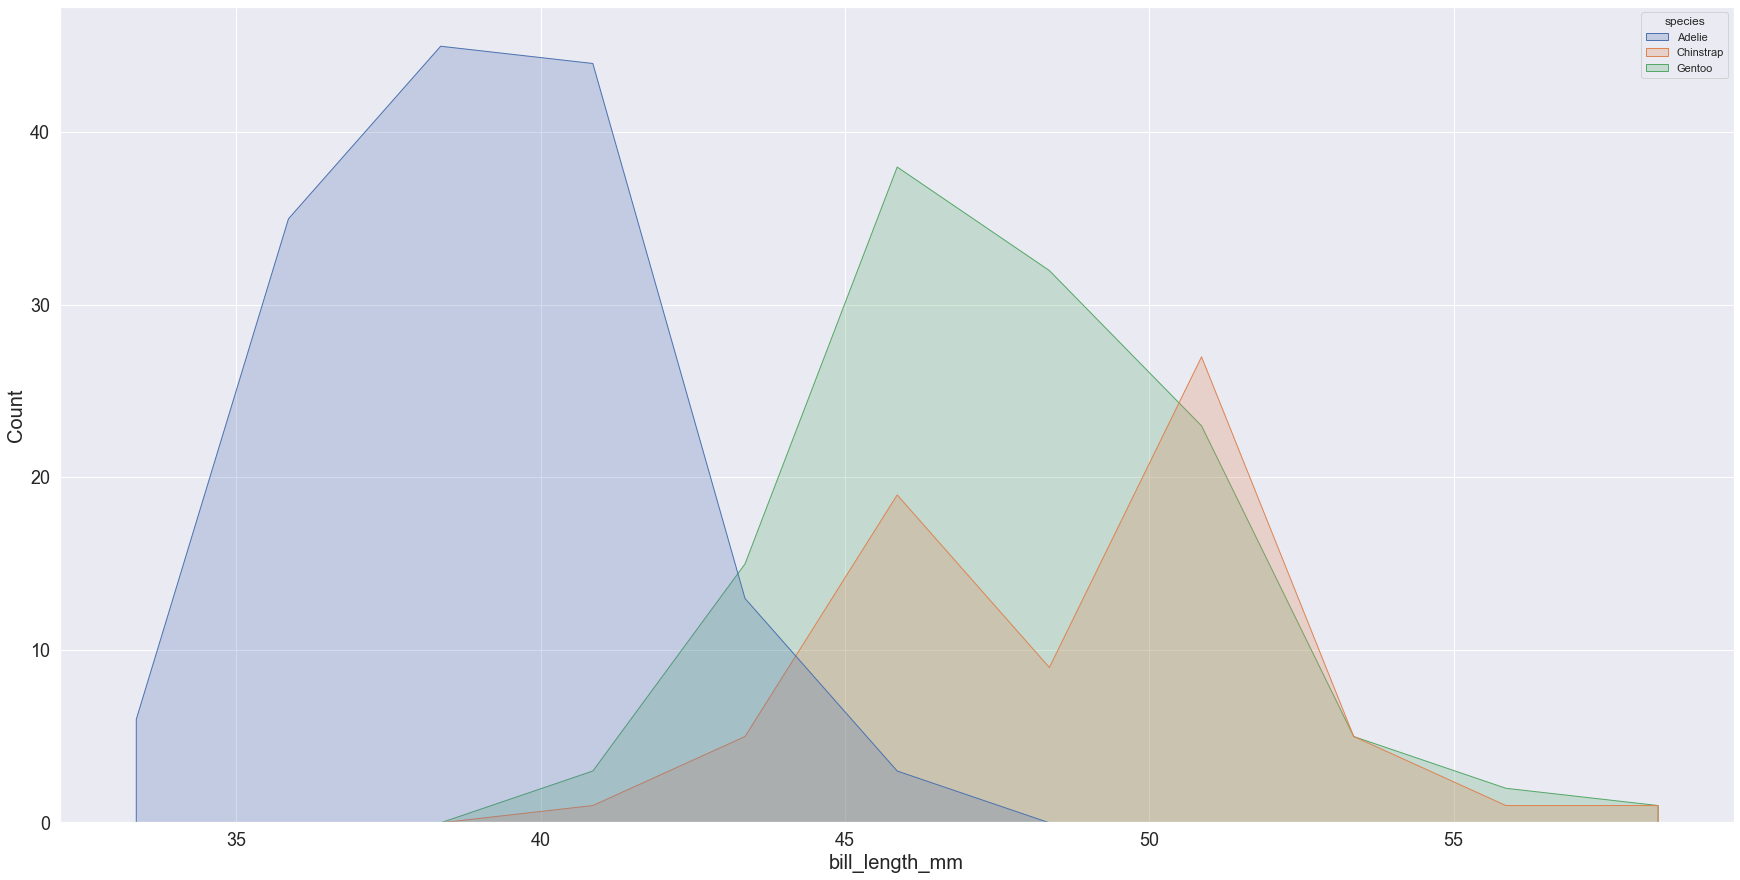

In [58]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species',element='poly');

### Multiple

O outro argumento que pode ajudá-lo a distinguir entre essas diferentes categorias é chamado de *** multiple - múltiplo***

Então agora o padrão será ***layer - camada***

Em que cada uma dessas categorias são colocadas em camadas umas sobre as outras

Mas podemos mudar isso se quisermos

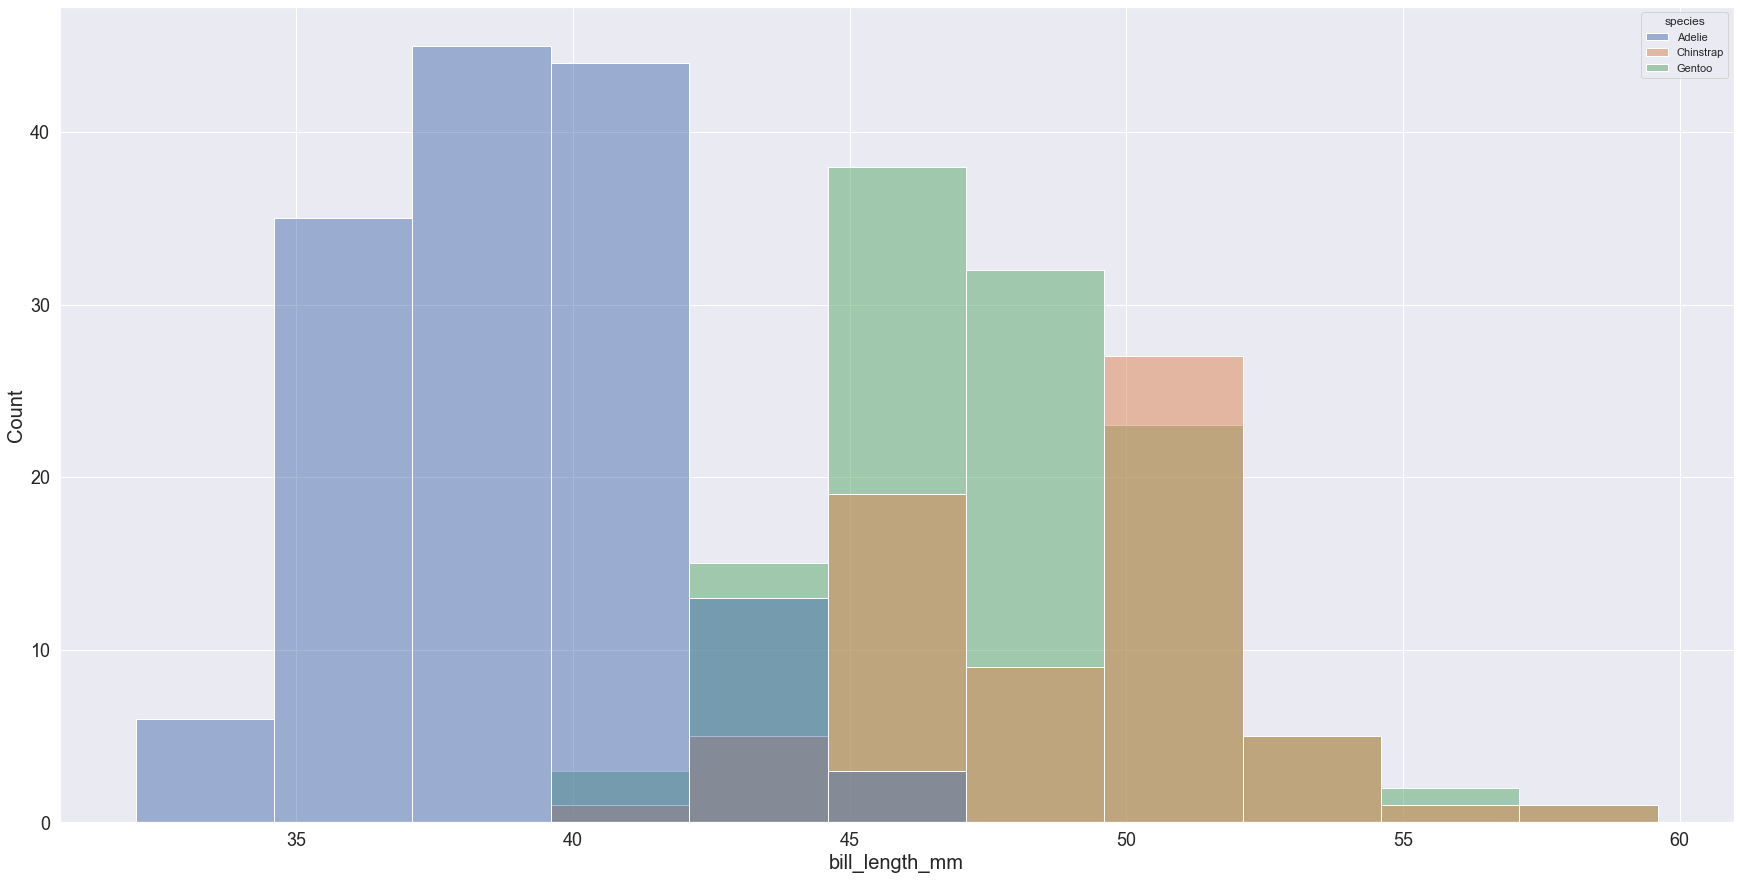

In [59]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species', multiple='layer'); 

#### Stack

Vamos mudar para ***stack***

**multiple='stack'**

Então, agora, se estamos pensando em contar no eixo y, o seaborn está na verdade contando

Quais espécies aparecem em cada bin e apenas empilhando-as umas sobre as outras

Por exemplo, vemos todas as três espécies de pinguins nesses bin do meio

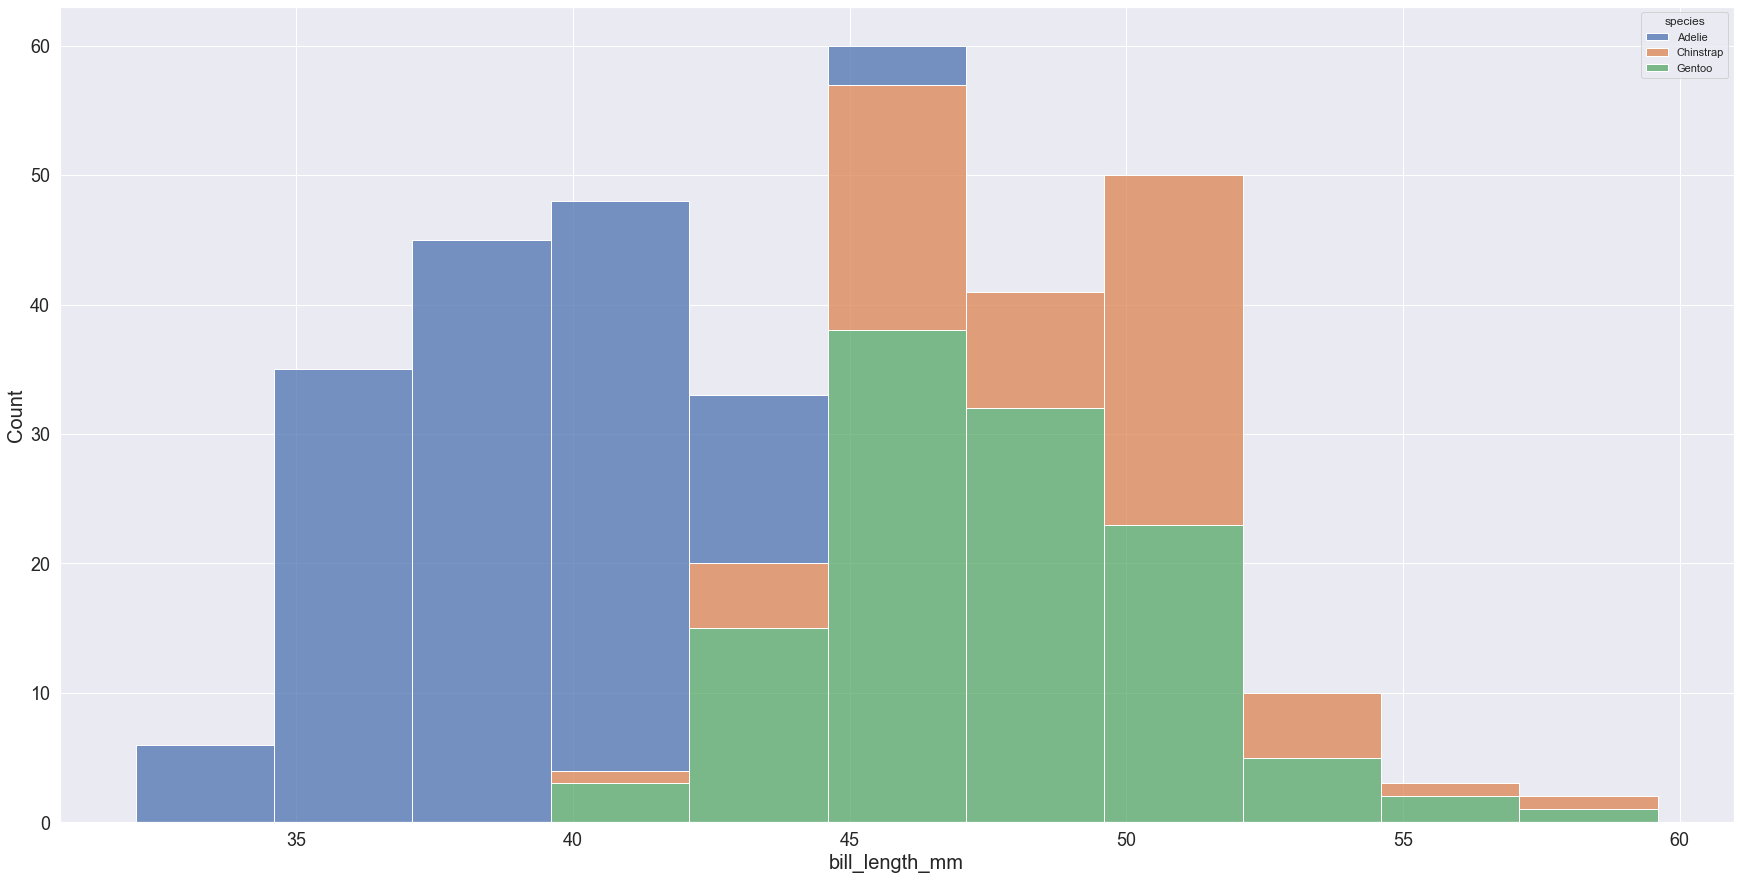

In [60]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species', multiple='stack'); 

#### Fill

Outra opção com múltiplos é chamada ***fill***

**multiple='fill'**

O preenchimento basicamente dimensiona cada bin para variar entre zero e um

**Está apenas mostrando a proporção de cada espécie em cada bin**

Então, por exemplo, cerca de 50 % do ***bin 8*** é composto por pinguins Gentoo e os outros 50 % por cento são Chinstrap.

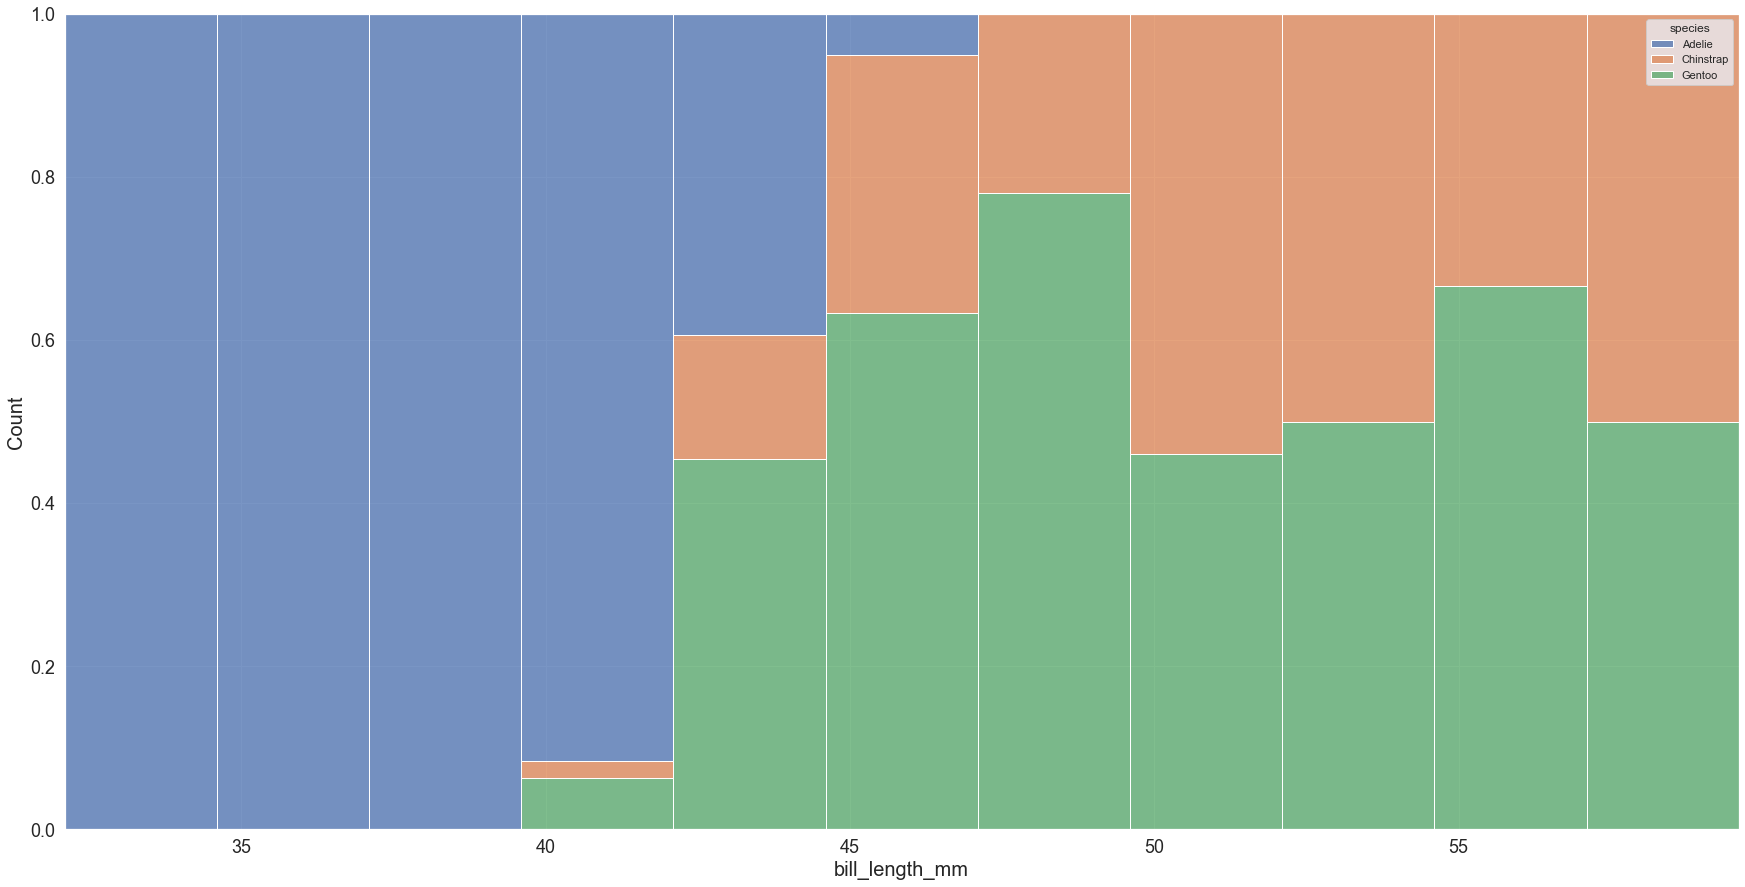

In [61]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species', multiple='fill'); 

Outra opção de múltiplos é chamada **Dodge = escapar/esquivar**

**multiple='dodge'**

Argumento de matiz agora é 'ilha'

**hue='island'**

Então agora o histplot nos mostra como cada espécie está distribuída nas diferentes opções de ilha

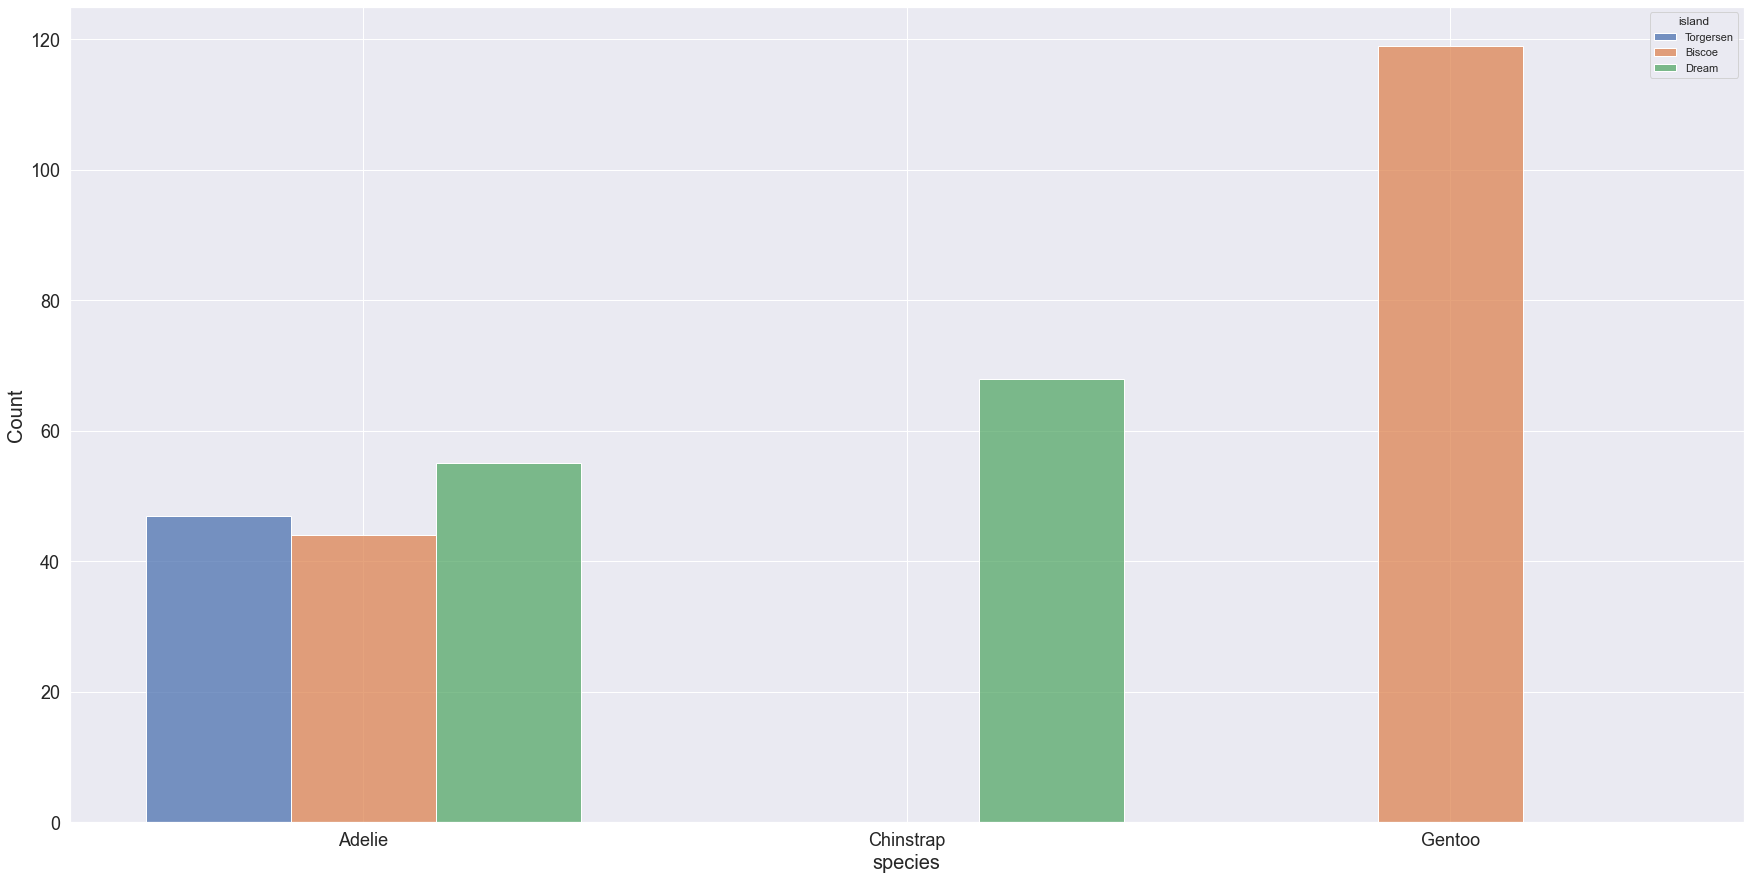

In [62]:
sns.histplot(x='species', data=penguins, 
             hue='island', multiple='dodge',shrink=0.8); 

## Bivariate Histplot

Outra opção totalmente nova no histplot é construir um ***histograma bivariado.***

Isso significa apenas que teremos duas variáveis diferentes

E também vamos usar cores para representar as contagens

Portanto, uma opção realmente interessante com o histplot é que agora podemos plotar duas variáveis diferentes juntas e formar um histplot bivariado

In [63]:
sns.set_style('white')

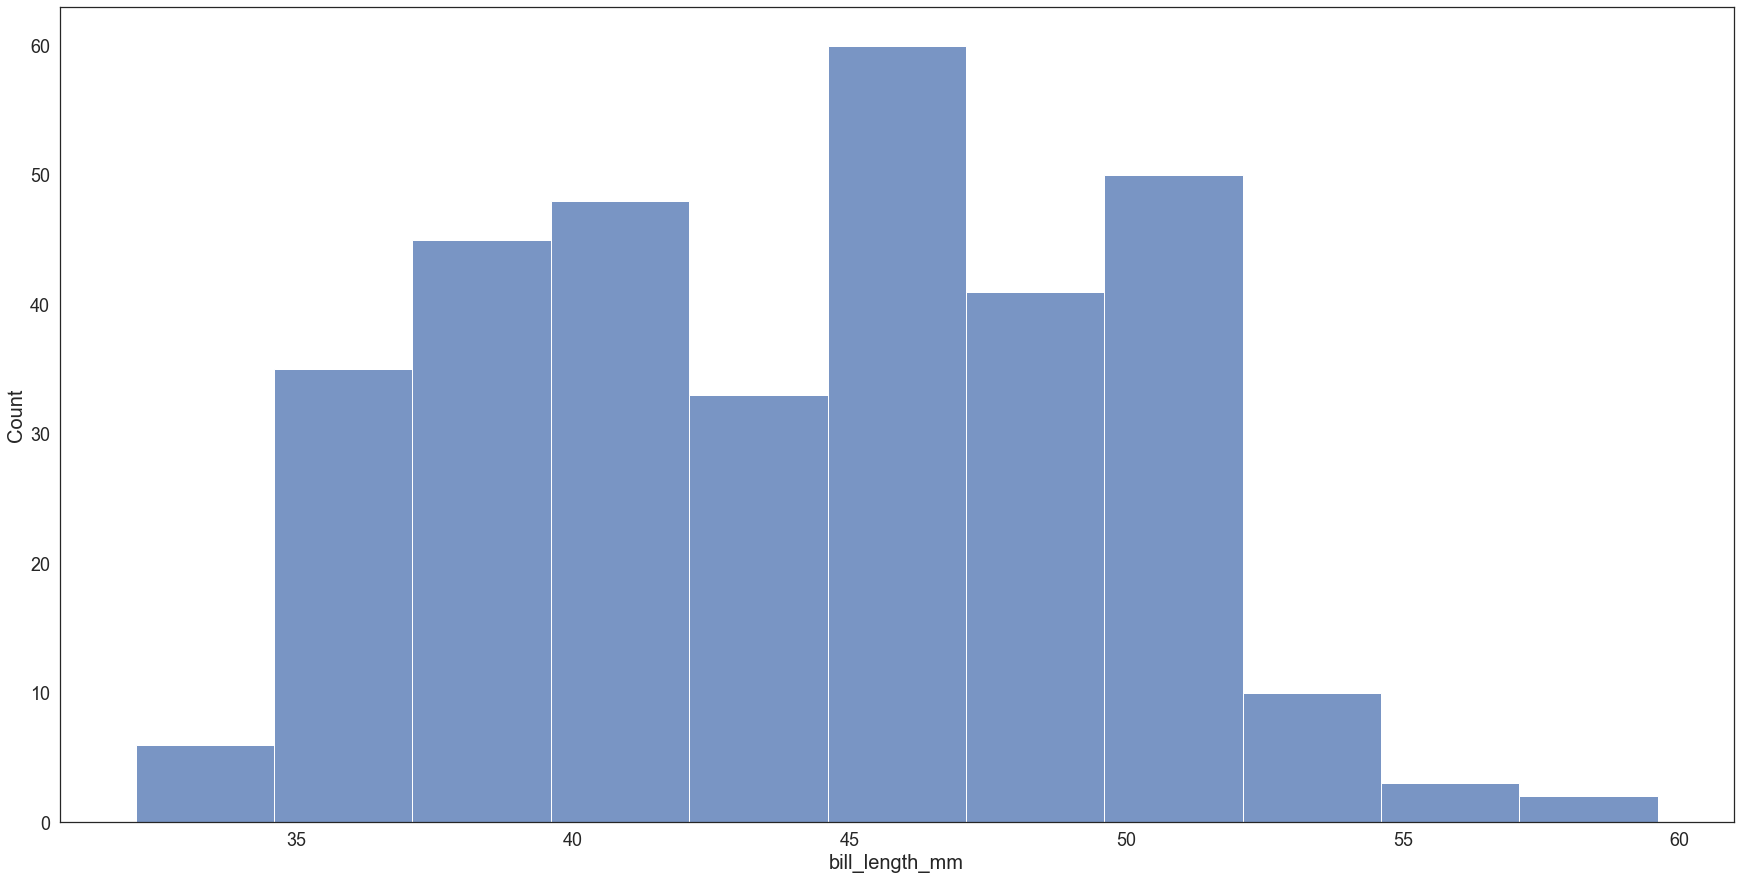

In [64]:
sns.histplot(x='bill_length_mm', data=penguins);

Vamos usar cores para representar as contagens

Podemos plotar duas variáveis diferentes juntas e formar uma ordem de histplot bivariado para fazer isso

***Tudo o que precisamos fazer é passar um valor x e um y ***

Aqui então y será nossa profundidade de bico e este é apenas mais uma coluna do dataset pinguim

E agora temos o comprimento do bico no eixo x e a profundidade do bico no eixo y

E no meio basicamente mudamos para um mapa de calor

Assim, podemos ver onde os valores geralmente caem em termos de x e y

Uma desvantagem agora, no entanto, é que não temos mais uma escala no eixo y

Porque estamos exibindo duas variáveis diferentes

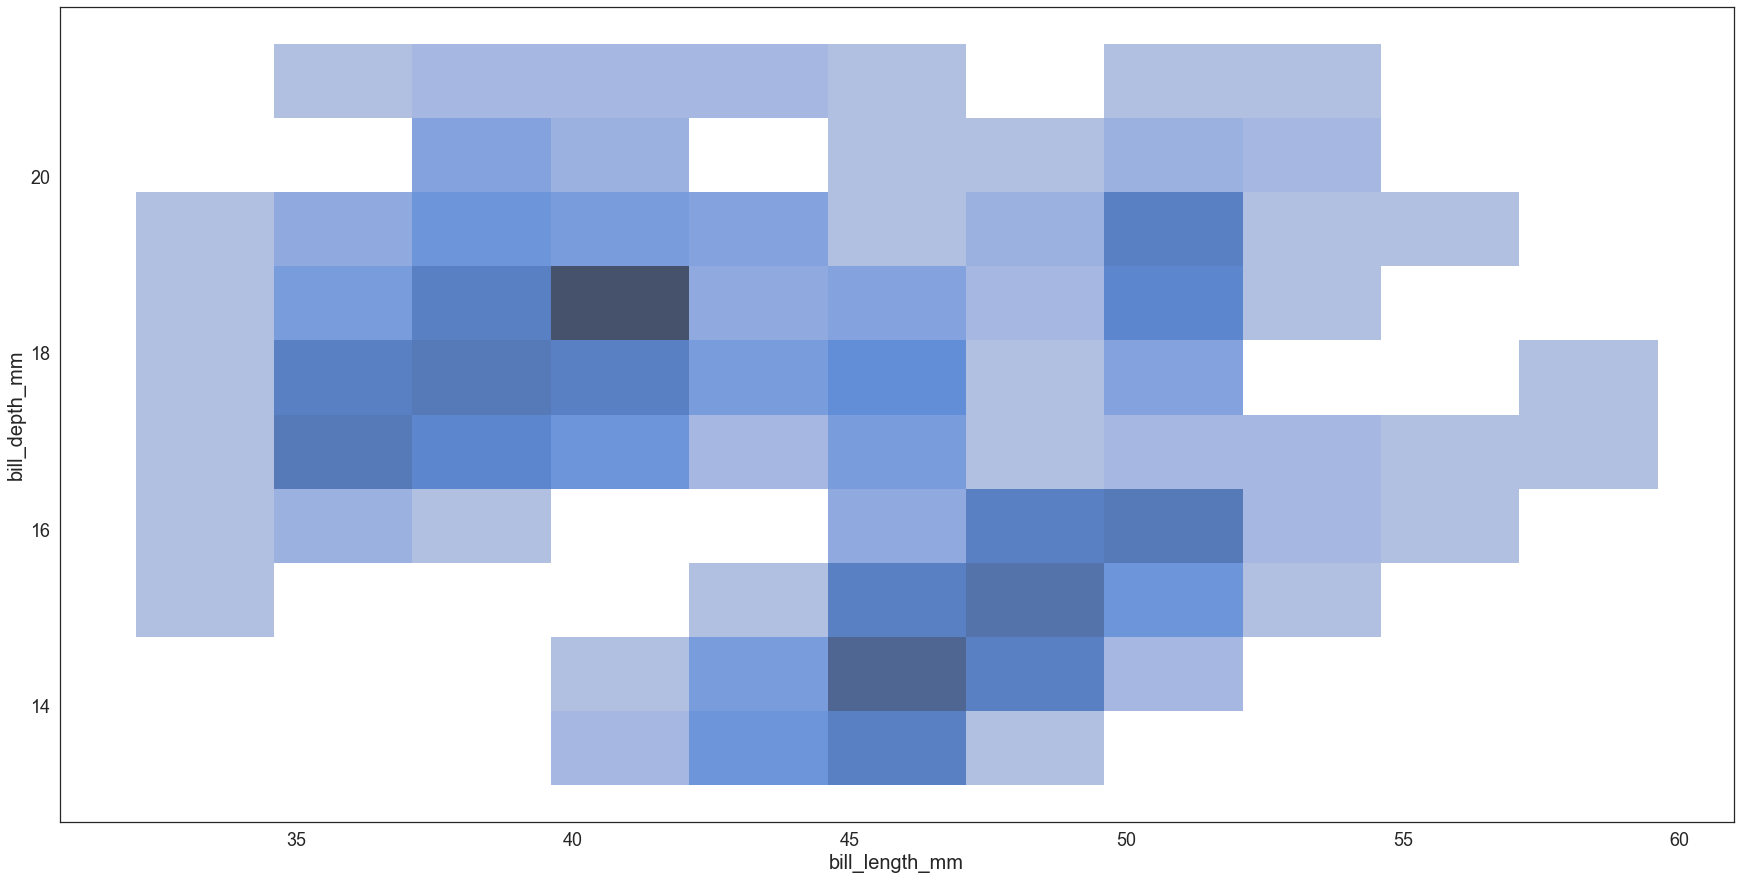

In [65]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', data=penguins);

### cbar

Então, se quisermos saber o que essas cores representam, podemos adicionar uma barra de cores

E para fazer isso, basta definir **cbar=True**

E isso é bom porque agora podemos mapear todas as cores que estamos vendo exatamente dois números quantitativos

Na cor mais escura temos cerca de 17 observações que contamos sobre diferentes pinguins que têm esse comprimento de 40 mm e essa profundidade de 19 mm

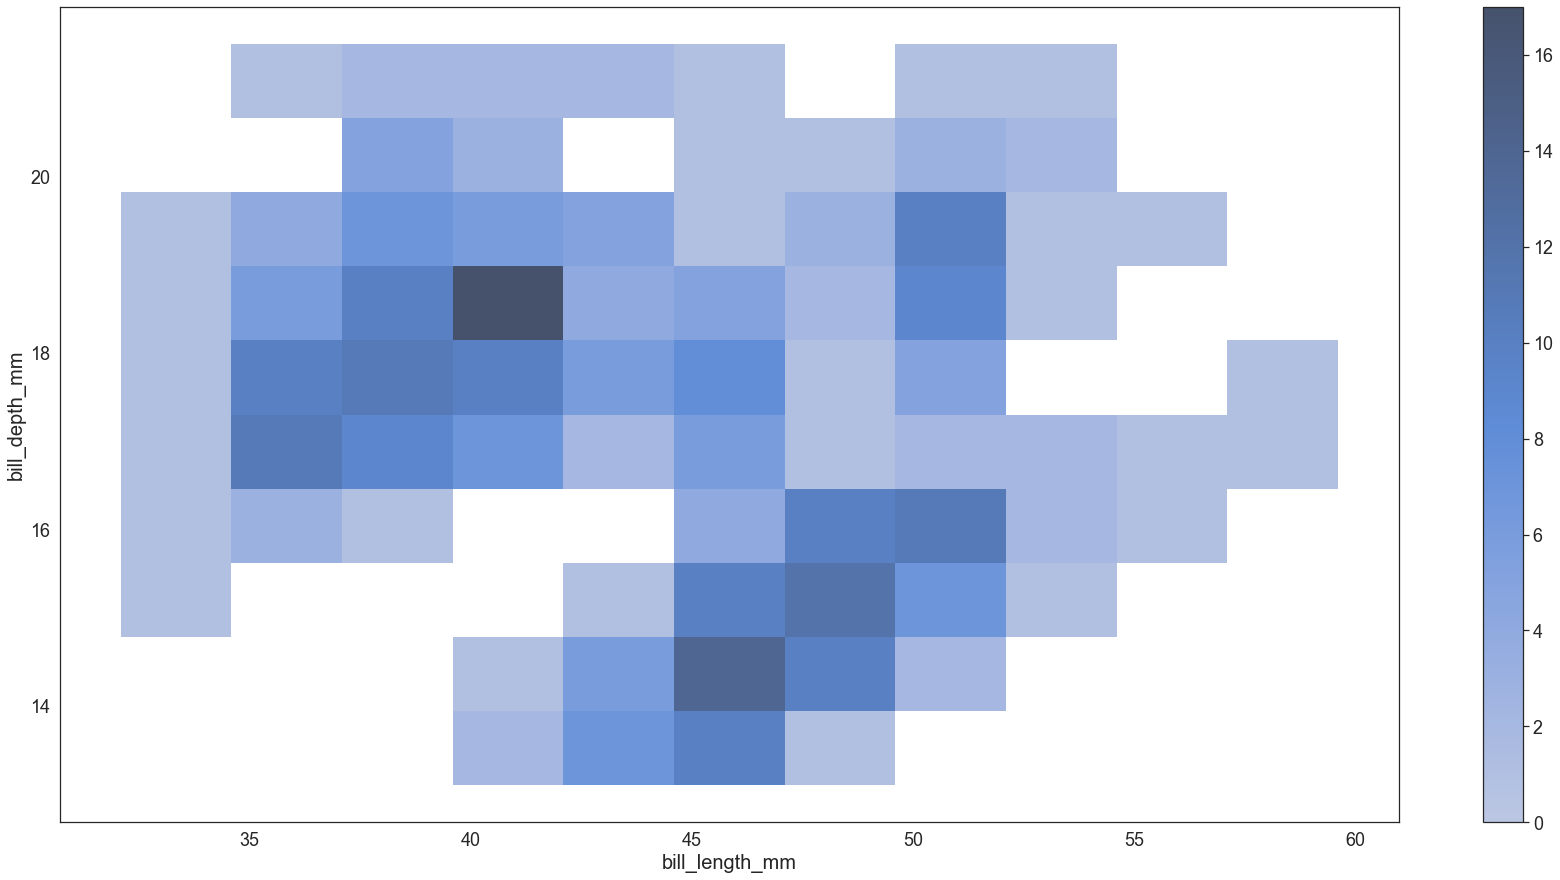

In [66]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', data=penguins,cbar=True);

### Hue

O histplot bivariado também aceita o argumento hue

Então, novamente, se você quiser dividir isso em uma variável categórica

Você pode fazer isso e verá uma cor diferente agora plotada para cada espécie

Isso é muito legal para ver as tendências gerais para as diferentes espécies

*** MAS ATENÇÃO ***

Se essas distribuições estiverem sobrepostas, o que certamente acontece, você não poderá ver essas sobreposições

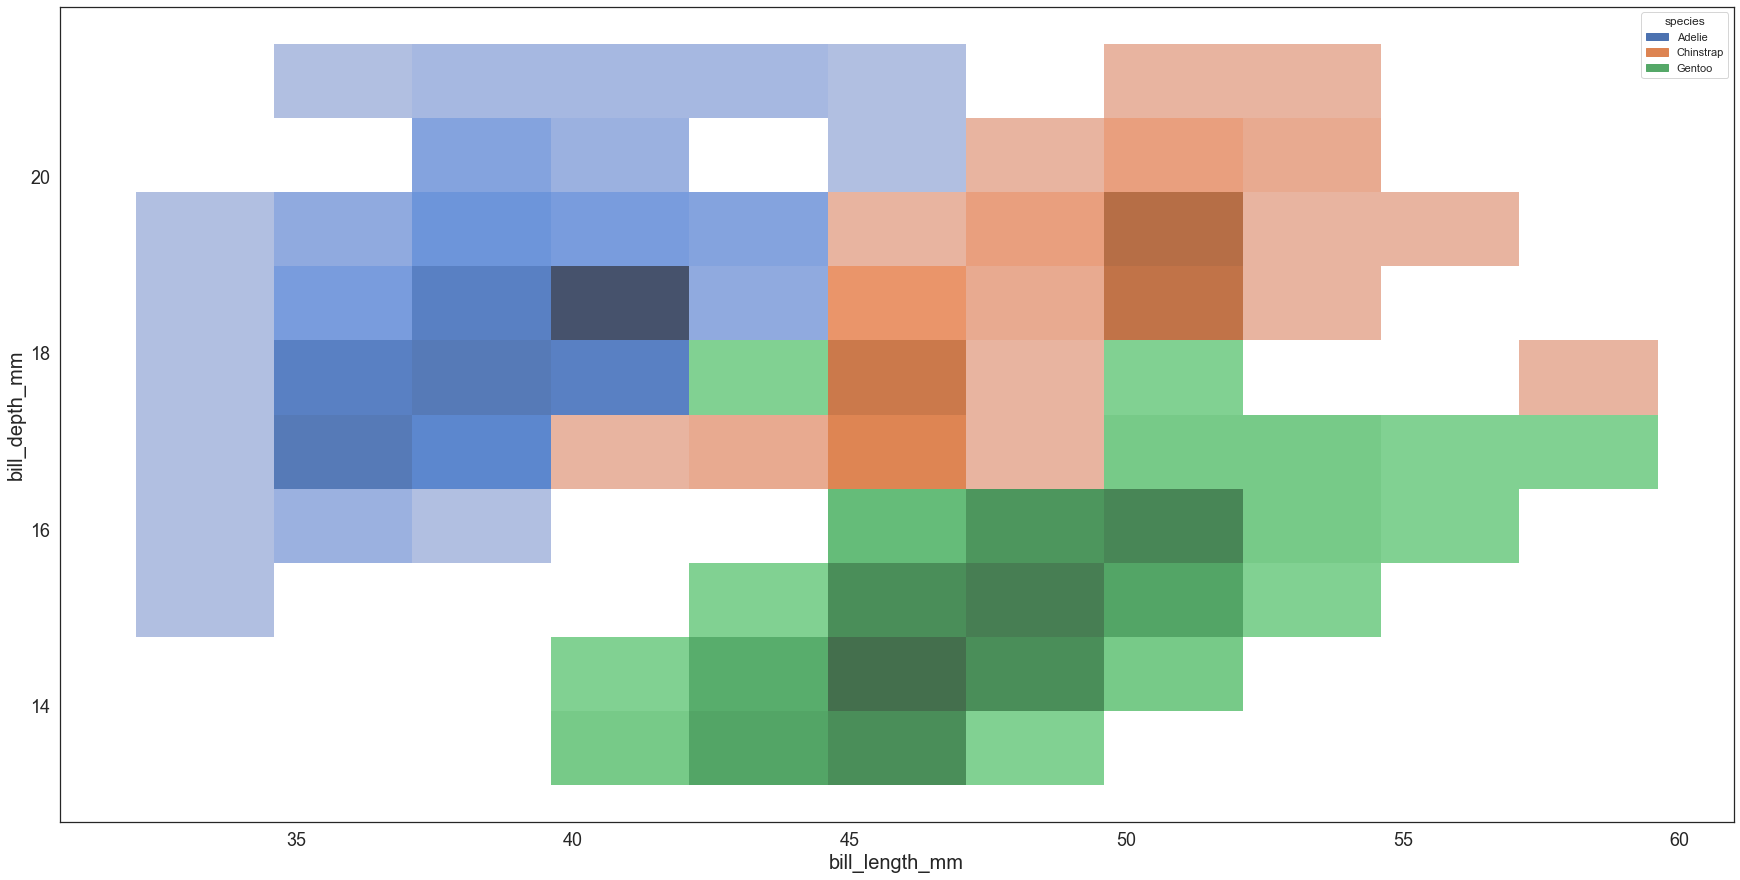

In [67]:
sns.histplot(x='bill_length_mm', y='bill_depth_mm', data=penguins,
             hue='species'
            );

### Discrete color map

Se você ***mudar sua variável y agora para a espécie (y='espécie')*** este será o ***y 

Configurar o matiz também com especie

**y='species', hue='species'**

Você terá essas barras de cores

Podemos comparar as distribuições das diferentes espécies

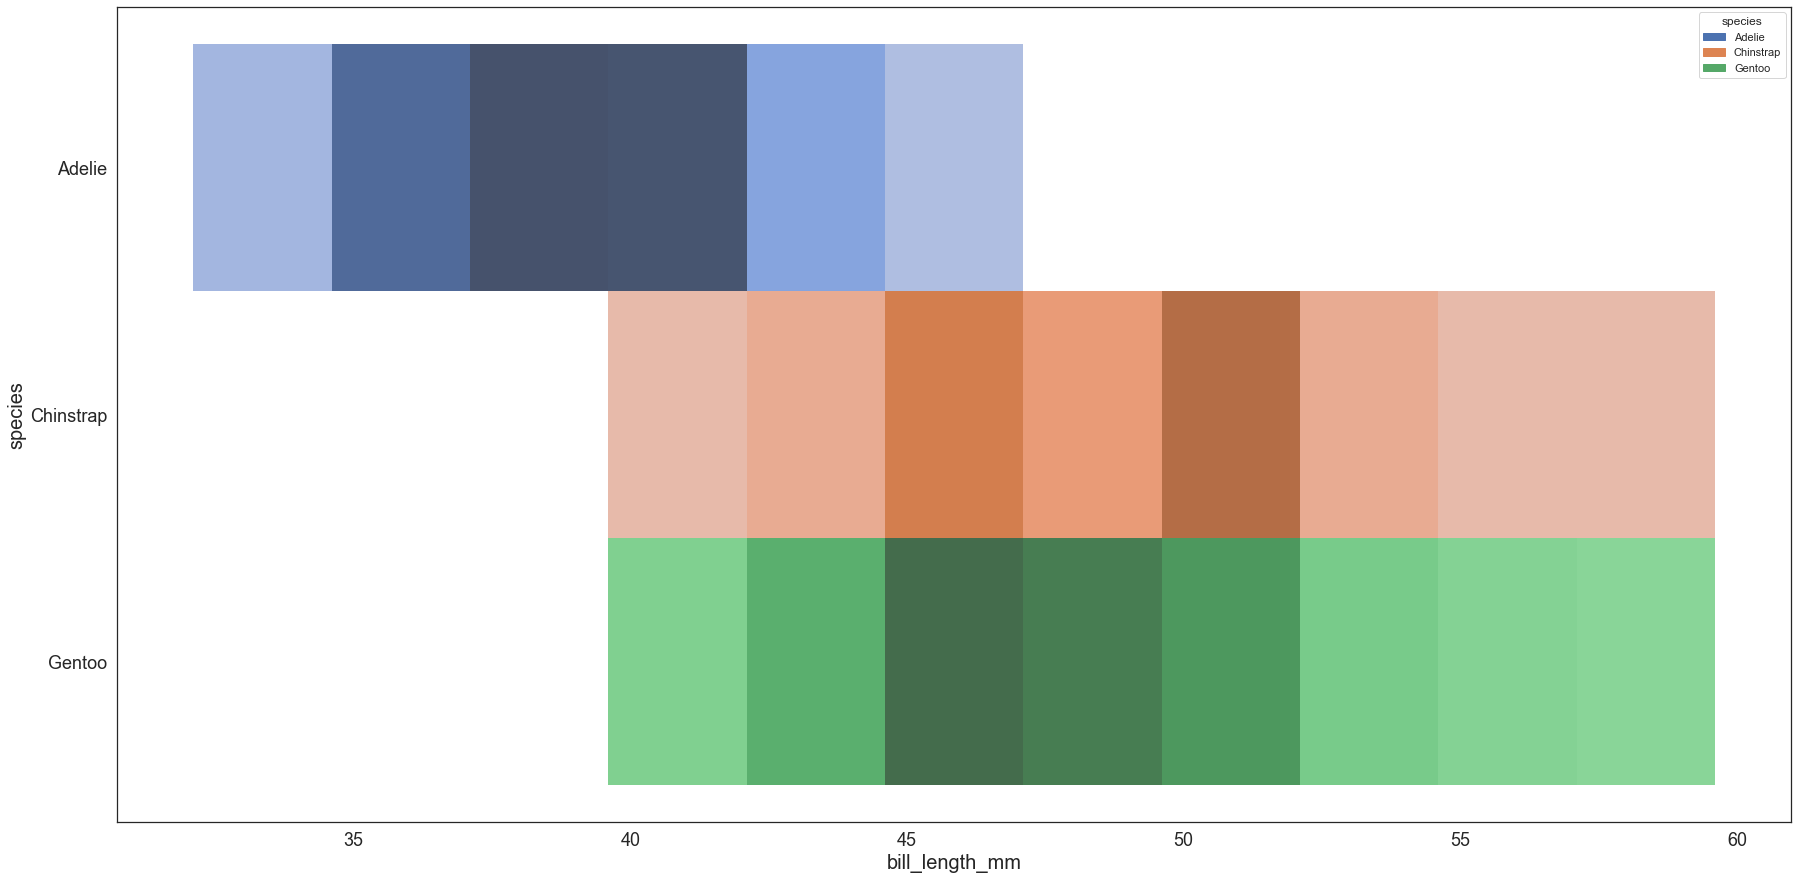

In [68]:
sns.histplot(x='bill_length_mm', y='species', data=penguins, hue='species');

## Styling 

### `shrink`

Como a maioria dos gráficos seaborns, existem muitas maneiras diferentes de estilizar o gráfico.

Então neste histplot eu realmente tenho a espécie e o sexo dos pássaros 

**hue='sex'**

E estou traçando isso usando essa propriedade **dodge**

Resultará essas várias barras diferentes

Onde estou apenas dizendo quantos machos e fêmeas existem para cada espécie

Por padrão todas as barras estão juntas

Não tem nenhum espaço aqui entre as várias espécies

Há um argumento **shrink' tratamento = r/diminuir***

**shrink=0.8**

Isso basicamente apenas encolherá essas barras

E agora vemos uma boa lacuna entre cada um deles

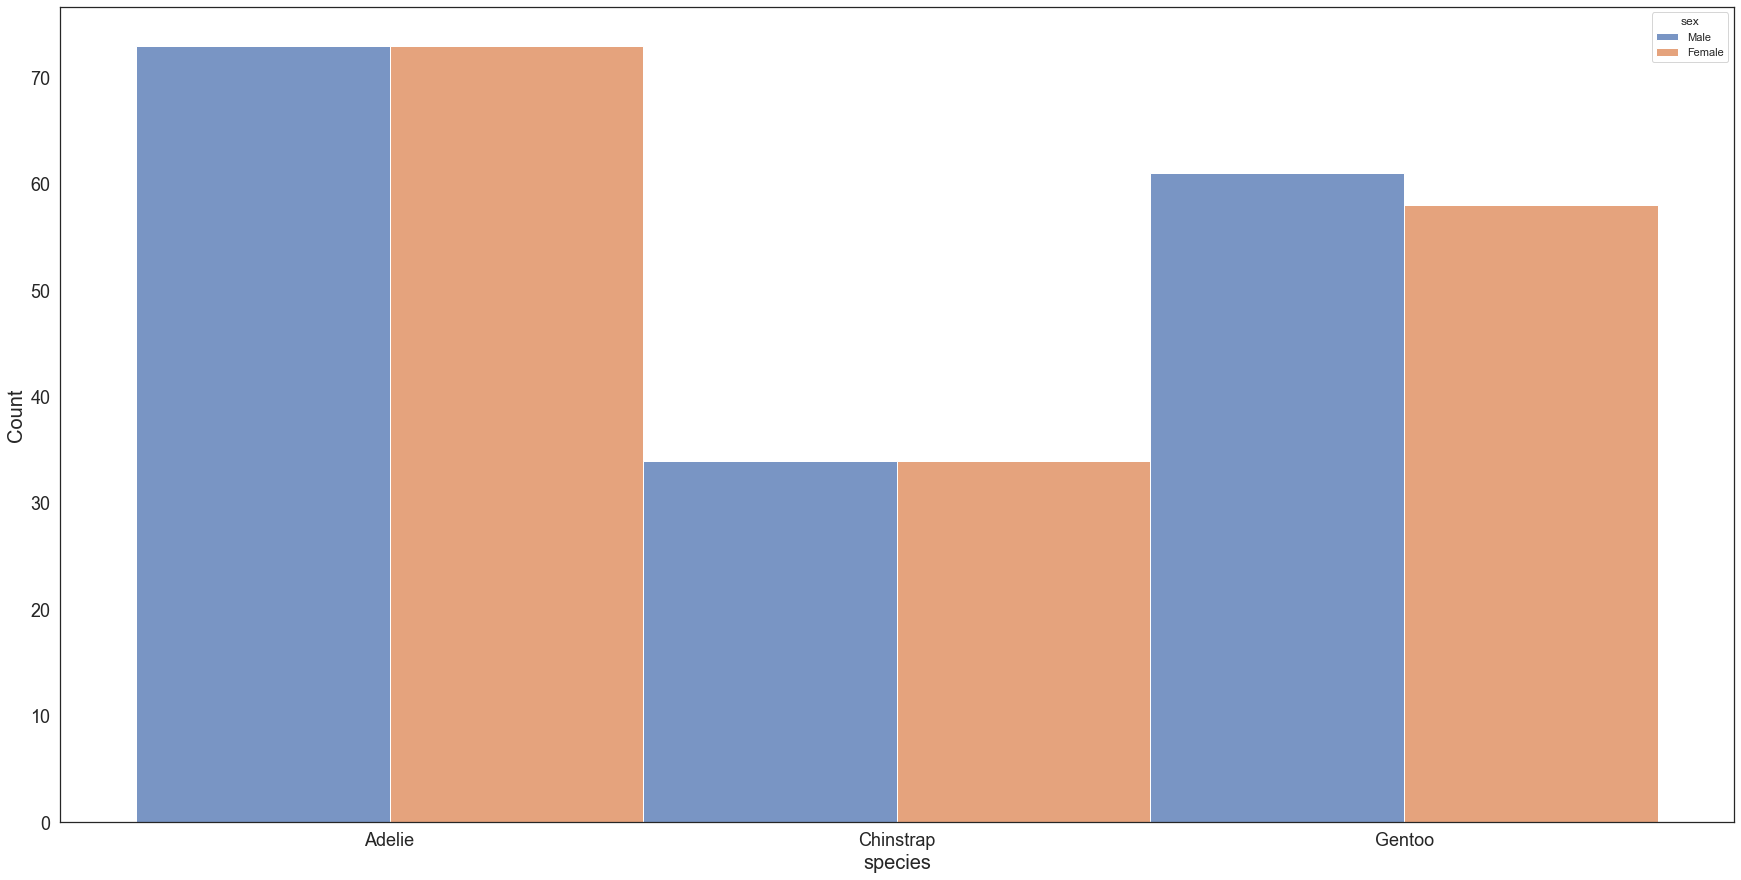

In [69]:
sns.histplot(x='species',  hue='sex', multiple='dodge', data=penguins);

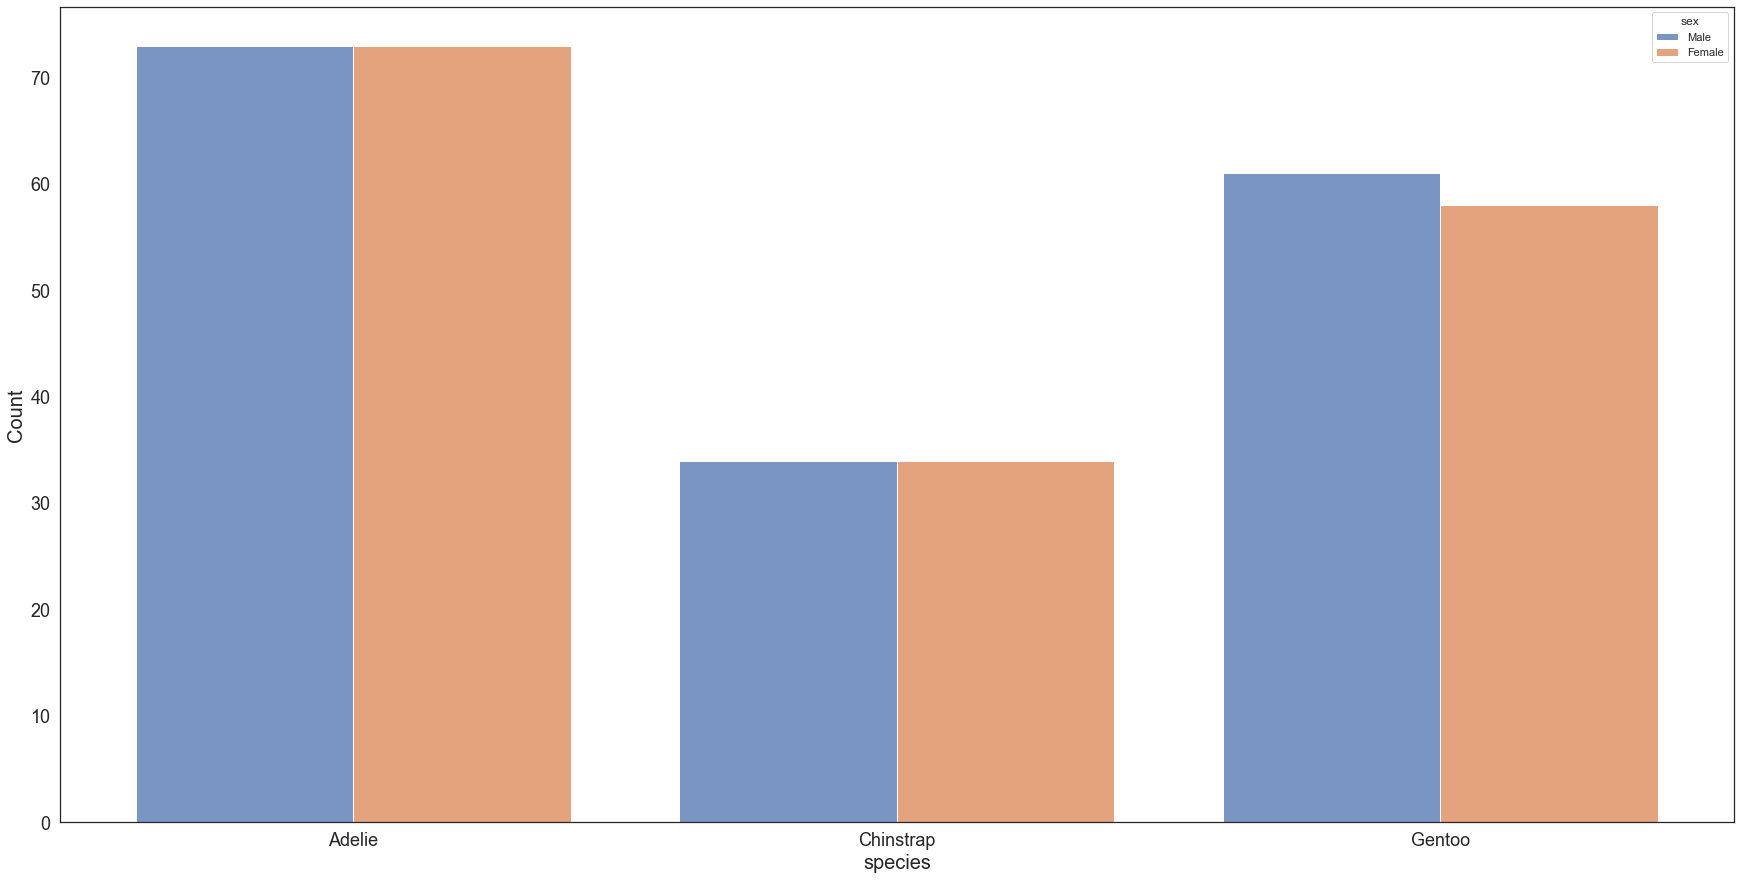

In [70]:
sns.histplot(x='species',  hue='sex', multiple='dodge', data=penguins, shrink=0.8);

### color, palette

Se você quiser mudar tudo para apenas uma cor

Alterar argumento **color**

**color='indigo'**

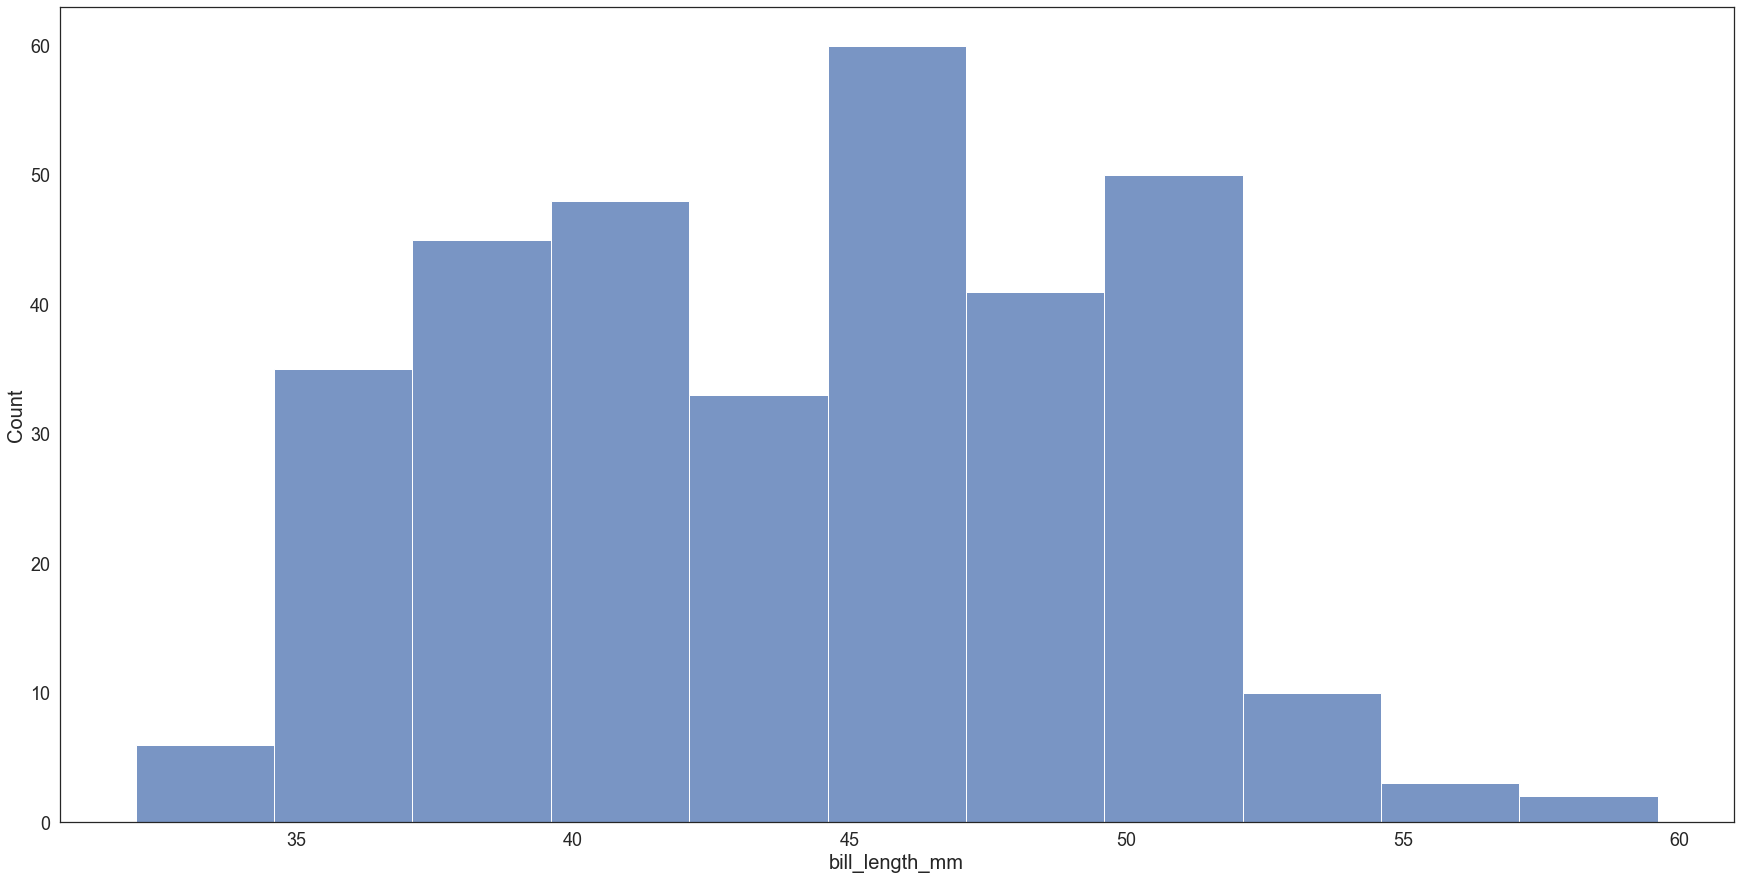

In [71]:
sns.histplot(x='bill_length_mm', data=penguins);

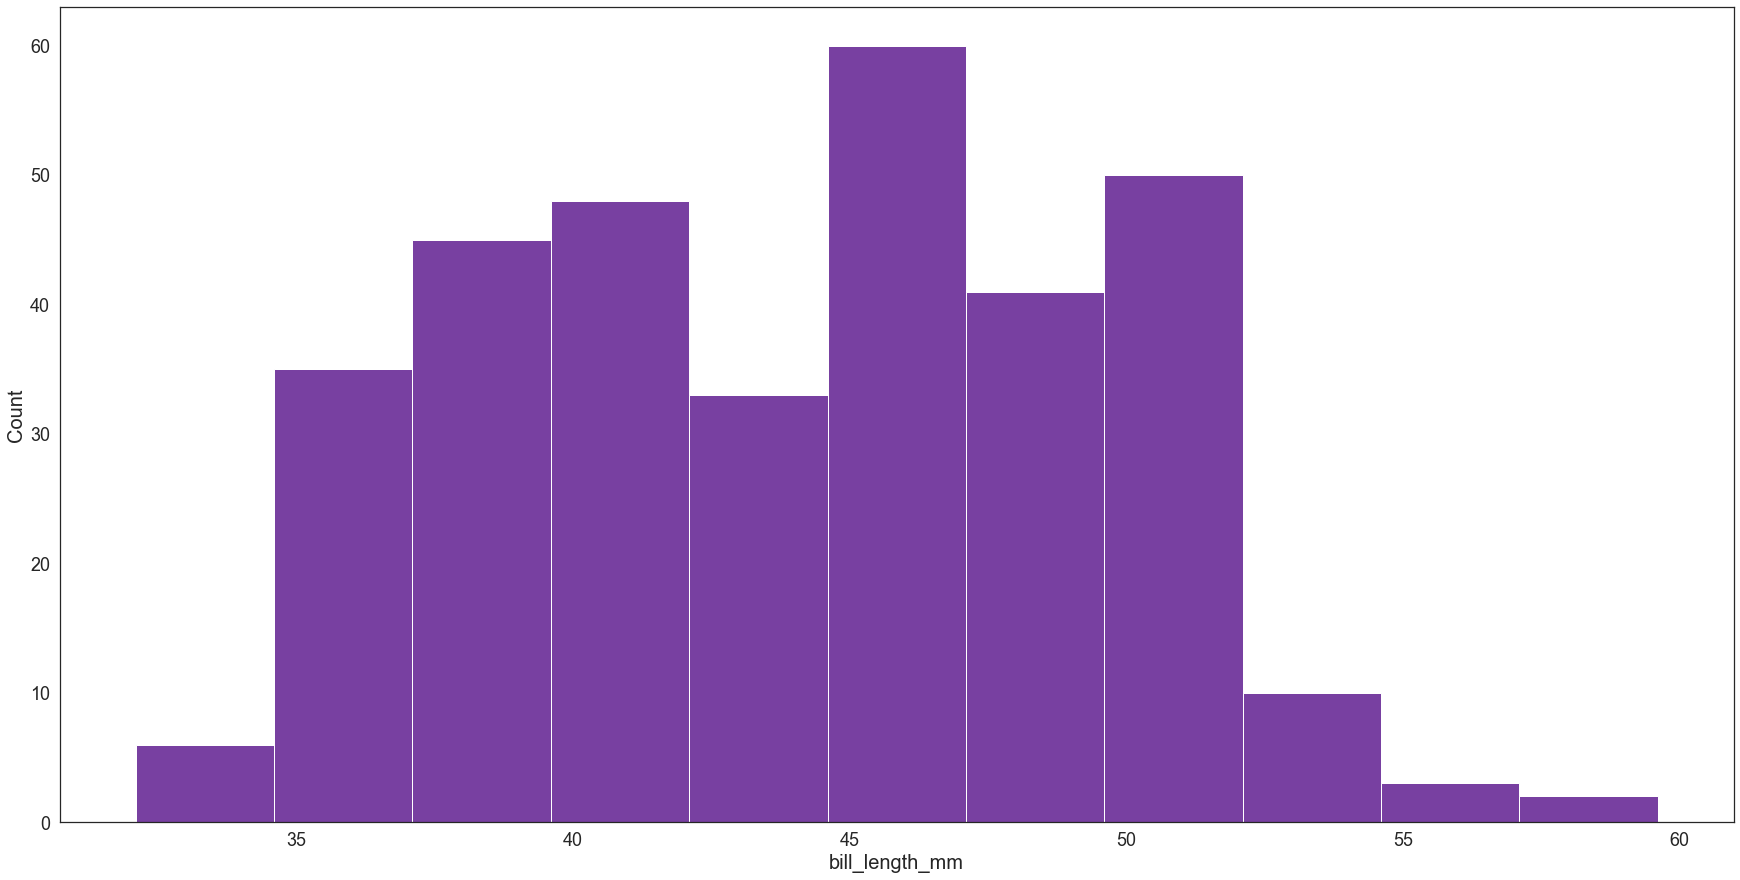

In [72]:
sns.histplot(x='bill_length_mm', data=penguins,color='indigo');

Ou se você potencialmente tiver várias cores diferentes sendo plotadas

Você vai querer usar uma ***opção de paleta***

**palette='bone'**

E há tantas paletas diferentes que você pode escolher, qualquer uma que faça sentido para sua **estética**

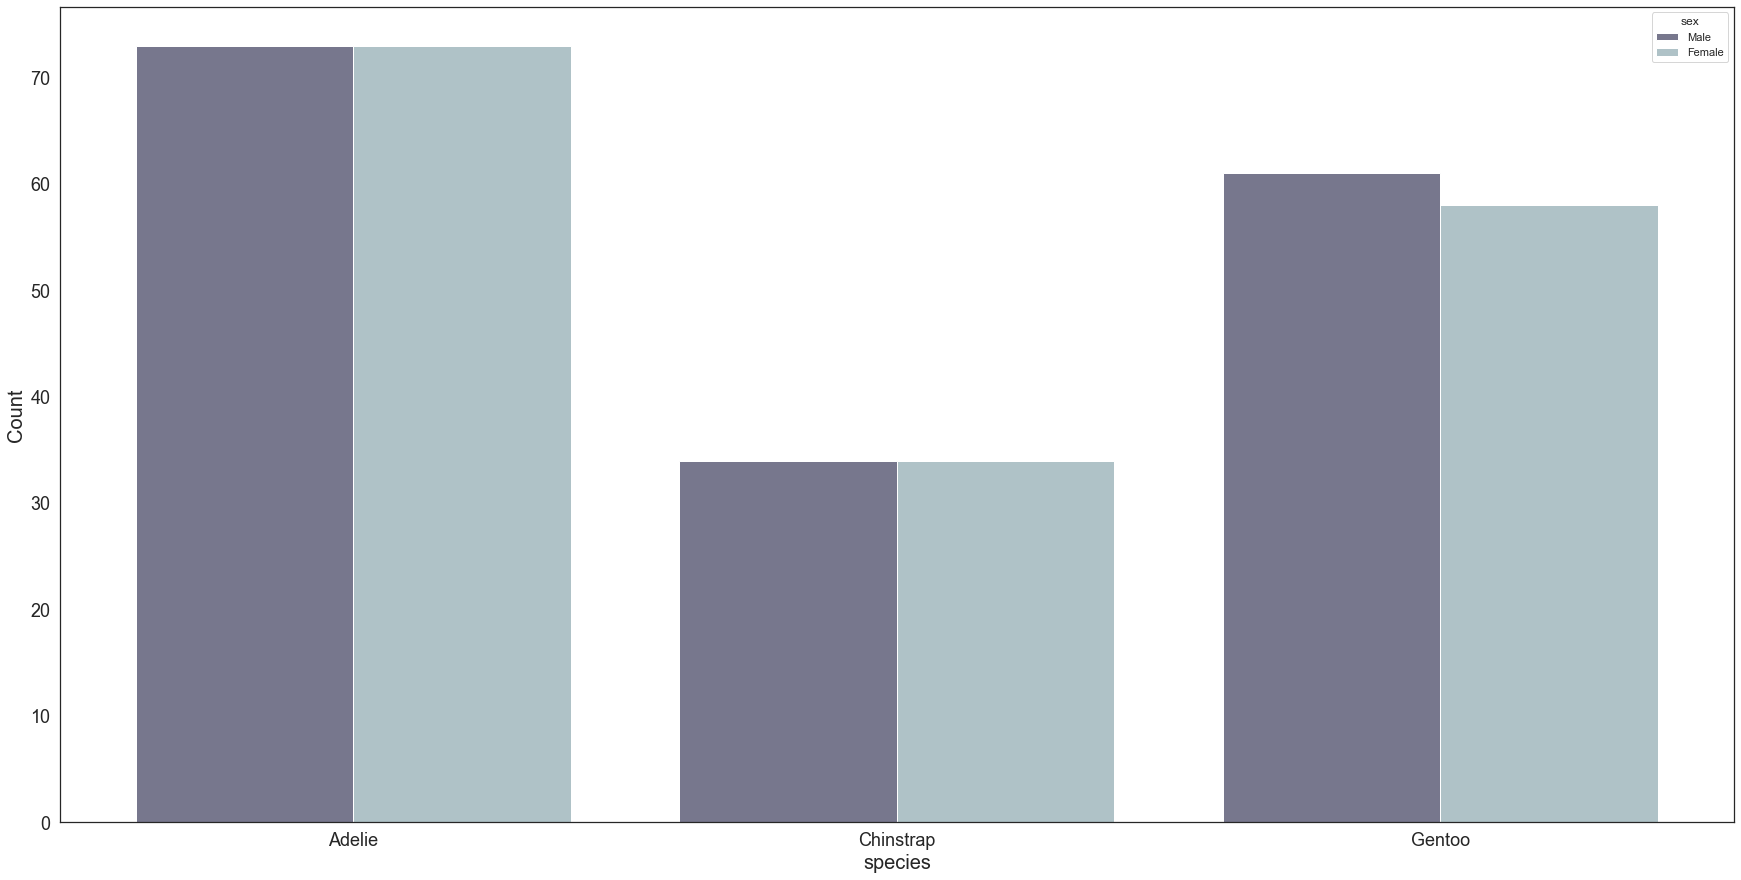

In [73]:
sns.histplot(x='species',  hue='sex', multiple='dodge', data=penguins, shrink=0.8, palette='bone');

### Fill

Opção ***fill***

Todas essas barras estão preenchidas

Mas eu poderia mudar isso para ***false ***

**fill=False**

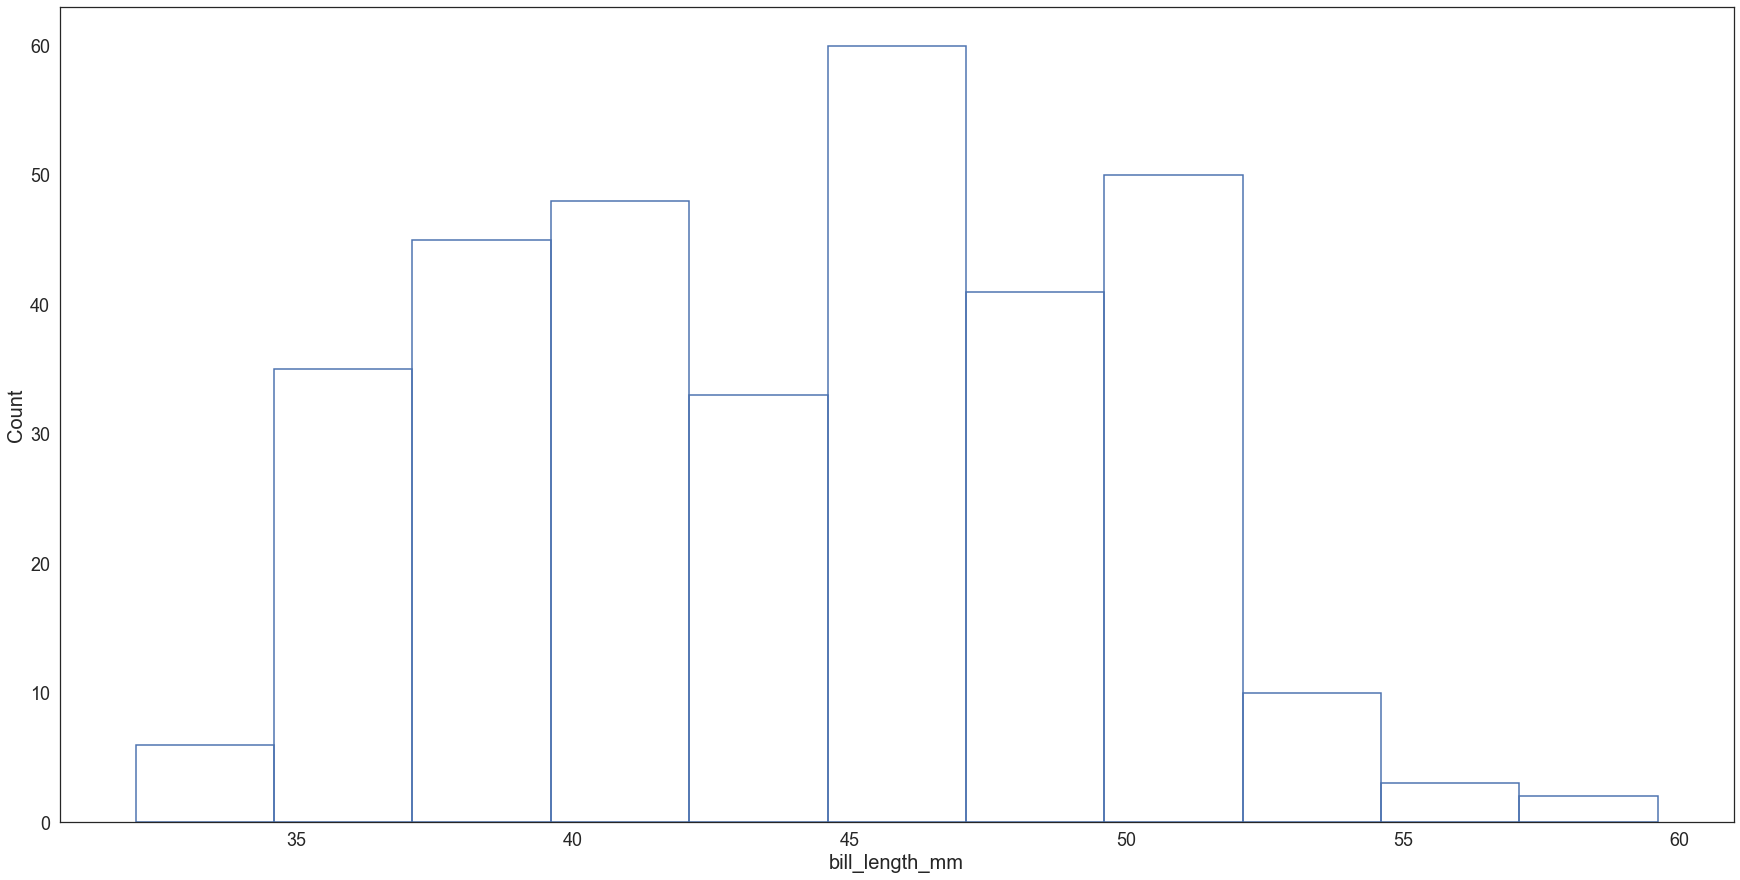

In [74]:
sns.histplot(x='bill_length_mm', data=penguins,fill=False);

### Other `kwargs`

Other keyword arguments can also be used, but allowed keywords depend on the type of histplot you are making:

- Univariate, element="bars": [matplotlib.axes.Axes.bar()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar)

- Univariate, other element, fill=True: [matplotlib.axes.Axes.fill_between()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between)

- Univariate, other element, fill=False: [matplotlib.axes.Axes.plot()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)

- Bivariate: [matplotlib.axes.Axes.pcolormesh()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh) 